In [1]:
# go through all modules and delete unnecessary code
# optimise used code in modules
# check whether figures are exactly reproduced by the saved results
# check whether a simple RF experiment can reproduce paper results
# design readme file and embedd figures
# link to the paper in readme file
# give instructions/code/functions on how to easily use sort and slice in other projects
# create sort and slice featuriser

# remove inconsistencies w.r.t. chi2 and filtered, sorted and sort_and_slice (with experimental results and visualisation code etc)

In [2]:
def construct_sort_and_slice_ecfp_featuriser(mols_train, 
                                             max_radius = 2, 
                                             atom_inv_type = "ecfp", 
                                             use_bond_invs = True, 
                                             use_chirality = False, 
                                             use_counts = False, 
                                             fp_dimension = 1024):
    """
    Creates a function "ecfp_featuriser" that maps RDKit mol objects to vectorial ECFP fingerprints pooled via Sort & Slice (instead of traditional hash-based folding for substructure pooling).
    See also "Sort & Slice: A Simple and Superior Alternative to Hash-Based Folding for Extended-Connectivity Fingerprints" by Dablander, Hanser, Lambiotte and Morris (2024): https://arxiv.org/abs/2403.17954.
    
    INPUTS:
    
    - mols_train (list)     ...    A list of RDKit mol objects [mol_1, mol_2, ...] that are used as the training set to construct the Sort & Slice substructure pooling operator.
    - max_radius (int)      ...    The maximal radius up to which to generate the hashed integer ECFP-substructure identifiers. Common choices are 1, 2 or 3 (corresponding to diameters of 2, 4, or 6).
    - atom_inv_type (str)   ...    The type of initial atomic invariants with which to generate the hashed integer ECFP-substructure identifiers ("ecfp" for standard or "fcfp" for pharmacophoric invariants).
    - use_bond_invs (bool)  ...    Whether or not to take into account bond invariants when generating the hashed integer ECFP-substructure identifiers (default = True).
    - use_chirality (bool)  ...    Whether or not to take into account chirality when generating the hashed integer ECFP-substructure identifiers (default = False).
    - use_counts (bool)     ...    Whether to generate binary vectorial fingerprints (use_counts = False) that indicate the mere presence or absence of a substructure, or integer fingerprints (use_counts = True) that additionally indicate how many times a substructure is found in the input compound.
    - fp_dimension (int)    ...    Length of the vectorial Sort & Slice ECFP. Common choices are 512, 1024, 2048 and 4096. Only the fp_dimension most prevalent ECFP-substructures in mols_train are included in the final vector representation.
    
    OUTPUT:
    
    - ecfp_featuriser (function)    ...    A function that maps RDKit mol objects to vectorial ECFP fingerprints pooled via a Sort & Slice operator trained on mols_train.
    
    EXAMPLE:
    
    First construct a molecular featurisation function with desired settings via
    
    ecfp_featuriser = construct_sort_and_slice_ecfp_featuriser(mols_train = [mol_1, mol_2, ...], 
                                                               max_radius = 2, 
                                                               atom_inv_type = "ecfp", 
                                                               use_bond_invs = True, 
                                                               use_chirality = False, 
                                                               use_counts = False, 
                                                               fp_dimension = 1024)
                                                               
    Note that the ECFP settings (max_radius, atom_inv_type, use_bond_invs, use_chirality, use_counts, fp_dimension) and information from mols_train are all by construction implicitly transferred to "ecfp_featuriser".
    
    Now let mol be an RDKit mol object. 
    
    Then ecfp_featuriser(mol) = np.array([1, 0, 0, ..., 1, 1, 0]) is a 1-dimensional numpy array of length "fp_dimension" representing the vectorial Sort & Slice ECFP fingerprint for mol.
    
    The fingerprint ecfp_featuriser(mol) is generated by (i) first generating the (multi)set of hashed integer ECFP-substructure identifiers from mol and then (ii) vectorising it via the Sort & Slice operator trained on mols_train (rather than via classical hash-based folding).
    """
    
    
    
    
    ecfp_featuriser = 0
    
    return ecfp_featuriser

# Import Packages

In [1]:
# import general packages and set general options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
import warnings
warnings.filterwarnings("ignore")

# import custom code written for this project
from modules import *

# import and check funtionality of pytorch
import torch
print("Pytorch version = ", torch.__version__)
print("CUDA version = ", torch.version.cuda)
print("CUDA available = ", torch.cuda.is_available())
print("Random Pytorch test tensor = ", torch.rand(1))

Pytorch version =  1.10.2+cu113
CUDA version =  11.3
CUDA available =  False
Random Pytorch test tensor =  tensor([0.0261])


# Load and Prepare Data

In [2]:
# initialise dictionary used to store experimental settings, after dictionary is initialised, choose one of the five data sets below to proceed

settings_dict = {}

In [3]:
# LIT-PCBA Estrogen Receptor Alpha Antagonism

settings_dict["dataset_name"] = "lit_pcba_esr_ant"
settings_dict["task_type"] = "classification"
settings_dict["prop_name"] = "Activity"

In [10]:
# MoleculeNet Lipophilicity

settings_dict["dataset_name"] = "moleculenet_lipophilicity"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "exp"

In [7]:
# AqSolDB solubility

settings_dict["dataset_name"] = "aqsoldb_solubility"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "Solubility"

In [3]:
# PostEra SARS-CoV-2 Mpro inhibition

settings_dict["dataset_name"] = "postera_sars_cov_2_mpro"
settings_dict["task_type"] = "regression"
settings_dict["prop_name"] = "f_avg_IC50"

In [33]:
# Ames mutagenicity

settings_dict["dataset_name"] = "ames_mutagenicity"
settings_dict["task_type"] = "classification"
settings_dict["prop_name"] = "Activity"

In [4]:
# load clean data

dataframe = pd.read_csv("data/" + settings_dict["dataset_name"] + "/" + "clean_data.csv", sep = ",")
display(dataframe)

,SMILES,Activity
0,CN(C(=O)CCCOc1ccc2[nH]c(=O)ccc2c1)C1CCCCC1,1
1,C[C@@H]1O[C@@H](O[C@@H]2C=C3CC[C@@H]4[C@H](CC[...,1
2,COc1ccc2cc3-c4cc5c(cc4CC[n+]3cc2c1OC)OCO5,1
3,N=C(N)NC(=N)NCCc1ccccc1,1
4,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,1
...,...,...
3916,CN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,0
3917,Cc1cc(N)c2cc(NC(=O)Nc3ccc4nc(C)cc(N)c4c3)ccc2n1,0
3918,NC(Cc1ccccc1)C(=O)O,0
3919,C=C[C@H]1CN2CCC1C[C@@H]2[C@@H](O)c1ccnc2ccccc12,0


Mean Value (Target) =  0.022443254271869422
Standard Deviation (Target) =  0.14812006822020315
Maximum Value (Target) =  1.0
Minimum Value (Target) =  0.0 

Shape of y =  (3921,)

 y =  [1. 1. 1. ... 0. 0. 0.]


(array([3833.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

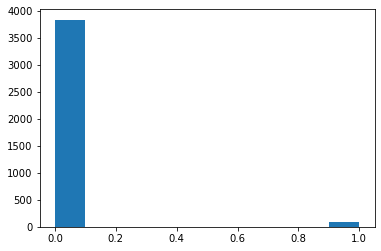

In [5]:
# construct target variable y (for the SARS-CoV-2 main protease data set, we convert Ki to pKi by taking negative decadic logarithm)

if settings_dict["dataset_name"] == "postera_sars_cov_2_mpro":
    y = -np.log10(dataframe.loc[:, settings_dict["prop_name"]].values.astype(float))
else:
    y = dataframe.loc[:, settings_dict["prop_name"]].values.astype(float)

print("Mean Value (Target) = ", np.mean(y))
print("Standard Deviation (Target) = ", np.std(y))
print("Maximum Value (Target) = ", np.amax(y))
print("Minimum Value (Target) = ", np.amin(y), "\n")

print("Shape of y = ", y.shape)
print("\n y = ", y)

plt.hist(y)

Shape of x_smiles =  (3921,)
CN(C(=O)CCCOc1ccc2[nH]c(=O)ccc2c1)C1CCCCC1


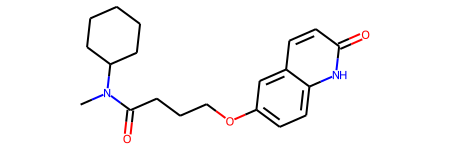

In [6]:
# extract SMILES strings

x_smiles = np.reshape(dataframe["SMILES"].values, (len(dataframe), 1))[:,0]

print("Shape of x_smiles = ", x_smiles.shape)
print(x_smiles[0])
display(Chem.MolFromSmiles(x_smiles[0]))

In [7]:
# create dictionary that maps smiles strings to their target values

x_smiles_to_y_dict = dict(list(zip(x_smiles, y)))

# Prepare Data Split

In [10]:
# choose settings for dictionary that contains indices for data splits

settings_dict["split_type"] = "rand" # choose "rand" for random split and "scaff" for scaffold split
settings_dict["split_type_rand_stratified"] = True # given a random split and a classification problem, choose whether to stratify the split
settings_dict["k_splits"] = 2 # choose number of cross validation folds k_splits
settings_dict["m_reps"] = 3 # choose number of random seeds m_reps with which the cross validation scheme is repeated
settings_dict["random_state_cv"] = 42 # choose random state

In [11]:
# construct dictionary that contains indices for data splits

if settings_dict["split_type"] == "rand" and settings_dict["split_type_rand_stratified"] == False:
    
    data_split_dict = create_data_split_dict_random(x_smiles = x_smiles,
                                                    k_splits = settings_dict["k_splits"],
                                                    m_reps = settings_dict["m_reps"],
                                                    random_state_cv = settings_dict["random_state_cv"])

elif settings_dict["split_type"] == "rand" and settings_dict["split_type_rand_stratified"] == True:
    
    data_split_dict = create_data_split_dict_random_strat(x_smiles = x_smiles,
                                                          y = y,
                                                          k_splits = settings_dict["k_splits"],
                                                          m_reps = settings_dict["m_reps"],
                                                          random_state_cv = settings_dict["random_state_cv"])
    
elif settings_dict["split_type"] == "scaff":
    
    data_split_dict = create_data_split_dict_scaffold(x_smiles = x_smiles,
                                                      k_splits = settings_dict["k_splits"],
                                                      m_reps = settings_dict["m_reps"],
                                                      scaffold_func = "Bemis_Murcko_generic",
                                                      random_state_cv = settings_dict["random_state_cv"])

# Evaluate Models

In [12]:
# choose ECFP hyperparameters

settings_dict["ecfp_settings"] = {"mol_to_invs_function": ecfp_invariants, # ecfp_invariants or fcfp_invariants
                                  "radius": 2, # 0 or 1 or 2 or 3 ...
                                  "pool_method": "sort_and_slice", # "hashed" or "sort_and_slice" or "filtered" or "mim"
                                  "dimension": 1024, # 256 or 512 or 1024 or 2048 or 4096 ...
                                  "use_bond_invs": True, # True or False
                                  "use_chirality": True, # True or False
                                  "use_counts": False} # True or False

In [13]:
# chose ml model: random forest or multilayer perceptron

settings_dict["ml_model"] = "rf" # "rf" or "mlp"

In [14]:
# choose rf hyperparameters

settings_dict["rf_settings"] = {"n_estimators" : 100,
                                "max_depth" : None,
                                "min_samples_leaf" : 1,
                                "min_samples_split" : 2,
                                "bootstrap" : True,
                                "max_features": "sqrt",
                                "random_state" : 42}

if settings_dict["task_type"] == "regression":

    settings_dict["rf_settings"]["criterion"] = "squared_error"

elif settings_dict["task_type"] == "classification":

    settings_dict["rf_settings"]["criterion"] = "gini"

In [15]:
# choose mlp hyperparameters

settings_dict["mlp_settings"] = {"architecture" : list(arch(settings_dict["ecfp_settings"]["dimension"], 1, 512, 5)),
                                "hidden_activation" : nn.ReLU(),
                                "use_bias" : True,
                                "hidden_dropout_rate" : 0.25,
                                "hidden_batchnorm" : True,
                                "batch_size" : 64,
                                "dataloader_shuffle" : True,
                                "dataloader_drop_last" : True,
                                "learning_rate" : 1e-3,
                                "lr_lambda" : lambda epoch: max(0.98**epoch, 1e-2),
                                "lr_last_epoch": 0,
                                "weight_decay" : 0.1,
                                "num_epochs" : 0,
                                "optimiser" : torch.optim.AdamW,
                                "print_results_per_epochs" : None}

if settings_dict["task_type"] == "regression":

    settings_dict["mlp_settings"]["output_activation"] = nn.Identity()
    settings_dict["mlp_settings"]["loss_function"] = nn.MSELoss()
    settings_dict["mlp_settings"]["performance_metrics"] = "regression"

elif settings_dict["task_type"] == "classification":

    settings_dict["mlp_settings"]["output_activation"] = nn.Sigmoid()
    settings_dict["mlp_settings"]["loss_function"] = nn.BCELoss()
    settings_dict["mlp_settings"]["performance_metrics"] = "classification"

In [30]:
%%time
# run model and save results

# dictionary to save results over the k_splits-fold cross validation with m_reps random seeds
scores_dict = {}

# ind_train and ind_test contain the indices for the data split corresponding to the k-th fold with the m-th random seed
for ((m, k), (ind_train, ind_test)) in data_split_dict.items():
    
    # create ecfp featuriser
    featuriser = create_ecfp_featuriser(ecfp_settings = settings_dict["ecfp_settings"], 
                                        x_smiles_train = x_smiles[ind_train], 
                                        y_train = y[ind_train], 
                                        discretise_y = True if settings_dict["task_type"] == "regression" else False,
                                        base = 2, 
                                        random_state = 42)
    
    # create ecfp-based feature matrices
    X_train = featuriser(x_smiles[ind_train])
    X_test = featuriser(x_smiles[ind_test])

    # create ml model + train ml model + make predictions on test set
    if settings_dict["ml_model"] == "rf":
        
        rf_model = create_rf_model(settings_dict["rf_settings"], settings_dict["task_type"])
        rf_model.fit(X_train, y[ind_train])
        y_test_pred = make_rf_prediction(rf_model, X_test, settings_dict["task_type"])
        
    if settings_dict["ml_model"] == "mlp":
        
        mlp_model = create_mlp_model(settings_dict["mlp_settings"])
        (loss_curve_train, loss_curve_test) = train_mlp_model(mlp_model, settings_dict["mlp_settings"], X_train, y[ind_train], X_test, y[ind_test])
        plt.plot(loss_curve_train)
        plt.plot(loss_curve_test)
        y_test_pred = make_mlp_prediction(mlp_model, X_test)
        
    # record scores
    print(m, k)
    if settings_dict["task_type"] == "regression":
        scores_dict[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = True)
    elif settings_dict["task_type"] == "classification":
        scores_dict[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = True)
        
# summarise, display and save scores for this experiment
summarise_display_and_save_results_and_settings(scores_dict, settings_dict, display_results = True)

Number of unique substructures in molecular data set =  11562
0 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.668389,0.53005,0.866881,3.4247,0.751484,0.697437,0.47836,2100.0


Number of unique substructures in molecular data set =  11685
0 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.66894,0.51995,0.870142,3.386,0.757148,0.704298,0.478951,2100.0


Number of unique substructures in molecular data set =  11811
1 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.657573,0.5345,0.846401,3.5196,0.716394,0.704937,0.485214,2100.0


Number of unique substructures in molecular data set =  11563
1 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.670416,0.52815,0.870084,3.283,0.757046,0.71747,0.495755,2100.0


Number of unique substructures in molecular data set =  11834
2 0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.672057,0.5334,0.871791,3.63522,0.76002,0.699989,0.477509,2100.0


Number of unique substructures in molecular data set =  11537
2 1


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
Scores:,0.677571,0.53965,0.874103,3.2755,0.764056,0.692624,0.469083,2100.0


,MAE,MedAE,RMSE,MaxAE,MSE,PearsonCorr,R2Coeff,Test Cases
"(0, 0)",0.668389,0.530050,0.866881,3.42470,0.751484,0.697437,0.478360,2100.0
"(0, 1)",0.668940,0.519950,0.870142,3.38600,0.757148,0.704298,0.478951,2100.0
"(1, 0)",0.657573,0.534500,0.846401,3.51960,0.716394,0.704937,0.485214,2100.0
"(1, 1)",0.670416,0.528150,0.870084,3.28300,0.757046,0.717470,0.495755,2100.0
"(2, 0)",0.672057,0.533400,0.871791,3.63522,0.760020,0.699989,0.477509,2100.0
"(2, 1)",0.677571,0.539650,0.874103,3.27550,0.764056,0.692624,0.469083,2100.0
mean,0.669158,0.530950,0.866567,3.42067,0.751025,0.702792,0.480812,2100.0
std,0.005995,0.006109,0.009274,0.12719,0.015937,0.007770,0.008171,0.0


CPU times: user 32.1 s, sys: 99.2 ms, total: 32.2 s
Wall time: 32.2 s


In [16]:
%%time
# run full battery of experiments for one data set and data splitting type with both rfs and mlps

# first clear folder from previous experimental results
delete_all_files_in_folder("results/" + settings_dict["dataset_name"] + "/" + settings_dict["split_type"] + "/")

for pool_method in ["hashed", "filtered", "mim", "sort_and_slice"]:
    for dimension in [512, 1024, 2048, 4096]:
        for inv_func in [ecfp_invariants, fcfp_invariants]:
            for radius in [1, 2, 3]:

                print("pool_method = ", pool_method)
                print("dimension = ", dimension)
                print("inv_func = ", inv_func)
                print("radius = ", radius, "\n")

                # choose ECFP hyperparameters
                settings_dict["ecfp_settings"] = {"mol_to_invs_function": inv_func,
                                                  "radius": radius,
                                                  "pool_method": pool_method,
                                                  "dimension": dimension,
                                                  "use_bond_invs": True,
                                                  "use_chirality": True,
                                                  "use_counts": False}

                # run rf- and mlp models and save results
                scores_dict_rf = {}
                scores_dict_mlp = {}

                # ind_train and ind_test contain the indices for the data split corresponding to the k-th fold with the m-th random seed
                for ((m, k), (ind_train, ind_test)) in data_split_dict.items():
                    
                    # create ecfp featuriser
                    featuriser = create_ecfp_featuriser(ecfp_settings = settings_dict["ecfp_settings"], 
                                                        x_smiles_train = x_smiles[ind_train], 
                                                        y_train = y[ind_train], 
                                                        discretise_y = True if settings_dict["task_type"] == "regression" else False,  
                                                        base = 2, 
                                                        random_state = 42)

                    # create ecfp-based feature matrices
                    X_train = featuriser(x_smiles[ind_train])
                    X_test = featuriser(x_smiles[ind_test])
                    
                    # create rf model + train ml model + make predictions on test set
                    rf_model = create_rf_model(settings_dict["rf_settings"], settings_dict["task_type"])
                    rf_model.fit(X_train, y[ind_train])
                    y_test_pred = make_rf_prediction(rf_model, X_test, settings_dict["task_type"])

                    # record rf scores
                    print(m, k, "rf")
                    if settings_dict["task_type"] == "regression":
                        scores_dict_rf[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = False)
                    elif settings_dict["task_type"] == "classification":
                        scores_dict_rf[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = False)
                    
                    
                    # create mlp model + train ml model + make predictions on test set
                    settings_dict["mlp_settings"]["architecture"][0] = dimension
                    mlp_model = create_mlp_model(settings_dict["mlp_settings"])
                    (loss_curve_train, loss_curve_test) = train_mlp_model(mlp_model, settings_dict["mlp_settings"], X_train, y[ind_train], X_test, y[ind_test])
                    y_test_pred = make_mlp_prediction(mlp_model, X_test)

                    # record mlp scores
                    print(m, k, "mlp")
                    if settings_dict["task_type"] == "regression":
                        scores_dict_mlp[(m, k)] = regression_scores(y[ind_test], y_test_pred, display_results = False)
                    elif settings_dict["task_type"] == "classification":
                        scores_dict_mlp[(m, k)] = binary_classification_scores(y[ind_test], y_test_pred, display_results = False) 
                    
                # summarise, display and save scores for this experiment
                settings_dict["ml_model"] = "rf"
                summarise_display_and_save_results_and_settings(scores_dict_rf, settings_dict, display_results = True)
                settings_dict["ml_model"] = "mlp"
                summarise_display_and_save_results_and_settings(scores_dict_mlp, settings_dict, display_results = True)
                print("\n \n \n")

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.203603,0.749069,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.224919,0.801421,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.262515,0.763189,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.150529,0.708590,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.166720,0.727510,0.979092,0.534091,0.127660,0.258368,0.068182,1.000000,1.000000,0.979060,1961.0,1917.0,44.0
"(2, 1)",0.211200,0.667133,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.203248,0.736152,0.978322,0.524447,0.091195,0.176467,0.049242,0.999652,0.803333,0.978631,1960.5,1916.5,44.0
std,0.036876,0.042340,0.000487,0.012033,0.044386,0.083250,0.024254,0.000389,0.167465,0.000528,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.031270,0.567008,0.525752,0.535377,0.049080,0.020981,0.545455,0.525300,0.025696,0.980526,1961.0,1917.0,44.0
"(0, 1)",0.019252,0.422412,0.501020,0.456111,0.035503,-0.026008,0.409091,0.503132,0.018557,0.973737,1960.0,1916.0,44.0
"(1, 0)",0.041350,0.506449,0.514533,0.485228,0.040323,-0.008756,0.454545,0.515910,0.021097,0.976308,1961.0,1917.0,44.0
"(1, 1)",0.031373,0.568419,0.545408,0.556533,0.053135,0.033620,0.568182,0.544885,0.027871,0.982126,1960.0,1916.0,44.0
"(2, 0)",0.032806,0.460106,0.475268,0.509556,0.044568,0.005669,0.545455,0.473657,0.023233,0.978448,1961.0,1917.0,44.0
"(2, 1)",0.024331,0.437714,0.458673,0.445554,0.034577,-0.032357,0.431818,0.459290,0.018009,0.972376,1960.0,1916.0,44.0
mean,0.030064,0.493685,0.503443,0.498060,0.042864,-0.001142,0.492424,0.503696,0.022411,0.977254,1960.5,1916.5,44.0
std,0.006926,0.058402,0.029399,0.040052,0.006787,0.023787,0.062471,0.029402,0.003588,0.003486,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.173297,0.677011,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(0, 1)",0.168217,0.757562,0.977041,0.499739,0.000000,-0.003424,0.000000,0.999478,0.000000,0.977540,1960.0,1916.0,44.0
"(1, 0)",0.218647,0.700835,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.135626,0.760130,0.977551,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977551,1960.0,1916.0,44.0
"(2, 0)",0.161672,0.720319,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(2, 1)",0.199966,0.681943,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
mean,0.176238,0.716300,0.977727,0.505638,0.022222,0.073976,0.011364,0.999913,0.750000,0.977804,1960.5,1916.5,44.0
std,0.026758,0.033174,0.000383,0.005726,0.022222,0.075126,0.011364,0.000195,0.433013,0.000253,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.026069,0.490468,0.510964,0.483402,0.040040,-0.009836,0.454545,0.512259,0.020942,0.976143,1961.0,1917.0,44.0
"(0, 1)",0.022456,0.480143,0.466837,0.483038,0.040404,-0.010073,0.500000,0.466075,0.021053,0.975956,1960.0,1916.0,44.0
"(1, 0)",0.022035,0.474534,0.489036,0.538804,0.049336,0.022998,0.590909,0.486698,0.025743,0.981073,1961.0,1917.0,44.0
"(1, 1)",0.035077,0.553936,0.510204,0.527425,0.047619,0.016253,0.545455,0.509395,0.024896,0.979920,1960.0,1916.0,44.0
"(2, 0)",0.027000,0.481790,0.472718,0.474943,0.039033,-0.014864,0.477273,0.472613,0.020349,0.975242,1961.0,1917.0,44.0
"(2, 1)",0.026575,0.541469,0.533673,0.561634,0.053830,0.036586,0.590909,0.532359,0.028200,0.982659,1960.0,1916.0,44.0
mean,0.026535,0.503723,0.497239,0.511541,0.045044,0.006844,0.526515,0.496566,0.023530,0.978499,1960.5,1916.5,44.0
std,0.004287,0.031651,0.023369,0.032783,0.005552,0.019450,0.053165,0.023426,0.002930,0.002845,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.143977,0.735619,0.977562,0.5,0.0,0.0,0.0,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(0, 1)",0.133303,0.740362,0.977551,0.5,0.0,0.0,0.0,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(1, 0)",0.143147,0.698629,0.977562,0.5,0.0,0.0,0.0,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.141062,0.753321,0.977551,0.5,0.0,0.0,0.0,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(2, 0)",0.129126,0.711030,0.977562,0.5,0.0,0.0,0.0,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(2, 1)",0.178865,0.729349,0.977551,0.5,0.0,0.0,0.0,1.0,NaN,0.977551,1960.0,1916.0,44.0
mean,0.144914,0.728052,0.977557,0.5,0.0,0.0,0.0,1.0,NaN,0.977557,1960.5,1916.5,44.0
std,0.016102,0.018278,0.000006,0.0,0.0,0.0,0.0,0.0,NaN,0.000006,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022865,0.503853,0.481387,0.468274,0.037843,-0.018805,0.454545,0.482003,0.019743,0.974684,1961.0,1917.0,44.0
"(0, 1)",0.024088,0.503060,0.517347,0.497770,0.042510,-0.001322,0.477273,0.518267,0.022246,0.977362,1960.0,1916.0,44.0
"(1, 0)",0.022780,0.489733,0.507904,0.492940,0.041708,-0.004183,0.477273,0.508607,0.021807,0.976954,1961.0,1917.0,44.0
"(1, 1)",0.017491,0.372889,0.477041,0.399435,0.026591,-0.059616,0.318182,0.480689,0.013875,0.968454,1960.0,1916.0,44.0
"(2, 0)",0.021091,0.460995,0.532381,0.505460,0.043796,0.003241,0.477273,0.533646,0.022951,0.978011,1961.0,1917.0,44.0
"(2, 1)",0.032606,0.552382,0.509184,0.538005,0.049407,0.022522,0.568182,0.507829,0.025826,0.980847,1960.0,1916.0,44.0
mean,0.023487,0.480485,0.504207,0.483647,0.040309,-0.009694,0.462121,0.505174,0.021075,0.976052,1960.5,1916.5,44.0
std,0.004584,0.055177,0.019424,0.042904,0.007024,0.025432,0.073839,0.018874,0.003688,0.003850,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.101531,0.727700,0.972463,0.530700,0.100000,0.101085,0.068182,0.993219,0.187500,0.978920,1961.0,1917.0,44.0
"(0, 1)",0.177446,0.760326,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(1, 0)",0.192091,0.795721,0.978582,0.567139,0.222222,0.279197,0.136364,0.997913,0.600000,0.980523,1961.0,1917.0,44.0
"(1, 1)",0.138119,0.753689,0.976531,0.532786,0.115385,0.152356,0.068182,0.997390,0.375000,0.978996,1960.0,1916.0,44.0
"(2, 0)",0.163809,0.741434,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(2, 1)",0.169431,0.693016,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.157071,0.745314,0.976537,0.540188,0.137217,0.176385,0.083333,0.997043,0.415509,0.979329,1960.5,1916.5,44.0
std,0.029675,0.031350,0.001973,0.015820,0.050501,0.063613,0.031236,0.001747,0.134883,0.000699,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.020893,0.432944,0.486486,0.426471,0.030799,-0.043564,0.363636,0.489306,0.016080,0.971014,1961.0,1917.0,44.0
"(0, 1)",0.019916,0.408486,0.495918,0.431296,0.031373,-0.040711,0.363636,0.498956,0.016393,0.971545,1960.0,1916.0,44.0
"(1, 0)",0.026899,0.515566,0.503825,0.479751,0.039487,-0.011997,0.454545,0.504956,0.020640,0.975806,1961.0,1917.0,44.0
"(1, 1)",0.019987,0.438556,0.485714,0.448282,0.034483,-0.030652,0.409091,0.487474,0.018000,0.972917,1960.0,1916.0,44.0
"(2, 0)",0.020153,0.435980,0.456910,0.466858,0.037940,-0.019704,0.477273,0.456442,0.019755,0.974388,1961.0,1917.0,44.0
"(2, 1)",0.026168,0.532928,0.538776,0.519833,0.046414,0.011788,0.500000,0.539666,0.024336,0.979167,1960.0,1916.0,44.0
mean,0.022336,0.460743,0.494605,0.462082,0.036749,-0.022473,0.428030,0.496133,0.019201,0.974139,1960.5,1916.5,44.0
std,0.002992,0.046234,0.024507,0.031824,0.005350,0.018866,0.053165,0.024758,0.002823,0.002772,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.121714,0.670632,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.164027,0.746074,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.191059,0.706182,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.148093,0.729248,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.159912,0.663638,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.194791,0.748832,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.163266,0.710767,0.977982,0.520572,0.078181,0.161753,0.041667,0.999478,0.666667,0.978461,1960.5,1916.5,44.0
std,0.024950,0.033887,0.000349,0.004238,0.015555,0.032498,0.008470,0.000301,0.166667,0.000189,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025665,0.491274,0.524222,0.490184,0.041110,-0.005823,0.454545,0.525822,0.021529,0.976744,1961.0,1917.0,44.0
"(0, 1)",0.018439,0.418450,0.487245,0.449065,0.034582,-0.030186,0.409091,0.489040,0.018054,0.973001,1960.0,1916.0,44.0
"(1, 0)",0.051796,0.524861,0.551759,0.482062,0.039344,-0.010693,0.409091,0.555034,0.020666,0.976147,1961.0,1917.0,44.0
"(1, 1)",0.021736,0.475897,0.506633,0.470084,0.037811,-0.017730,0.431818,0.508351,0.019771,0.974975,1960.0,1916.0,44.0
"(2, 0)",0.025838,0.531192,0.537481,0.508068,0.044257,0.004794,0.477273,0.538863,0.023204,0.978220,1961.0,1917.0,44.0
"(2, 1)",0.035282,0.432210,0.498980,0.421759,0.029644,-0.046365,0.340909,0.502610,0.015496,0.970766,1960.0,1916.0,44.0
mean,0.029793,0.478981,0.517720,0.470204,0.037791,-0.017667,0.420455,0.519953,0.019787,0.974975,1960.5,1916.5,44.0
std,0.011111,0.042511,0.022339,0.028188,0.004689,0.016702,0.043022,0.022412,0.002480,0.002471,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.125582,0.678309,0.978072,0.511364,0.044444,0.149093,2.272727e-02,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(0, 1)",0.170492,0.774696,0.978061,0.511364,0.044444,0.149092,2.272727e-02,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.167035,0.705719,0.977562,0.511103,0.043478,0.103031,2.272727e-02,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.172110,0.792774,0.978061,0.511364,0.044444,0.149092,2.272727e-02,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(2, 0)",0.128994,0.683365,0.978072,0.511364,0.044444,0.149093,2.272727e-02,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(2, 1)",0.157685,0.715114,0.978061,0.511364,0.044444,0.149092,2.272727e-02,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
mean,0.153650,0.724996,0.977982,0.511320,0.044283,0.141415,2.272727e-02,0.999913,0.916667,0.978054,1960.5,1916.5,44.0
std,0.019216,0.043677,0.000188,0.000097,0.000360,0.017166,3.469447e-18,0.000194,0.186339,0.000005,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.019223,0.428356,0.520653,0.466152,0.036885,-0.020076,0.409091,0.523213,0.019313,0.974733,1961.0,1917.0,44.0
"(0, 1)",0.025254,0.474877,0.523469,0.478696,0.039095,-0.012641,0.431818,0.525574,0.020474,0.975775,1960.0,1916.0,44.0
"(1, 0)",0.038748,0.581614,0.515043,0.563208,0.053731,0.037452,0.613636,0.512780,0.028096,0.983000,1961.0,1917.0,44.0
"(1, 1)",0.028814,0.539939,0.483163,0.502491,0.043437,0.001477,0.522727,0.482255,0.022660,0.977778,1960.0,1916.0,44.0
"(2, 0)",0.025977,0.536681,0.480367,0.512164,0.044986,0.007213,0.545455,0.478873,0.023460,0.978678,1961.0,1917.0,44.0
"(2, 1)",0.035111,0.574231,0.513265,0.540093,0.049801,0.023762,0.568182,0.512004,0.026042,0.981000,1960.0,1916.0,44.0
mean,0.028855,0.522616,0.505994,0.510467,0.044656,0.006198,0.515152,0.505783,0.023341,0.978494,1960.5,1916.5,44.0
std,0.006468,0.054477,0.017479,0.033414,0.005799,0.019807,0.072664,0.018533,0.003023,0.002848,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.170987,0.696134,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.203311,0.825483,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.268153,0.759508,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.180988,0.756542,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.154029,0.701783,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.168876,0.662649,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
mean,0.191057,0.733683,0.978407,0.524491,0.092680,0.199223,0.049242,0.999739,0.847222,0.978633,1960.5,1916.5,44.0
std,0.037553,0.053370,0.000244,0.004178,0.014477,0.020854,0.008470,0.000261,0.155282,0.000187,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027418,0.525501,0.497195,0.531874,0.048263,0.018884,0.568182,0.495566,0.025202,0.980392,1961.0,1917.0,44.0
"(0, 1)",0.028798,0.558467,0.514796,0.563081,0.053731,0.037386,0.613636,0.512526,0.028096,0.982983,1960.0,1916.0,44.0
"(1, 0)",0.025758,0.487457,0.509434,0.482620,0.039920,-0.010299,0.454545,0.510694,0.020877,0.976072,1961.0,1917.0,44.0
"(1, 1)",0.023710,0.484271,0.495918,0.509015,0.044487,0.005342,0.522727,0.495303,0.023232,0.978351,1960.0,1916.0,44.0
"(2, 0)",0.024716,0.530647,0.490566,0.517380,0.045845,0.010299,0.545455,0.489306,0.023928,0.979123,1961.0,1917.0,44.0
"(2, 1)",0.023275,0.466146,0.499490,0.499739,0.042927,-0.000155,0.500000,0.499478,0.022426,0.977528,1960.0,1916.0,44.0
mean,0.025613,0.508748,0.501233,0.517285,0.045862,0.010243,0.534091,0.500479,0.023960,0.979075,1960.5,1916.5,44.0
std,0.001971,0.031884,0.008292,0.025456,0.004349,0.015086,0.050394,0.008429,0.002274,0.002196,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.164031,0.707954,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.166497,0.749324,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.257444,0.713710,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.125666,0.698775,0.977041,0.499739,0.000000,-0.003424,0.000000,0.999478,0.000000,0.977540,1960.0,1916.0,44.0
"(2, 0)",0.127196,0.703668,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(2, 1)",0.169730,0.724295,0.977041,0.499739,0.000000,-0.003424,0.000000,0.999478,0.000000,0.977540,1960.0,1916.0,44.0
mean,0.168427,0.716288,0.977557,0.507402,0.028986,0.068353,0.015152,0.999652,0.400000,0.977882,1960.5,1916.5,44.0
std,0.043736,0.016820,0.000514,0.008510,0.032407,0.079269,0.016940,0.000246,0.374166,0.000376,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023654,0.459353,0.488526,0.460823,0.036503,-0.023212,0.431818,0.489828,0.019057,0.974066,1961.0,1917.0,44.0
"(0, 1)",0.027176,0.506287,0.480612,0.534494,0.048598,0.020462,0.590909,0.478079,0.025341,0.980728,1960.0,1916.0,44.0
"(1, 0)",0.024925,0.468618,0.520143,0.532508,0.048534,0.019271,0.545455,0.519562,0.025397,0.980315,1961.0,1917.0,44.0
"(1, 1)",0.023298,0.442007,0.461224,0.424654,0.031193,-0.044748,0.386364,0.462944,0.016252,0.970460,1960.0,1916.0,44.0
"(2, 0)",0.029680,0.517795,0.516573,0.486271,0.040486,-0.008139,0.454545,0.517997,0.021186,0.976401,1961.0,1917.0,44.0
"(2, 1)",0.019417,0.412590,0.492347,0.440572,0.033042,-0.035215,0.386364,0.494781,0.017259,0.972308,1960.0,1916.0,44.0
mean,0.024692,0.467775,0.493238,0.479887,0.039726,-0.011930,0.465909,0.493865,0.020749,0.975713,1960.5,1916.5,44.0
std,0.003213,0.035977,0.020313,0.042331,0.006889,0.025112,0.077351,0.020270,0.003609,0.003845,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.157688,0.713852,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(0, 1)",0.160683,0.774518,0.978061,0.511364,0.044444,0.149092,0.022727,1.0,1.0,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.187428,0.651598,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.141127,0.744176,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(2, 0)",0.146867,0.737320,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(2, 1)",0.174267,0.760889,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
mean,0.161343,0.730392,0.977642,0.501894,0.007407,0.024849,0.003788,1.0,1.0,0.977640,1960.5,1916.5,44.0
std,0.015703,0.039994,0.000188,0.004235,0.016563,0.055563,0.008470,0.0,0.0,0.000183,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021895,0.479419,0.498725,0.499348,0.042843,-0.000386,0.500000,0.498696,0.022380,0.977505,1961.0,1917.0,44.0
"(0, 1)",0.030882,0.567980,0.485204,0.547946,0.050800,0.028433,0.613636,0.482255,0.026497,0.981934,1960.0,1916.0,44.0
"(1, 0)",0.043243,0.534144,0.524732,0.512650,0.045082,0.007503,0.500000,0.525300,0.023605,0.978620,1961.0,1917.0,44.0
"(1, 1)",0.028226,0.464640,0.487755,0.460429,0.036468,-0.023452,0.431818,0.489040,0.019038,0.974012,1960.0,1916.0,44.0
"(2, 0)",0.022734,0.457912,0.484447,0.469839,0.038059,-0.017874,0.454545,0.485133,0.019861,0.974843,1961.0,1917.0,44.0
"(2, 1)",0.042959,0.508113,0.539796,0.520355,0.046512,0.012100,0.500000,0.540710,0.024390,0.979206,1960.0,1916.0,44.0
mean,0.031657,0.502035,0.503443,0.501761,0.043294,0.001054,0.500000,0.503522,0.022629,0.977687,1960.5,1916.5,44.0
std,0.008653,0.039314,0.021357,0.029806,0.004900,0.017673,0.057196,0.021912,0.002570,0.002672,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.115892,0.740527,0.973993,0.542585,0.135593,0.144781,0.090909,0.994262,0.266667,0.979445,1961.0,1917.0,44.0
"(0, 1)",0.167455,0.779536,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.179986,0.714972,0.977053,0.533048,0.117647,0.164133,0.068182,0.997913,0.428571,0.979017,1961.0,1917.0,44.0
"(1, 1)",0.131739,0.759525,0.975000,0.532003,0.109091,0.126925,0.068182,0.995825,0.272727,0.978964,1960.0,1916.0,44.0
"(2, 0)",0.144993,0.722833,0.977053,0.544150,0.150943,0.193482,0.090909,0.997392,0.444444,0.979508,1961.0,1917.0,44.0
"(2, 1)",0.152649,0.626874,0.977041,0.544150,0.150943,0.193478,0.090909,0.997390,0.444444,0.979498,1960.0,1916.0,44.0
mean,0.148786,0.724045,0.976282,0.538207,0.130703,0.166906,0.079545,0.996869,0.392809,0.979242,1960.5,1916.5,44.0
std,0.021307,0.048538,0.001307,0.005461,0.016306,0.024650,0.011364,0.001413,0.089845,0.000244,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021213,0.470266,0.536461,0.485340,0.040127,-0.008712,0.431818,0.538863,0.021041,0.976371,1961.0,1917.0,44.0
"(0, 1)",0.024914,0.516227,0.506633,0.525598,0.047291,0.015169,0.545455,0.505741,0.024717,0.979778,1960.0,1916.0,44.0
"(1, 0)",0.029615,0.547707,0.486996,0.548863,0.050943,0.028966,0.613636,0.484090,0.026575,0.982011,1961.0,1917.0,44.0
"(1, 1)",0.026115,0.448152,0.509184,0.449184,0.034137,-0.030124,0.386364,0.512004,0.017857,0.973214,1960.0,1916.0,44.0
"(2, 0)",0.031002,0.551489,0.541050,0.576510,0.056604,0.045443,0.613636,0.539384,0.029670,0.983825,1961.0,1917.0,44.0
"(2, 1)",0.025300,0.521695,0.526531,0.502467,0.043299,0.001464,0.477273,0.527662,0.022678,0.977756,1960.0,1916.0,44.0
mean,0.026360,0.509256,0.517809,0.514660,0.045400,0.008701,0.511364,0.517957,0.023756,0.978826,1960.5,1916.5,44.0
std,0.003212,0.038121,0.018765,0.041654,0.007291,0.024716,0.086791,0.019672,0.003812,0.003528,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.151748,0.696140,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(0, 1)",0.149597,0.780758,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.213136,0.776011,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.133195,0.708638,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.177269,0.721137,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(2, 1)",0.174788,0.728180,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.166622,0.735144,0.977812,0.516785,0.064447,0.139944,0.034091,0.999478,0.611111,0.978294,1960.5,1916.5,44.0
std,0.025730,0.032196,0.000489,0.005770,0.021288,0.046436,0.011364,0.000301,0.207870,0.000255,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.020684,0.429163,0.475268,0.454042,0.035614,-0.027252,0.431818,0.476265,0.018573,0.973348,1961.0,1917.0,44.0
"(0, 1)",0.023711,0.494876,0.490306,0.495042,0.042186,-0.002939,0.500000,0.490084,0.022022,0.977107,1960.0,1916.0,44.0
"(1, 0)",0.021786,0.454415,0.514023,0.451659,0.034448,-0.028659,0.386364,0.516954,0.018028,0.973477,1961.0,1917.0,44.0
"(1, 1)",0.024334,0.446408,0.470408,0.451556,0.035316,-0.028746,0.431818,0.471294,0.018411,0.973060,1960.0,1916.0,44.0
"(2, 0)",0.023887,0.431593,0.484447,0.469839,0.038059,-0.017874,0.454545,0.485133,0.019861,0.974843,1961.0,1917.0,44.0
"(2, 1)",0.019464,0.437559,0.476020,0.432221,0.032045,-0.040191,0.386364,0.478079,0.016716,0.971368,1960.0,1916.0,44.0
mean,0.022311,0.449002,0.485079,0.459060,0.036278,-0.024277,0.431818,0.486301,0.018935,0.973867,1960.5,1916.5,44.0
std,0.001806,0.022241,0.014486,0.019440,0.003181,0.011530,0.039365,0.014993,0.001660,0.001769,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.143742,0.704747,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.50,0.978050,1961.0,1917.0,44.0
"(0, 1)",0.130108,0.726104,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.00,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.174194,0.746212,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.50,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.160459,0.772668,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.00,0.978050,1960.0,1916.0,44.0
"(2, 0)",0.140902,0.643388,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.00,0.978560,1961.0,1917.0,44.0
"(2, 1)",0.193365,0.722166,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.50,0.978039,1960.0,1916.0,44.0
mean,0.157128,0.719214,0.977897,0.513127,0.051047,0.136363,0.026515,0.999739,0.75,0.978133,1960.5,1916.5,44.0
std,0.021556,0.040003,0.000380,0.004295,0.016065,0.039186,0.008470,0.000261,0.25,0.000191,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.051662,0.476514,0.466599,0.516224,0.045620,0.009637,0.568182,0.464267,0.023764,0.979098,1961.0,1917.0,44.0
"(0, 1)",0.018706,0.399459,0.462755,0.414334,0.029493,-0.050860,0.363636,0.465031,0.015370,0.969532,1960.0,1916.0,44.0
"(1, 0)",0.019184,0.420555,0.472208,0.419168,0.029991,-0.047930,0.363636,0.474700,0.015640,0.970149,1961.0,1917.0,44.0
"(1, 1)",0.049639,0.526250,0.498980,0.510581,0.044747,0.006270,0.522727,0.498434,0.023374,0.978484,1960.0,1916.0,44.0
"(2, 0)",0.033706,0.553718,0.517593,0.520101,0.046371,0.011915,0.522727,0.517475,0.024262,0.979269,1961.0,1917.0,44.0
"(2, 1)",0.032860,0.557293,0.537755,0.541516,0.050314,0.024664,0.545455,0.537578,0.026374,0.980952,1960.0,1916.0,44.0
mean,0.034293,0.488965,0.492648,0.486987,0.041089,-0.007718,0.481061,0.492914,0.021464,0.976247,1960.5,1916.5,44.0
std,0.012980,0.062046,0.027949,0.050595,0.008211,0.030025,0.084445,0.027563,0.004319,0.004595,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.202178,0.753622,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.243550,0.804861,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.246523,0.754938,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(1, 1)",0.156619,0.738488,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(2, 0)",0.169935,0.752146,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.165116,0.658071,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.197320,0.743688,0.978152,0.522510,0.084874,0.180686,0.045455,0.999565,0.794444,0.978546,1960.5,1916.5,44.0
std,0.036573,0.043582,0.000349,0.006413,0.022574,0.027150,0.013122,0.000468,0.211184,0.000282,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021709,0.478435,0.513004,0.484445,0.040201,-0.009219,0.454545,0.514345,0.021030,0.976238,1961.0,1917.0,44.0
"(0, 1)",0.026660,0.497153,0.522449,0.489277,0.040984,-0.006362,0.454545,0.524008,0.021459,0.976654,1960.0,1916.0,44.0
"(1, 0)",0.037540,0.598414,0.494646,0.574981,0.055291,0.044433,0.659091,0.490871,0.028856,0.984310,1961.0,1917.0,44.0
"(1, 1)",0.028104,0.515397,0.500510,0.500261,0.043011,0.000155,0.500000,0.500522,0.022472,0.977574,1960.0,1916.0,44.0
"(2, 0)",0.021747,0.483094,0.496175,0.520249,0.046332,0.011997,0.545455,0.495044,0.024194,0.979360,1961.0,1917.0,44.0
"(2, 1)",0.023331,0.456704,0.490306,0.472836,0.038499,-0.016098,0.454545,0.491127,0.020101,0.975130,1960.0,1916.0,44.0
mean,0.026515,0.504866,0.502848,0.507008,0.044053,0.004151,0.511364,0.502653,0.023019,0.978211,1960.5,1916.5,44.0
std,0.005478,0.045486,0.011269,0.033745,0.005593,0.019998,0.073936,0.012429,0.002905,0.003020,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.140951,0.692690,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.0,0.978061,1961.0,1917.0,44.0
"(0, 1)",0.154261,0.759608,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.5,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.206626,0.734748,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.148997,0.735588,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.0,0.978050,1960.0,1916.0,44.0
"(2, 0)",0.157037,0.737510,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.0,0.978061,1961.0,1917.0,44.0
"(2, 1)",0.154029,0.677222,0.977041,0.499739,0.000000,-0.003424,0.000000,0.999478,0.0,0.977540,1960.0,1916.0,44.0
mean,0.160317,0.722894,0.977727,0.507489,0.029469,0.091147,0.015152,0.999826,0.7,0.977886,1960.5,1916.5,44.0
std,0.021349,0.028465,0.000383,0.005389,0.020840,0.067658,0.010714,0.000246,0.4,0.000237,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.039218,0.635498,0.544110,0.622487,0.064854,0.072740,0.704545,0.540428,0.033991,0.987607,1961.0,1917.0,44.0
"(0, 1)",0.057240,0.526855,0.520918,0.532905,0.048632,0.019512,0.545455,0.520355,0.025451,0.980334,1960.0,1916.0,44.0
"(1, 0)",0.024179,0.516503,0.484447,0.514250,0.045326,0.008447,0.545455,0.483046,0.023645,0.978858,1961.0,1917.0,44.0
"(1, 1)",0.058417,0.622485,0.531633,0.571693,0.055556,0.042542,0.613636,0.529749,0.029095,0.983527,1960.0,1916.0,44.0
"(2, 0)",0.027808,0.509485,0.526262,0.513432,0.045221,0.007968,0.500000,0.526865,0.023681,0.978682,1961.0,1917.0,44.0
"(2, 1)",0.026120,0.488269,0.473469,0.464225,0.037313,-0.021224,0.454545,0.473904,0.019455,0.974249,1960.0,1916.0,44.0
mean,0.038830,0.549849,0.513473,0.536499,0.049484,0.021664,0.560606,0.512391,0.025886,0.980543,1960.5,1916.5,44.0
std,0.014262,0.057262,0.025594,0.049826,0.008731,0.029583,0.080531,0.024842,0.004608,0.004179,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.141480,0.689086,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(0, 1)",0.131149,0.757248,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(1, 0)",0.211087,0.724872,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.144377,0.753458,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(2, 0)",0.141693,0.710876,0.978072,0.511364,0.044444,0.149093,0.022727,1.0,1.0,0.978061,1961.0,1917.0,44.0
"(2, 1)",0.159481,0.702725,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
mean,0.154878,0.723044,0.977642,0.501894,0.007407,0.024849,0.003788,1.0,1.0,0.977640,1960.5,1916.5,44.0
std,0.026480,0.025207,0.000193,0.004235,0.016563,0.055564,0.008470,0.0,0.0,0.000189,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023809,0.482667,0.501785,0.489810,0.041217,-0.006037,0.477273,0.502347,0.021538,0.976673,1961.0,1917.0,44.0
"(0, 1)",0.021720,0.449682,0.501020,0.478317,0.039293,-0.012849,0.454545,0.502088,0.020534,0.975659,1960.0,1916.0,44.0
"(1, 0)",0.035640,0.603891,0.475268,0.565070,0.053358,0.038626,0.659091,0.471049,0.027804,0.983660,1961.0,1917.0,44.0
"(1, 1)",0.023606,0.447760,0.509184,0.504697,0.043738,0.002784,0.500000,0.509395,0.022869,0.977956,1960.0,1916.0,44.0
"(2, 0)",0.039051,0.515294,0.468638,0.483959,0.040516,-0.009521,0.500000,0.467919,0.021113,0.976061,1961.0,1917.0,44.0
"(2, 1)",0.028770,0.500593,0.479592,0.533972,0.048507,0.020155,0.590909,0.477035,0.025292,0.980687,1960.0,1916.0,44.0
mean,0.028766,0.499981,0.489248,0.509304,0.044438,0.005526,0.530303,0.488305,0.023192,0.978449,1960.5,1916.5,44.0
std,0.006505,0.052581,0.015311,0.030882,0.004981,0.018325,0.071470,0.016695,0.002579,0.002859,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.110506,0.743224,0.971953,0.530439,0.098361,0.097259,0.068182,0.992697,0.176471,0.978909,1961.0,1917.0,44.0
"(0, 1)",0.182541,0.770853,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.186734,0.764820,0.977053,0.533048,0.117647,0.164133,0.068182,0.997913,0.428571,0.979017,1961.0,1917.0,44.0
"(1, 1)",0.140286,0.785502,0.976531,0.521683,0.080000,0.116290,0.045455,0.997912,0.333333,0.978506,1960.0,1916.0,44.0
"(2, 0)",0.156884,0.715719,0.977562,0.555514,0.185185,0.230856,0.113636,0.997392,0.500000,0.980010,1961.0,1917.0,44.0
"(2, 1)",0.144956,0.654809,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.153651,0.739155,0.976367,0.538251,0.131253,0.169515,0.079545,0.996957,0.403750,0.979243,1960.5,1916.5,44.0
std,0.025998,0.043764,0.002030,0.012876,0.041403,0.053984,0.025410,0.001914,0.122580,0.000568,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.034047,0.525573,0.517083,0.497635,0.042467,-0.001402,0.477273,0.517997,0.022222,0.977362,1961.0,1917.0,44.0
"(0, 1)",0.026934,0.515800,0.508163,0.515278,0.045545,0.009054,0.522727,0.507829,0.023810,0.978873,1960.0,1916.0,44.0
"(1, 0)",0.019245,0.443200,0.482407,0.468796,0.037915,-0.018494,0.454545,0.483046,0.019782,0.974737,1961.0,1917.0,44.0
"(1, 1)",0.021001,0.465245,0.528061,0.447737,0.033438,-0.031041,0.363636,0.531837,0.017525,0.973257,1960.0,1916.0,44.0
"(2, 0)",0.047000,0.618758,0.521673,0.566599,0.054435,0.039475,0.613636,0.519562,0.028481,0.983218,1961.0,1917.0,44.0
"(2, 1)",0.026662,0.491424,0.518367,0.464984,0.036735,-0.020770,0.409091,0.520877,0.019231,0.974609,1960.0,1916.0,44.0
mean,0.029148,0.510000,0.512626,0.493505,0.041756,-0.003863,0.473485,0.513525,0.021842,0.977009,1960.5,1916.5,44.0
std,0.009294,0.056147,0.014754,0.039481,0.006889,0.023415,0.080264,0.015315,0.003601,0.003345,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.136550,0.728346,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(0, 1)",0.130386,0.771672,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.195209,0.759194,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.145890,0.796653,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.143068,0.711588,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.184168,0.708478,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.155878,0.745988,0.977982,0.520572,0.077745,0.160089,0.041667,0.999478,0.680556,0.978461,1960.5,1916.5,44.0
std,0.024612,0.032410,0.000349,0.007747,0.027856,0.035668,0.015618,0.000301,0.169535,0.000337,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025048,0.512709,0.506884,0.514624,0.045410,0.008664,0.522727,0.506521,0.023736,0.978831,1961.0,1917.0,44.0
"(0, 1)",0.031873,0.526938,0.498469,0.521422,0.046557,0.012694,0.545455,0.497390,0.024316,0.979445,1960.0,1916.0,44.0
"(1, 0)",0.040696,0.595177,0.539011,0.575467,0.056367,0.044810,0.613636,0.537298,0.029540,0.983763,1961.0,1917.0,44.0
"(1, 1)",0.031195,0.567648,0.503061,0.534874,0.048828,0.020665,0.568182,0.501566,0.025510,0.980612,1960.0,1916.0,44.0
"(2, 0)",0.046958,0.644900,0.514023,0.595995,0.059230,0.056872,0.681818,0.510172,0.030960,0.985887,1961.0,1917.0,44.0
"(2, 1)",0.037617,0.526167,0.459184,0.512431,0.045045,0.007395,0.568182,0.456681,0.023452,0.978747,1960.0,1916.0,44.0
mean,0.035564,0.562257,0.503439,0.542469,0.050240,0.025183,0.583333,0.501605,0.026252,0.981214,1960.5,1916.5,44.0
std,0.007114,0.046453,0.023709,0.031969,0.005541,0.018952,0.051937,0.023831,0.002928,0.002695,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.118164,0.681267,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(0, 1)",0.142011,0.754377,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.173326,0.749970,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.135396,0.716680,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(2, 0)",0.166598,0.751814,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(2, 1)",0.164992,0.741258,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.150081,0.732561,0.977812,0.513084,0.050886,0.128686,0.026515,0.999652,0.666667,0.978131,1960.5,1916.5,44.0
std,0.019727,0.026168,0.000391,0.004314,0.016135,0.040433,0.008470,0.000246,0.235702,0.000192,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021367,0.451155,0.509434,0.460414,0.036072,-0.023460,0.409091,0.511737,0.018868,0.974181,1961.0,1917.0,44.0
"(0, 1)",0.023797,0.452683,0.516327,0.452837,0.034623,-0.027972,0.386364,0.519311,0.018124,0.973581,1960.0,1916.0,44.0
"(1, 0)",0.026057,0.519420,0.487506,0.526918,0.047393,0.015954,0.568182,0.485655,0.024728,0.980000,1961.0,1917.0,44.0
"(1, 1)",0.029832,0.499253,0.497959,0.498956,0.042802,-0.000619,0.500000,0.497912,0.022358,0.977459,1960.0,1916.0,44.0
"(2, 0)",0.045339,0.567376,0.536971,0.552218,0.052192,0.031006,0.568182,0.536255,0.027352,0.981853,1961.0,1917.0,44.0
"(2, 1)",0.020426,0.448745,0.479592,0.445151,0.034091,-0.032518,0.409091,0.481211,0.017787,0.972574,1960.0,1916.0,44.0
mean,0.027803,0.489772,0.504631,0.489416,0.041196,-0.006268,0.473485,0.505347,0.021536,0.976608,1960.5,1916.5,44.0
std,0.008432,0.043858,0.019020,0.039958,0.006854,0.023702,0.075852,0.019221,0.003594,0.003442,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.177032,0.687556,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(0, 1)",0.242405,0.743986,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.240124,0.757475,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(1, 1)",0.154407,0.713549,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.155925,0.760403,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.184575,0.652816,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.192411,0.719298,0.977812,0.520485,0.077320,0.156489,0.041667,0.999304,0.663889,0.978457,1960.5,1916.5,44.0
std,0.036169,0.039194,0.000643,0.007793,0.028019,0.047819,0.015618,0.000577,0.270530,0.000342,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023474,0.455209,0.483937,0.469578,0.038023,-0.018029,0.454545,0.484611,0.019841,0.974816,1961.0,1917.0,44.0
"(0, 1)",0.055529,0.506227,0.469388,0.495445,0.042357,-0.002704,0.522727,0.468163,0.022073,0.977124,1960.0,1916.0,44.0
"(1, 0)",0.028181,0.482371,0.446711,0.461641,0.037267,-0.022849,0.477273,0.446009,0.019391,0.973804,1961.0,1917.0,44.0
"(1, 1)",0.018131,0.400954,0.472449,0.430395,0.031835,-0.041287,0.386364,0.474426,0.016602,0.971154,1960.0,1916.0,44.0
"(2, 0)",0.040993,0.524209,0.479857,0.511903,0.044944,0.007058,0.545455,0.478352,0.023438,0.978655,1961.0,1917.0,44.0
"(2, 1)",0.024335,0.512147,0.478571,0.522348,0.046642,0.013258,0.568182,0.476514,0.024319,0.979614,1960.0,1916.0,44.0
mean,0.031774,0.480186,0.471819,0.481885,0.040178,-0.010759,0.492424,0.471346,0.020944,0.975861,1960.5,1916.5,44.0
std,0.012732,0.041921,0.012205,0.031450,0.005033,0.018664,0.061078,0.012338,0.002626,0.002915,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.141847,0.654823,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(0, 1)",0.162094,0.683716,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.181313,0.699833,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.141526,0.719385,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(2, 0)",0.128341,0.666157,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(2, 1)",0.177923,0.669624,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.155507,0.682256,0.977812,0.514934,0.057528,0.135811,0.030303,0.999565,0.666667,0.978213,1960.5,1916.5,44.0
std,0.019714,0.021836,0.000393,0.005329,0.019559,0.039026,0.010714,0.000359,0.235702,0.000235,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023087,0.445073,0.486996,0.504452,0.043726,0.002638,0.522727,0.486176,0.022817,0.977964,1961.0,1917.0,44.0
"(0, 1)",0.045038,0.527508,0.488776,0.505362,0.043893,0.003178,0.522727,0.487996,0.022908,0.978033,1960.0,1916.0,44.0
"(1, 0)",0.028491,0.482963,0.471188,0.507469,0.044240,0.004433,0.545455,0.469484,0.023055,0.978261,1961.0,1917.0,44.0
"(1, 1)",0.036640,0.531019,0.509694,0.538266,0.049456,0.022677,0.568182,0.508351,0.025853,0.980866,1960.0,1916.0,44.0
"(2, 0)",0.025414,0.486959,0.488016,0.493871,0.041985,-0.003632,0.500000,0.487741,0.021912,0.977011,1961.0,1917.0,44.0
"(2, 1)",0.029557,0.556735,0.499490,0.533047,0.048497,0.019583,0.568182,0.497912,0.025329,0.980473,1960.0,1916.0,44.0
mean,0.031371,0.505043,0.490693,0.513744,0.045299,0.008146,0.537879,0.489610,0.023646,0.978768,1960.5,1916.5,44.0
std,0.007419,0.037109,0.011856,0.016150,0.002710,0.009570,0.025126,0.011854,0.001431,0.001405,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.107687,0.677343,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(0, 1)",0.122433,0.701633,0.978061,0.511364,0.044444,0.149092,0.022727,1.0,1.0,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.148456,0.713662,0.977562,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.141121,0.657863,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
"(2, 0)",0.132860,0.682364,0.978072,0.511364,0.044444,0.149093,0.022727,1.0,1.0,0.978061,1961.0,1917.0,44.0
"(2, 1)",0.116990,0.687613,0.977551,0.500000,0.000000,0.000000,0.000000,1.0,NaN,0.977551,1960.0,1916.0,44.0
mean,0.128258,0.686746,0.977727,0.503788,0.014815,0.049697,0.007576,1.0,1.0,0.977723,1960.5,1916.5,44.0
std,0.014016,0.017742,0.000241,0.005357,0.020951,0.070283,0.010714,0.0,0.0,0.000235,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.024402,0.475281,0.553289,0.471742,0.037363,-0.016856,0.386364,0.557121,0.019630,0.975342,1961.0,1917.0,44.0
"(0, 1)",0.026834,0.534411,0.505102,0.547020,0.050881,0.027862,0.590909,0.503132,0.026585,0.981670,1960.0,1916.0,44.0
"(1, 0)",0.022228,0.463544,0.460479,0.479786,0.039927,-0.012012,0.500000,0.459572,0.020794,0.975637,1961.0,1917.0,44.0
"(1, 1)",0.024280,0.498316,0.481633,0.490605,0.041509,-0.005571,0.500000,0.481211,0.021654,0.976695,1960.0,1916.0,44.0
"(2, 0)",0.045583,0.464646,0.508924,0.460153,0.036036,-0.023614,0.409091,0.511215,0.018848,0.974155,1961.0,1917.0,44.0
"(2, 1)",0.024711,0.476241,0.458163,0.478601,0.039783,-0.012725,0.500000,0.457203,0.020716,0.975501,1960.0,1916.0,44.0
mean,0.028006,0.485406,0.494598,0.487985,0.040917,-0.007152,0.481061,0.494909,0.021371,0.976500,1960.5,1916.5,44.0
std,0.007973,0.024710,0.032711,0.027946,0.004802,0.016575,0.067441,0.034307,0.002497,0.002427,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.104656,0.732436,0.971443,0.541281,0.125000,0.121701,0.090909,0.991654,0.200000,0.979392,1961.0,1917.0,44.0
"(0, 1)",0.162069,0.778415,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(1, 0)",0.181868,0.769491,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.130816,0.710826,0.976020,0.521422,0.078431,0.106396,0.045455,0.997390,0.285714,0.978495,1960.0,1916.0,44.0
"(2, 0)",0.135786,0.708221,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(2, 1)",0.160564,0.702345,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.145960,0.733622,0.976112,0.534420,0.118188,0.155401,0.071970,0.996870,0.386045,0.979075,1960.5,1916.5,44.0
std,0.025170,0.030104,0.002189,0.011773,0.036386,0.046032,0.024254,0.002371,0.120219,0.000521,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.040053,0.594715,0.513514,0.562426,0.053571,0.036987,0.613636,0.511215,0.028008,0.982949,1961.0,1917.0,44.0
"(0, 1)",0.021885,0.417916,0.479592,0.445151,0.034091,-0.032518,0.409091,0.481211,0.017787,0.972574,1960.0,1916.0,44.0
"(1, 0)",0.024270,0.481209,0.499745,0.477664,0.039177,-0.013232,0.454545,0.500782,0.020471,0.975610,1961.0,1917.0,44.0
"(1, 1)",0.030712,0.564208,0.507653,0.559428,0.052993,0.035215,0.613636,0.505219,0.027692,0.982741,1960.0,1916.0,44.0
"(2, 0)",0.021149,0.445950,0.474248,0.475726,0.039143,-0.014398,0.477273,0.474178,0.020408,0.975322,1961.0,1917.0,44.0
"(2, 1)",0.023065,0.497794,0.481122,0.490344,0.041470,-0.005726,0.500000,0.480689,0.021632,0.976670,1960.0,1916.0,44.0
mean,0.026855,0.500299,0.492646,0.501790,0.043408,0.001055,0.511364,0.492216,0.022666,0.977644,1960.5,1916.5,44.0
std,0.006675,0.062062,0.015015,0.043968,0.007324,0.026058,0.077351,0.014040,0.003843,0.003880,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.142935,0.715690,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(0, 1)",0.163244,0.740872,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.191552,0.777914,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(1, 1)",0.134860,0.767075,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(2, 0)",0.164302,0.720734,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.177642,0.717131,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
mean,0.162422,0.739903,0.977812,0.524186,0.090183,0.161536,0.049242,0.999130,0.569444,0.978620,1960.5,1916.5,44.0
std,0.019252,0.024686,0.000485,0.007790,0.027290,0.042150,0.015618,0.000389,0.139582,0.000339,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.024799,0.495139,0.493116,0.496479,0.042389,-0.002086,0.500000,0.492958,0.022133,0.977249,1961.0,1917.0,44.0
"(0, 1)",0.036595,0.490736,0.506122,0.503132,0.043478,0.001856,0.500000,0.506263,0.022727,0.977823,1960.0,1916.0,44.0
"(1, 0)",0.022768,0.487113,0.502295,0.545585,0.050584,0.027005,0.590909,0.500261,0.026423,0.981576,1961.0,1917.0,44.0
"(1, 1)",0.040158,0.547602,0.494388,0.519335,0.046198,0.011458,0.545455,0.493215,0.024121,0.979275,1960.0,1916.0,44.0
"(2, 0)",0.031158,0.531038,0.510454,0.560861,0.053254,0.036056,0.613636,0.508086,0.027835,0.982846,1961.0,1917.0,44.0
"(2, 1)",0.022169,0.462564,0.486224,0.481851,0.040038,-0.010758,0.477273,0.486430,0.020896,0.975916,1960.0,1916.0,44.0
mean,0.029608,0.502365,0.498767,0.517874,0.045990,0.010589,0.537879,0.497869,0.024022,0.979114,1960.5,1916.5,44.0
std,0.006925,0.028498,0.008282,0.027661,0.004630,0.016388,0.050252,0.007716,0.002427,0.002428,0.5,0.5,0.0



 
 

pool_method =  hashed
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

0 0 rf
0 0 mlp
0 1 rf
0 1 mlp
1 0 rf
1 0 mlp
1 1 rf
1 1 mlp
2 0 rf
2 0 mlp
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.122767,0.688724,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(0, 1)",0.117381,0.723572,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.156034,0.718375,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.123448,0.731365,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(2, 0)",0.163374,0.741274,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(2, 1)",0.173571,0.776037,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.142762,0.729891,0.977642,0.512997,0.050577,0.121732,0.026515,0.999478,0.611111,0.978128,1960.5,1916.5,44.0
std,0.022238,0.026231,0.000545,0.004355,0.016282,0.045699,0.008470,0.000426,0.283279,0.000194,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021021,0.471214,0.512494,0.495287,0.042084,-0.002793,0.477273,0.513302,0.022013,0.977160,1961.0,1917.0,44.0
"(0, 1)",0.033662,0.545680,0.505102,0.535918,0.049020,0.021283,0.568182,0.503653,0.025615,0.980691,1960.0,1916.0,44.0
"(1, 0)",0.037660,0.531477,0.483937,0.525092,0.047081,0.014876,0.568182,0.482003,0.024558,0.979852,1961.0,1917.0,44.0
"(1, 1)",0.043173,0.521778,0.505612,0.502871,0.043435,0.001701,0.500000,0.505741,0.022704,0.977800,1960.0,1916.0,44.0
"(2, 0)",0.023426,0.464030,0.482407,0.446590,0.034253,-0.031652,0.409091,0.484090,0.017875,0.972746,1961.0,1917.0,44.0
"(2, 1)",0.020633,0.385937,0.495918,0.420194,0.029470,-0.047291,0.340909,0.499478,0.015400,0.970588,1960.0,1916.0,44.0
mean,0.029929,0.486686,0.497578,0.487659,0.040890,-0.007312,0.477273,0.498045,0.021361,0.976473,1960.5,1916.5,44.0
std,0.008729,0.054193,0.011274,0.041348,0.006914,0.024503,0.081944,0.011384,0.003611,0.003651,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
0 0 rf
0 0 mlp
Number of unique substructures =  2328
0 1 rf
0 1 mlp
Number of unique substructures =  2336
1 0 rf
1 0 mlp
Number of unique substructures =  2294
1 1 rf
1 1 mlp
Number of unique substructures =  2309
2 0 rf
2 0 mlp
Number of unique substructures =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.189575,0.724356,0.978072,0.544672,0.156863,0.221867,0.090909,0.998435,0.571429,0.979529,1961.0,1917.0,44.0
"(0, 1)",0.199931,0.725594,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.220314,0.741861,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.184723,0.695364,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.172703,0.714392,0.978582,0.544933,0.160000,0.240981,0.090909,0.998957,0.666667,0.979540,1961.0,1917.0,44.0
"(2, 1)",0.168222,0.693882,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
mean,0.189245,0.715908,0.977812,0.527887,0.101095,0.167217,0.056818,0.998956,0.555556,0.978784,1960.5,1916.5,44.0
std,0.017396,0.017070,0.000491,0.014093,0.047869,0.052736,0.028598,0.000603,0.088733,0.000623,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025927,0.522419,0.466599,0.538430,0.049091,0.022834,0.613636,0.463224,0.025568,0.981215,1961.0,1917.0,44.0
"(0, 1)",0.023120,0.499964,0.503571,0.512929,0.045142,0.007661,0.522727,0.503132,0.023590,0.978680,1960.0,1916.0,44.0
"(1, 0)",0.034442,0.558579,0.493116,0.518684,0.046065,0.011071,0.545455,0.491914,0.024048,0.979232,1961.0,1917.0,44.0
"(1, 1)",0.020411,0.464011,0.492857,0.496347,0.042389,-0.002165,0.500000,0.492693,0.022133,0.977226,1960.0,1916.0,44.0
"(2, 0)",0.019256,0.432672,0.518613,0.465109,0.036735,-0.020691,0.409091,0.521127,0.019231,0.974634,1961.0,1917.0,44.0
"(2, 1)",0.028871,0.510011,0.476531,0.487996,0.041121,-0.007121,0.500000,0.475992,0.021442,0.976445,1960.0,1916.0,44.0
mean,0.025338,0.497943,0.491881,0.503249,0.043424,0.001931,0.515152,0.491347,0.022669,0.977905,1960.5,1916.5,44.0
std,0.005194,0.040491,0.016973,0.023469,0.003940,0.013927,0.061078,0.018505,0.002032,0.002106,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
0 0 rf
0 0 mlp
Number of unique substructures =  11828
0 1 rf
0 1 mlp
Number of unique substructures =  11869
1 0 rf
1 0 mlp
Number of unique substructures =  11743
1 1 rf
1 1 mlp
Number of unique substructures =  11861
2 0 rf
2 0 mlp
Number of unique substructures =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.165375,0.674515,0.977562,0.544411,0.153846,0.206378,0.090909,0.997913,0.500000,0.979519,1961.0,1917.0,44.0
"(0, 1)",0.143077,0.723560,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(1, 0)",0.201192,0.720829,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.143510,0.668414,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
"(2, 0)",0.121010,0.644425,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.170739,0.644495,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
mean,0.157484,0.679373,0.977812,0.531588,0.114383,0.180602,0.064394,0.998783,0.547222,0.978947,1960.5,1916.5,44.0
std,0.025435,0.032282,0.000766,0.012117,0.041479,0.060487,0.024254,0.000577,0.171706,0.000536,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025779,0.523071,0.489546,0.527962,0.047574,0.016571,0.568182,0.487741,0.024826,0.980084,1961.0,1917.0,44.0
"(0, 1)",0.024015,0.439944,0.473980,0.453383,0.035547,-0.027652,0.431818,0.474948,0.018537,0.973262,1960.0,1916.0,44.0
"(1, 0)",0.026777,0.455861,0.514023,0.473864,0.038345,-0.015492,0.431818,0.515910,0.020063,0.975345,1961.0,1917.0,44.0
"(1, 1)",0.024888,0.443467,0.495408,0.453241,0.035122,-0.027707,0.409091,0.497390,0.018349,0.973442,1960.0,1916.0,44.0
"(2, 0)",0.024784,0.460450,0.519633,0.443425,0.032854,-0.033560,0.363636,0.523213,0.017204,0.972842,1961.0,1917.0,44.0
"(2, 1)",0.026864,0.494757,0.504082,0.490985,0.041420,-0.005342,0.477273,0.504697,0.021649,0.976768,1960.0,1916.0,44.0
mean,0.025518,0.469592,0.499445,0.473810,0.038477,-0.015531,0.446970,0.500650,0.020105,0.975290,1960.5,1916.5,44.0
std,0.001053,0.029796,0.015299,0.028841,0.004880,0.017101,0.063834,0.016311,0.002538,0.002539,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
0 0 rf
0 0 mlp
Number of unique substructures =  25265
0 1 rf
0 1 mlp
Number of unique substructures =  25379
1 0 rf
1 0 mlp
Number of unique substructures =  25002
1 1 rf
1 1 mlp
Number of unique substructures =  25340
2 0 rf
2 0 mlp
Number of unique substructures =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.145802,0.654906,0.978582,0.544933,0.160000,0.240981,0.090909,0.998957,0.666667,0.979540,1961.0,1917.0,44.0
"(0, 1)",0.129416,0.727878,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.185470,0.689311,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(1, 1)",0.136623,0.624342,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(2, 0)",0.117483,0.611396,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(2, 1)",0.155200,0.618423,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.144999,0.654376,0.977897,0.526080,0.096006,0.165866,0.053030,0.999130,0.569444,0.978704,1960.5,1916.5,44.0
std,0.021651,0.042161,0.000562,0.012499,0.043513,0.056343,0.025126,0.000389,0.116435,0.000550,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023305,0.460805,0.465579,0.471292,0.038532,-0.017045,0.477273,0.465310,0.020076,0.974863,1961.0,1917.0,44.0
"(0, 1)",0.045181,0.475541,0.504082,0.479882,0.039526,-0.011922,0.454545,0.505219,0.020661,0.975806,1960.0,1916.0,44.0
"(1, 0)",0.070581,0.505584,0.480367,0.478855,0.039585,-0.012535,0.477273,0.480438,0.020649,0.975636,1961.0,1917.0,44.0
"(1, 1)",0.084491,0.633256,0.524490,0.590245,0.058586,0.053507,0.659091,0.521399,0.030655,0.985207,1960.0,1916.0,44.0
"(2, 0)",0.034613,0.450372,0.492096,0.484854,0.040462,-0.008973,0.477273,0.492436,0.021127,0.976215,1961.0,1917.0,44.0
"(2, 1)",0.121288,0.592997,0.519898,0.565691,0.054271,0.038942,0.613636,0.517745,0.028391,0.983152,1960.0,1916.0,44.0
mean,0.063243,0.519759,0.497752,0.511803,0.045160,0.006996,0.526515,0.497091,0.023593,0.978480,1960.5,1916.5,44.0
std,0.033205,0.069151,0.020876,0.047485,0.008084,0.028155,0.079184,0.019969,0.004255,0.004093,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.096090,0.734090,0.970933,0.529918,0.095238,0.090468,0.068182,0.991654,0.157895,0.978888,1961.0,1917.0,44.0
"(0, 1)",0.165758,0.738286,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(1, 0)",0.190507,0.765045,0.978072,0.544672,0.156863,0.221867,0.090909,0.998435,0.571429,0.979529,1961.0,1917.0,44.0
"(1, 1)",0.126593,0.734040,0.975000,0.532003,0.109091,0.126925,0.068182,0.995825,0.272727,0.978964,1960.0,1916.0,44.0
"(2, 0)",0.135853,0.693786,0.975523,0.543368,0.142857,0.164718,0.090909,0.995827,0.333333,0.979477,1961.0,1917.0,44.0
"(2, 1)",0.159176,0.645468,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
mean,0.145663,0.718452,0.975687,0.536053,0.123255,0.156540,0.075758,0.996348,0.372564,0.979147,1960.5,1916.5,44.0
std,0.030317,0.038702,0.002384,0.008667,0.029347,0.046233,0.016940,0.002371,0.137919,0.000384,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021028,0.402748,0.516063,0.430496,0.030644,-0.041219,0.340909,0.520083,0.016043,0.971735,1961.0,1917.0,44.0
"(0, 1)",0.030191,0.532442,0.482143,0.524174,0.046948,0.014337,0.568182,0.480167,0.024486,0.979766,1960.0,1916.0,44.0
"(1, 0)",0.020095,0.434521,0.499745,0.455458,0.035398,-0.026388,0.409091,0.501826,0.018499,0.973684,1961.0,1917.0,44.0
"(1, 1)",0.021278,0.469610,0.546939,0.468495,0.036876,-0.018770,0.386364,0.550626,0.019362,0.975046,1960.0,1916.0,44.0
"(2, 0)",0.020856,0.401942,0.508414,0.437687,0.032129,-0.036930,0.363636,0.511737,0.016807,0.972250,1961.0,1917.0,44.0
"(2, 1)",0.028600,0.527353,0.479592,0.533972,0.048507,0.020155,0.590909,0.477035,0.025292,0.980687,1960.0,1916.0,44.0
mean,0.023675,0.461436,0.505483,0.475047,0.038417,-0.014803,0.443182,0.506913,0.020081,0.975528,1960.5,1916.5,44.0
std,0.004087,0.053482,0.022683,0.040193,0.006905,0.023835,0.098848,0.024972,0.003573,0.003496,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
0 0 rf
0 0 mlp
Number of unique substructures =  5729
0 1 rf
0 1 mlp
Number of unique substructures =  5788
1 0 rf
1 0 mlp
Number of unique substructures =  5683
1 1 rf
1 1 mlp
Number of unique substructures =  5720
2 0 rf
2 0 mlp
Number of unique substructures =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.164726,0.722554,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.148892,0.711271,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(1, 0)",0.216543,0.763610,0.979092,0.556297,0.196078,0.279600,0.113636,0.998957,0.714286,0.980041,1961.0,1917.0,44.0
"(1, 1)",0.135848,0.711692,0.976531,0.532786,0.115385,0.152356,0.068182,0.997390,0.375000,0.978996,1960.0,1916.0,44.0
"(2, 0)",0.163066,0.723935,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.184850,0.706016,0.978571,0.567138,0.222222,0.279193,0.136364,0.997912,0.600000,0.980513,1960.0,1916.0,44.0
mean,0.168988,0.723180,0.978152,0.544715,0.156431,0.224411,0.090909,0.998521,0.592659,0.979526,1960.5,1916.5,44.0
std,0.026040,0.019166,0.000804,0.013088,0.040636,0.046543,0.026243,0.000633,0.106307,0.000577,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022360,0.485536,0.486486,0.470883,0.038204,-0.017254,0.454545,0.487220,0.019940,0.974948,1961.0,1917.0,44.0
"(0, 1)",0.058600,0.533261,0.513265,0.517888,0.046000,0.010603,0.522727,0.513048,0.024059,0.979084,1960.0,1916.0,44.0
"(1, 0)",0.025926,0.541127,0.536461,0.551957,0.052138,0.030849,0.568182,0.535733,0.027322,0.981836,1961.0,1917.0,44.0
"(1, 1)",0.031137,0.509750,0.547959,0.491222,0.041126,-0.005229,0.431818,0.550626,0.021591,0.976852,1960.0,1916.0,44.0
"(2, 0)",0.050693,0.568775,0.535441,0.551436,0.052029,0.030535,0.568182,0.534690,0.027263,0.981801,1961.0,1917.0,44.0
"(2, 1)",0.021924,0.454474,0.486224,0.448543,0.034516,-0.030497,0.409091,0.487996,0.018018,0.972945,1960.0,1916.0,44.0
mean,0.035107,0.515487,0.517640,0.505321,0.044002,0.003168,0.492424,0.518219,0.023032,0.977911,1960.5,1916.5,44.0
std,0.014325,0.037562,0.024382,0.038876,0.006664,0.023063,0.063834,0.024253,0.003515,0.003328,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
0 0 rf
0 0 mlp
Number of unique substructures =  16577
0 1 rf
0 1 mlp
Number of unique substructures =  16710
1 0 rf
1 0 mlp
Number of unique substructures =  16446
1 1 rf
1 1 mlp
Number of unique substructures =  16648
2 0 rf
2 0 mlp
Number of unique substructures =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.166340,0.719134,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.124382,0.706064,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.171722,0.729863,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.132724,0.696835,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(2, 0)",0.158706,0.667271,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.198180,0.691397,0.978571,0.556035,0.192308,0.260394,0.113636,0.998434,0.625000,0.980020,1960.0,1916.0,44.0
mean,0.158675,0.701761,0.977897,0.535333,0.126644,0.193956,0.071970,0.998696,0.565278,0.979112,1960.5,1916.5,44.0
std,0.024628,0.020130,0.000378,0.010079,0.032112,0.030794,0.020398,0.000399,0.068112,0.000442,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.031646,0.548501,0.521163,0.544133,0.050556,0.026162,0.568182,0.520083,0.026455,0.981299,1961.0,1917.0,44.0
"(0, 1)",0.053379,0.543165,0.487755,0.538148,0.049242,0.022617,0.590909,0.485386,0.025692,0.981013,1960.0,1916.0,44.0
"(1, 0)",0.042800,0.542763,0.517593,0.520101,0.046371,0.011915,0.522727,0.517475,0.024262,0.979269,1961.0,1917.0,44.0
"(1, 1)",0.022231,0.425033,0.494388,0.452719,0.035054,-0.028017,0.409091,0.496347,0.018311,0.973388,1960.0,1916.0,44.0
"(2, 0)",0.023780,0.461694,0.531362,0.427218,0.029567,-0.043252,0.318182,0.536255,0.015504,0.971645,1961.0,1917.0,44.0
"(2, 1)",0.032057,0.561290,0.494388,0.530437,0.048031,0.018039,0.568182,0.492693,0.025075,0.980270,1960.0,1916.0,44.0
mean,0.034315,0.513741,0.507775,0.502126,0.043137,0.001244,0.496212,0.508040,0.022550,0.977814,1960.5,1916.5,44.0
std,0.010837,0.051243,0.016285,0.045165,0.007918,0.026801,0.099427,0.017868,0.004124,0.003834,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
0 0 rf
0 0 mlp
Number of unique substructures =  2328
0 1 rf
0 1 mlp
Number of unique substructures =  2336
1 0 rf
1 0 mlp
Number of unique substructures =  2294
1 1 rf
1 1 mlp
Number of unique substructures =  2309
2 0 rf
2 0 mlp
Number of unique substructures =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.203672,0.710758,0.977053,0.533048,0.117647,0.164133,0.068182,0.997913,0.428571,0.979017,1961.0,1917.0,44.0
"(0, 1)",0.206482,0.784287,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.245312,0.741245,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(1, 1)",0.159029,0.697096,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
"(2, 0)",0.181066,0.743373,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.186360,0.661351,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
mean,0.196987,0.723018,0.977982,0.535376,0.127549,0.198670,0.071970,0.998783,0.586111,0.979114,1960.5,1916.5,44.0
std,0.026700,0.038999,0.000543,0.007770,0.025813,0.033836,0.015618,0.000492,0.104874,0.000341,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027931,0.501055,0.521673,0.499982,0.042857,-0.000011,0.477273,0.522692,0.022436,0.977561,1961.0,1917.0,44.0
"(0, 1)",0.025826,0.492978,0.508673,0.493334,0.041791,-0.003951,0.477273,0.509395,0.021852,0.976977,1960.0,1916.0,44.0
"(1, 0)",0.041807,0.508993,0.469658,0.473378,0.038817,-0.015798,0.477273,0.469484,0.020231,0.975081,1961.0,1917.0,44.0
"(1, 1)",0.024047,0.460156,0.528571,0.492408,0.041494,-0.004507,0.454545,0.530271,0.021739,0.976923,1960.0,1916.0,44.0
"(2, 0)",0.032083,0.502585,0.501785,0.489810,0.041217,-0.006037,0.477273,0.502347,0.021538,0.976673,1961.0,1917.0,44.0
"(2, 1)",0.023423,0.493701,0.465816,0.515824,0.045579,0.009403,0.568182,0.463466,0.023742,0.979052,1960.0,1916.0,44.0
mean,0.029186,0.493245,0.499363,0.494123,0.041959,-0.003483,0.488636,0.499609,0.021923,0.977045,1960.5,1916.5,44.0
std,0.006327,0.015766,0.023983,0.012634,0.002024,0.007501,0.036529,0.025133,0.001050,0.001177,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
0 0 rf
0 0 mlp
Number of unique substructures =  11828
0 1 rf
0 1 mlp
Number of unique substructures =  11869
1 0 rf
1 0 mlp
Number of unique substructures =  11743
1 1 rf
1 1 mlp
Number of unique substructures =  11861
2 0 rf
2 0 mlp
Number of unique substructures =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.177066,0.676720,0.977562,0.544411,0.153846,0.206378,0.090909,0.997913,0.500000,0.979519,1961.0,1917.0,44.0
"(0, 1)",0.160205,0.729770,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.181563,0.730272,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(1, 1)",0.174783,0.650544,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
"(2, 0)",0.134619,0.637152,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.154061,0.661362,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
mean,0.163716,0.680970,0.977982,0.535376,0.127699,0.199769,0.071970,0.998783,0.591667,0.979114,1960.5,1916.5,44.0
std,0.016183,0.036652,0.000683,0.007835,0.026347,0.041498,0.015618,0.000577,0.142644,0.000344,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.020268,0.412754,0.514533,0.440817,0.032520,-0.035091,0.363636,0.517997,0.017021,0.972576,1961.0,1917.0,44.0
"(0, 1)",0.028149,0.486501,0.519898,0.499075,0.042726,-0.000549,0.477273,0.520877,0.022364,0.977473,1960.0,1916.0,44.0
"(1, 0)",0.024156,0.432198,0.475268,0.442939,0.033803,-0.033832,0.409091,0.476787,0.017630,0.972340,1961.0,1917.0,44.0
"(1, 1)",0.038181,0.490143,0.494388,0.497129,0.042512,-0.001701,0.500000,0.494259,0.022200,0.977296,1960.0,1916.0,44.0
"(2, 0)",0.024123,0.506295,0.517083,0.475429,0.038579,-0.014568,0.431818,0.519040,0.020191,0.975490,1961.0,1917.0,44.0
"(2, 1)",0.029239,0.499300,0.482143,0.490866,0.041549,-0.005416,0.500000,0.481733,0.021675,0.976720,1960.0,1916.0,44.0
mean,0.027353,0.471199,0.500552,0.474376,0.038615,-0.015193,0.446970,0.501782,0.020180,0.975316,1960.5,1916.5,44.0
std,0.005661,0.035476,0.017603,0.024205,0.004103,0.014352,0.050252,0.018297,0.002143,0.002119,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
0 0 rf
0 0 mlp
Number of unique substructures =  25265
0 1 rf
0 1 mlp
Number of unique substructures =  25379
1 0 rf
1 0 mlp
Number of unique substructures =  25002
1 1 rf
1 1 mlp
Number of unique substructures =  25340
2 0 rf
2 0 mlp
Number of unique substructures =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.162091,0.679483,0.978582,0.544933,0.160000,0.240981,0.090909,0.998957,0.666667,0.979540,1961.0,1917.0,44.0
"(0, 1)",0.130829,0.672489,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(1, 0)",0.164259,0.682405,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.159074,0.665176,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
"(2, 0)",0.120981,0.646530,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.165927,0.687227,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.150527,0.672218,0.978067,0.533569,0.121786,0.193594,0.068182,0.998956,0.583333,0.979034,1960.5,1916.5,44.0
std,0.017764,0.013487,0.000659,0.011408,0.039713,0.057841,0.022727,0.000301,0.143695,0.000504,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022590,0.434403,0.490566,0.450764,0.034783,-0.029170,0.409091,0.492436,0.018163,0.973196,1961.0,1917.0,44.0
"(0, 1)",0.029491,0.468792,0.473980,0.464486,0.037348,-0.021068,0.454545,0.474426,0.019474,0.974277,1960.0,1916.0,44.0
"(1, 0)",0.045569,0.526545,0.496685,0.520510,0.046377,0.012151,0.545455,0.495566,0.024218,0.979381,1961.0,1917.0,44.0
"(1, 1)",0.022941,0.457333,0.535204,0.473596,0.038015,-0.015695,0.409091,0.538100,0.019934,0.975402,1960.0,1916.0,44.0
"(2, 0)",0.029982,0.438244,0.453850,0.420881,0.030769,-0.047029,0.386364,0.455399,0.016023,0.970000,1961.0,1917.0,44.0
"(2, 1)",0.023103,0.449801,0.520408,0.466028,0.036885,-0.020155,0.409091,0.522965,0.019313,0.974708,1960.0,1916.0,44.0
mean,0.028946,0.462519,0.495116,0.466044,0.037363,-0.020161,0.435606,0.496482,0.019521,0.974494,1960.5,1916.5,44.0
std,0.008045,0.030841,0.027140,0.029719,0.004691,0.017644,0.053165,0.027764,0.002462,0.002789,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.107359,0.727759,0.971953,0.519337,0.067797,0.065740,0.045455,0.993219,0.133333,0.978417,1961.0,1917.0,44.0
"(0, 1)",0.147225,0.711734,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.187557,0.781589,0.979092,0.567399,0.226415,0.295367,0.136364,0.998435,0.666667,0.980533,1961.0,1917.0,44.0
"(1, 1)",0.141880,0.767514,0.976020,0.532525,0.113208,0.142536,0.068182,0.996868,0.333333,0.978985,1960.0,1916.0,44.0
"(2, 0)",0.149922,0.715239,0.975523,0.532265,0.111111,0.134175,0.068182,0.996348,0.300000,0.978985,1961.0,1917.0,44.0
"(2, 1)",0.156135,0.659678,0.978571,0.556035,0.192308,0.260394,0.113636,0.998434,0.625000,0.980020,1960.0,1916.0,44.0
mean,0.148346,0.727252,0.976452,0.540145,0.138473,0.179474,0.083333,0.996957,0.426389,0.979326,1960.5,1916.5,44.0
std,0.023536,0.039844,0.002379,0.016305,0.053783,0.077816,0.031236,0.001867,0.188465,0.000718,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022905,0.489531,0.469148,0.484220,0.040553,-0.009366,0.500000,0.468440,0.021134,0.976087,1961.0,1917.0,44.0
"(0, 1)",0.033052,0.532928,0.498980,0.532786,0.048450,0.019428,0.568182,0.497390,0.025304,0.980453,1960.0,1916.0,44.0
"(1, 0)",0.022463,0.459134,0.479857,0.423081,0.030418,-0.045586,0.363636,0.482525,0.015873,0.970619,1961.0,1917.0,44.0
"(1, 1)",0.031474,0.590636,0.546939,0.568419,0.055319,0.040692,0.590909,0.545929,0.029018,0.983083,1960.0,1916.0,44.0
"(2, 0)",0.029069,0.518507,0.488526,0.516337,0.045671,0.009682,0.545455,0.487220,0.023833,0.979036,1961.0,1917.0,44.0
"(2, 1)",0.022771,0.491839,0.479592,0.500664,0.043152,0.000394,0.522727,0.478601,0.022505,0.977612,1960.0,1916.0,44.0
mean,0.026956,0.513763,0.493840,0.504251,0.043927,0.002541,0.515152,0.493351,0.022944,0.977815,1960.5,1916.5,44.0
std,0.004400,0.041536,0.025437,0.044871,0.007613,0.026628,0.073839,0.025079,0.004015,0.003895,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
0 0 rf
0 0 mlp
Number of unique substructures =  5729
0 1 rf
0 1 mlp
Number of unique substructures =  5788
1 0 rf
1 0 mlp
Number of unique substructures =  5683
1 1 rf
1 1 mlp
Number of unique substructures =  5720
2 0 rf
2 0 mlp
Number of unique substructures =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.174502,0.727652,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(0, 1)",0.159213,0.740570,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
"(1, 0)",0.215725,0.757279,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(1, 1)",0.158537,0.726917,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(2, 0)",0.158386,0.700011,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.178856,0.714622,0.977551,0.555513,0.185185,0.230852,0.113636,0.997390,0.500000,0.980000,1960.0,1916.0,44.0
mean,0.174203,0.727842,0.977812,0.537140,0.131636,0.196819,0.075758,0.998521,0.558333,0.979192,1960.5,1916.5,44.0
std,0.020274,0.018160,0.000393,0.010423,0.031511,0.028355,0.021427,0.000701,0.093169,0.000457,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.018512,0.406459,0.490566,0.417455,0.029155,-0.048901,0.340909,0.494001,0.015228,0.970287,1961.0,1917.0,44.0
"(0, 1)",0.034650,0.553580,0.542857,0.555229,0.052854,0.032830,0.568182,0.542276,0.027716,0.982042,1960.0,1916.0,44.0
"(1, 0)",0.027101,0.456573,0.474248,0.453520,0.035547,-0.027563,0.431818,0.475222,0.018537,0.973291,1961.0,1917.0,44.0
"(1, 1)",0.044533,0.533984,0.495408,0.508754,0.044444,0.005188,0.522727,0.494781,0.023209,0.978328,1960.0,1916.0,44.0
"(2, 0)",0.021725,0.460817,0.493116,0.463170,0.036822,-0.021819,0.431818,0.494523,0.019231,0.974306,1961.0,1917.0,44.0
"(2, 1)",0.049414,0.624170,0.516327,0.586069,0.057654,0.051009,0.659091,0.513048,0.030146,0.984970,1960.0,1916.0,44.0
mean,0.032656,0.505930,0.502087,0.497366,0.042746,-0.001543,0.492424,0.502308,0.022344,0.977204,1960.5,1916.5,44.0
std,0.011374,0.072346,0.021977,0.058912,0.009991,0.034927,0.103874,0.020947,0.005249,0.005108,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
0 0 rf
0 0 mlp
Number of unique substructures =  16577
0 1 rf
0 1 mlp
Number of unique substructures =  16710
1 0 rf
1 0 mlp
Number of unique substructures =  16446
1 1 rf
1 1 mlp
Number of unique substructures =  16648
2 0 rf
2 0 mlp
Number of unique substructures =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.176104,0.718387,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.139271,0.760166,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.169503,0.722424,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(1, 1)",0.174853,0.684250,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(2, 0)",0.160733,0.683045,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.197292,0.688224,0.978571,0.567138,0.222222,0.279193,0.136364,0.997912,0.600000,0.980513,1960.0,1916.0,44.0
mean,0.169626,0.709416,0.978067,0.535420,0.126335,0.197791,0.071970,0.998869,0.594444,0.979116,1960.5,1916.5,44.0
std,0.017489,0.027698,0.000291,0.015048,0.046167,0.041008,0.030539,0.000469,0.048750,0.000662,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.034198,0.563831,0.495665,0.519989,0.046287,0.011842,0.545455,0.494523,0.024169,0.979339,1961.0,1917.0,44.0
"(0, 1)",0.073472,0.601561,0.528061,0.558764,0.053224,0.034861,0.590909,0.526618,0.027867,0.982473,1960.0,1916.0,44.0
"(1, 0)",0.047270,0.486212,0.502295,0.490071,0.041257,-0.005882,0.477273,0.502869,0.021561,0.976697,1961.0,1917.0,44.0
"(1, 1)",0.021447,0.457333,0.489286,0.472314,0.038425,-0.016408,0.454545,0.490084,0.020060,0.975078,1960.0,1916.0,44.0
"(2, 0)",0.021322,0.419536,0.454870,0.399197,0.027298,-0.059889,0.340909,0.457486,0.014218,0.967991,1961.0,1917.0,44.0
"(2, 1)",0.022163,0.456171,0.518367,0.476087,0.038697,-0.014183,0.431818,0.520355,0.020256,0.975538,1960.0,1916.0,44.0
mean,0.036645,0.497440,0.498091,0.486070,0.040865,-0.008277,0.473485,0.498656,0.021355,0.976186,1960.5,1916.5,44.0
std,0.018932,0.064234,0.023376,0.048796,0.007927,0.028972,0.080264,0.022569,0.004167,0.004445,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
0 0 rf
0 0 mlp
Number of unique substructures =  2328
0 1 rf
0 1 mlp
Number of unique substructures =  2336
1 0 rf
1 0 mlp
Number of unique substructures =  2294
1 1 rf
1 1 mlp
Number of unique substructures =  2309
2 0 rf
2 0 mlp
Number of unique substructures =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.222560,0.707462,0.980112,0.567921,0.235294,0.337334,0.136364,0.999478,0.857143,0.980553,1961.0,1917.0,44.0
"(0, 1)",0.207271,0.744354,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.262309,0.739075,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.154244,0.706479,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.161945,0.706994,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.186381,0.665301,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
mean,0.199118,0.711611,0.978407,0.530042,0.109485,0.202750,0.060606,0.999478,0.781746,0.978878,1960.5,1916.5,44.0
std,0.036894,0.025935,0.000818,0.018086,0.060367,0.062916,0.036332,0.000522,0.185662,0.000800,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.037832,0.594881,0.493116,0.574199,0.055133,0.043973,0.659091,0.489306,0.028770,0.984260,1961.0,1917.0,44.0
"(0, 1)",0.018864,0.397134,0.462245,0.425176,0.031250,-0.044432,0.386364,0.463987,0.016284,0.970524,1960.0,1916.0,44.0
"(1, 0)",0.028055,0.439299,0.502295,0.456762,0.035573,-0.025616,0.409091,0.504434,0.018595,0.973817,1961.0,1917.0,44.0
"(1, 1)",0.027914,0.510640,0.504592,0.502349,0.043350,0.001392,0.500000,0.504697,0.022657,0.977755,1960.0,1916.0,44.0
"(2, 0)",0.033646,0.534749,0.527792,0.536421,0.049281,0.021604,0.545455,0.527387,0.025806,0.980601,1961.0,1917.0,44.0
"(2, 1)",0.041522,0.544292,0.523469,0.545312,0.050813,0.026872,0.568182,0.522443,0.026596,0.981373,1960.0,1916.0,44.0
mean,0.031305,0.503499,0.502251,0.506703,0.044233,0.003965,0.511364,0.502042,0.023118,0.978055,1960.5,1916.5,44.0
std,0.007408,0.066430,0.021572,0.051784,0.008485,0.030715,0.093477,0.021141,0.004447,0.004668,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
0 0 rf
0 0 mlp
Number of unique substructures =  11828
0 1 rf
0 1 mlp
Number of unique substructures =  11869
1 0 rf
1 0 mlp
Number of unique substructures =  11743
1 1 rf
1 1 mlp
Number of unique substructures =  11861
2 0 rf
2 0 mlp
Number of unique substructures =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.179025,0.682796,0.978582,0.544933,0.160000,0.240981,0.090909,0.998957,0.666667,0.979540,1961.0,1917.0,44.0
"(0, 1)",0.166732,0.754436,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.200436,0.708979,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(1, 1)",0.149058,0.670051,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(2, 0)",0.136574,0.681889,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.168716,0.694819,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.166757,0.698829,0.977982,0.526124,0.096733,0.174545,0.053030,0.999217,0.627778,0.978706,1960.5,1916.5,44.0
std,0.020465,0.027639,0.000543,0.010669,0.036537,0.051033,0.021427,0.000398,0.202225,0.000472,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022100,0.486117,0.501275,0.511755,0.044922,0.006964,0.522727,0.500782,0.023469,0.978593,1961.0,1917.0,44.0
"(0, 1)",0.018230,0.404809,0.466327,0.416161,0.029685,-0.049755,0.363636,0.468685,0.015474,0.969762,1960.0,1916.0,44.0
"(1, 0)",0.017440,0.392481,0.464559,0.426359,0.031365,-0.043706,0.386364,0.466354,0.016346,0.970684,1961.0,1917.0,44.0
"(1, 1)",0.044480,0.547744,0.464796,0.548610,0.050679,0.028903,0.636364,0.460856,0.026390,0.982202,1960.0,1916.0,44.0
"(2, 0)",0.024952,0.511263,0.473738,0.497670,0.042672,-0.001382,0.522727,0.472613,0.022244,0.977346,1961.0,1917.0,44.0
"(2, 1)",0.022248,0.449872,0.501020,0.456111,0.035503,-0.026008,0.409091,0.503132,0.018557,0.973737,1960.0,1916.0,44.0
mean,0.024908,0.465381,0.478619,0.476111,0.039138,-0.014164,0.473485,0.478737,0.020413,0.975388,1960.5,1916.5,44.0
std,0.009114,0.055592,0.016221,0.047365,0.007551,0.028120,0.095901,0.016796,0.003933,0.004417,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
0 0 rf
0 0 mlp
Number of unique substructures =  25265
0 1 rf
0 1 mlp
Number of unique substructures =  25379
1 0 rf
1 0 mlp
Number of unique substructures =  25002
1 1 rf
1 1 mlp
Number of unique substructures =  25340
2 0 rf
2 0 mlp
Number of unique substructures =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.168373,0.684480,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.147018,0.727267,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(1, 0)",0.204463,0.714054,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.166488,0.676415,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.121672,0.656174,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(2, 1)",0.174438,0.653492,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
mean,0.163742,0.685314,0.977557,0.520355,0.076425,0.137884,0.041667,0.999043,0.500000,0.978452,1960.5,1916.5,44.0
std,0.025335,0.027470,0.000419,0.007758,0.027390,0.038785,0.015618,0.000359,0.112217,0.000343,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.030170,0.566854,0.501785,0.556427,0.052376,0.033428,0.613636,0.499218,0.027356,0.982546,1961.0,1917.0,44.0
"(0, 1)",0.026009,0.489870,0.502041,0.501044,0.043137,0.000619,0.500000,0.502088,0.022541,0.977642,1960.0,1916.0,44.0
"(1, 0)",0.022804,0.479561,0.527792,0.480906,0.039419,-0.011333,0.431818,0.529995,0.020652,0.975985,1961.0,1917.0,44.0
"(1, 1)",0.042813,0.557832,0.494898,0.530698,0.048077,0.018193,0.568182,0.493215,0.025100,0.980290,1960.0,1916.0,44.0
"(2, 0)",0.022506,0.477948,0.520143,0.499200,0.042726,-0.000475,0.477273,0.521127,0.022364,0.977495,1961.0,1917.0,44.0
"(2, 1)",0.026585,0.448781,0.481633,0.501708,0.043315,0.001013,0.522727,0.480689,0.022593,0.977707,1960.0,1916.0,44.0
mean,0.028481,0.503474,0.504715,0.511664,0.044842,0.006908,0.518939,0.504388,0.023434,0.978611,1960.5,1916.5,44.0
std,0.006903,0.043535,0.015359,0.024763,0.004210,0.014675,0.059290,0.016605,0.002181,0.002168,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.106855,0.725625,0.970933,0.529918,0.095238,0.090468,0.068182,0.991654,0.157895,0.978888,1961.0,1917.0,44.0
"(0, 1)",0.176469,0.734242,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.178800,0.746550,0.976543,0.510581,0.041667,0.069466,0.022727,0.998435,0.250000,0.978028,1961.0,1917.0,44.0
"(1, 1)",0.129248,0.764620,0.975510,0.521162,0.076923,0.098337,0.045455,0.996868,0.250000,0.978484,1960.0,1916.0,44.0
"(2, 0)",0.141392,0.697521,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.144881,0.631453,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.146274,0.716668,0.975687,0.530501,0.105560,0.134894,0.064394,0.996609,0.329226,0.978902,1960.5,1916.5,44.0
std,0.025296,0.043223,0.002271,0.013746,0.044949,0.058453,0.027576,0.002288,0.131034,0.000604,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.041025,0.373666,0.505354,0.391711,0.024145,-0.064182,0.272727,0.510694,0.012632,0.968348,1961.0,1917.0,44.0
"(0, 1)",0.028733,0.518564,0.487245,0.515681,0.045584,0.009296,0.545455,0.485908,0.023786,0.978970,1960.0,1916.0,44.0
"(1, 0)",0.040046,0.516183,0.503315,0.512798,0.045098,0.007582,0.522727,0.502869,0.023566,0.978680,1961.0,1917.0,44.0
"(1, 1)",0.032443,0.511008,0.523980,0.490060,0.041110,-0.005898,0.454545,0.525574,0.021529,0.976722,1960.0,1916.0,44.0
"(2, 0)",0.021997,0.471961,0.505354,0.480533,0.039604,-0.011534,0.454545,0.506521,0.020704,0.975879,1961.0,1917.0,44.0
"(2, 1)",0.028407,0.562144,0.533673,0.561634,0.053830,0.036586,0.590909,0.532359,0.028200,0.982659,1960.0,1916.0,44.0
mean,0.032109,0.492254,0.509820,0.492069,0.041562,-0.004692,0.473485,0.510654,0.021736,0.976876,1960.5,1916.5,44.0
std,0.006708,0.059127,0.015063,0.051697,0.009005,0.030653,0.101992,0.015186,0.004714,0.004375,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
0 0 rf
0 0 mlp
Number of unique substructures =  5729
0 1 rf
0 1 mlp
Number of unique substructures =  5788
1 0 rf
1 0 mlp
Number of unique substructures =  5683
1 1 rf
1 1 mlp
Number of unique substructures =  5720
2 0 rf
2 0 mlp
Number of unique substructures =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.158358,0.719169,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(0, 1)",0.154905,0.703430,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(1, 0)",0.212012,0.764707,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(1, 1)",0.166598,0.685839,0.976020,0.532525,0.113208,0.142536,0.068182,0.996868,0.333333,0.978985,1960.0,1916.0,44.0
"(2, 0)",0.165137,0.689548,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.187763,0.696835,0.978571,0.567138,0.222222,0.279193,0.136364,0.997912,0.600000,0.980513,1960.0,1916.0,44.0
mean,0.174129,0.709922,0.977557,0.535159,0.124103,0.182782,0.071970,0.998348,0.516667,0.979105,1960.5,1916.5,44.0
std,0.019903,0.026756,0.000835,0.015118,0.046709,0.048648,0.030539,0.000821,0.118243,0.000666,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.029492,0.551691,0.528812,0.536942,0.049383,0.021916,0.545455,0.528430,0.025862,0.980639,1961.0,1917.0,44.0
"(0, 1)",0.019112,0.442612,0.513265,0.462374,0.036364,-0.022309,0.409091,0.515658,0.019027,0.974359,1960.0,1916.0,44.0
"(1, 0)",0.030734,0.504055,0.526772,0.513693,0.045267,0.008124,0.500000,0.527387,0.023707,0.978703,1961.0,1917.0,44.0
"(1, 1)",0.021495,0.499371,0.491837,0.506927,0.044146,0.004105,0.522727,0.491127,0.023046,0.978170,1960.0,1916.0,44.0
"(2, 0)",0.026654,0.513219,0.515043,0.507694,0.044221,0.004560,0.500000,0.515389,0.023134,0.978218,1961.0,1917.0,44.0
"(2, 1)",0.020200,0.450714,0.502551,0.479099,0.039409,-0.012385,0.454545,0.503653,0.020597,0.975733,1960.0,1916.0,44.0
mean,0.024614,0.493610,0.513047,0.501122,0.043132,0.000669,0.488636,0.513607,0.022562,0.977637,1960.5,1916.5,44.0
std,0.004563,0.037285,0.012916,0.024167,0.004194,0.014332,0.044979,0.013047,0.002203,0.002047,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
0 0 rf
0 0 mlp
Number of unique substructures =  16577
0 1 rf
0 1 mlp
Number of unique substructures =  16710
1 0 rf
1 0 mlp
Number of unique substructures =  16446
1 1 rf
1 1 mlp
Number of unique substructures =  16648
2 0 rf
2 0 mlp
Number of unique substructures =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.174996,0.708523,0.979092,0.534091,0.127660,0.258368,0.068182,1.000000,1.000000,0.979060,1961.0,1917.0,44.0
"(0, 1)",0.170676,0.739366,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.196949,0.743248,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(1, 1)",0.168977,0.709397,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(2, 0)",0.157371,0.696110,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(2, 1)",0.203396,0.666813,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.178727,0.710576,0.977982,0.531675,0.114521,0.187512,0.064394,0.998956,0.598148,0.978951,1960.5,1916.5,44.0
std,0.016179,0.025905,0.000618,0.013647,0.044628,0.059560,0.027576,0.000603,0.201273,0.000598,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027449,0.457711,0.463029,0.481090,0.040109,-0.011233,0.500000,0.462180,0.020893,0.975771,1961.0,1917.0,44.0
"(0, 1)",0.028136,0.483559,0.498980,0.488375,0.041016,-0.006888,0.477273,0.499478,0.021429,0.976531,1960.0,1916.0,44.0
"(1, 0)",0.025668,0.454439,0.493626,0.441226,0.033106,-0.034818,0.386364,0.496088,0.017294,0.972393,1961.0,1917.0,44.0
"(1, 1)",0.026110,0.541113,0.544388,0.500498,0.042872,0.000296,0.454545,0.546451,0.022497,0.977591,1960.0,1916.0,44.0
"(2, 0)",0.023888,0.454818,0.493626,0.474534,0.038722,-0.015087,0.454545,0.494523,0.020222,0.975309,1961.0,1917.0,44.0
"(2, 1)",0.024400,0.506714,0.516837,0.508612,0.044400,0.005106,0.500000,0.517223,0.023231,0.978282,1960.0,1916.0,44.0
mean,0.025942,0.483059,0.501747,0.482389,0.040038,-0.010437,0.462121,0.502657,0.020928,0.975979,1960.5,1916.5,44.0
std,0.001516,0.032118,0.024781,0.021638,0.003601,0.012820,0.038629,0.025455,0.001903,0.001896,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
0 0 rf
0 0 mlp
Number of unique substructures =  2328
0 1 rf
0 1 mlp
Number of unique substructures =  2336
1 0 rf
1 0 mlp
Number of unique substructures =  2294
1 1 rf
1 1 mlp
Number of unique substructures =  2309
2 0 rf
2 0 mlp
Number of unique substructures =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.218299,0.712590,0.979092,0.534091,0.127660,0.258368,0.068182,1.000000,1.000000,0.979060,1961.0,1917.0,44.0
"(0, 1)",0.215219,0.762965,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.249443,0.733764,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.140884,0.705702,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.160850,0.715957,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.168231,0.654139,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
mean,0.192154,0.714186,0.978322,0.524447,0.090805,0.175131,0.049242,0.999652,0.800000,0.978632,1960.5,1916.5,44.0
std,0.038032,0.032777,0.000487,0.013669,0.049111,0.084914,0.027576,0.000389,0.163299,0.000599,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025394,0.507991,0.497705,0.487723,0.040896,-0.007273,0.477273,0.498174,0.021363,0.976483,1961.0,1917.0,44.0
"(0, 1)",0.037744,0.524032,0.511224,0.483536,0.040080,-0.009759,0.454545,0.512526,0.020964,0.976143,1960.0,1916.0,44.0
"(1, 0)",0.019514,0.445108,0.529322,0.437278,0.031480,-0.037256,0.340909,0.533646,0.016502,0.972433,1961.0,1917.0,44.0
"(1, 1)",0.028205,0.515337,0.484184,0.525218,0.047125,0.014954,0.568182,0.482255,0.024582,0.979852,1960.0,1916.0,44.0
"(2, 0)",0.022832,0.487611,0.526772,0.502590,0.043299,0.001537,0.477273,0.527908,0.022678,0.977778,1961.0,1917.0,44.0
"(2, 1)",0.023252,0.474082,0.516837,0.497509,0.042467,-0.001477,0.477273,0.517745,0.022222,0.977340,1960.0,1916.0,44.0
mean,0.026157,0.492360,0.511007,0.488976,0.040891,-0.006546,0.465909,0.512042,0.021385,0.976671,1960.5,1916.5,44.0
std,0.005812,0.026971,0.015887,0.026694,0.004768,0.015850,0.066585,0.017468,0.002470,0.002238,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
0 0 rf
0 0 mlp
Number of unique substructures =  11828
0 1 rf
0 1 mlp
Number of unique substructures =  11869
1 0 rf
1 0 mlp
Number of unique substructures =  11743
1 1 rf
1 1 mlp
Number of unique substructures =  11861
2 0 rf
2 0 mlp
Number of unique substructures =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.190321,0.743764,0.979092,0.545194,0.163265,0.265446,0.090909,0.999478,0.800000,0.979550,1961.0,1917.0,44.0
"(0, 1)",0.170309,0.737509,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.215093,0.699246,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(1, 1)",0.157354,0.652686,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(2, 0)",0.136910,0.656299,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(2, 1)",0.185881,0.667566,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.175978,0.692845,0.978322,0.529999,0.110192,0.198944,0.060606,0.999391,0.730556,0.978876,1960.5,1916.5,44.0
std,0.024964,0.037005,0.000487,0.012472,0.043186,0.046295,0.025126,0.000359,0.152272,0.000548,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021204,0.482157,0.520143,0.499200,0.042726,-0.000475,0.477273,0.521127,0.022364,0.977495,1961.0,1917.0,44.0
"(0, 1)",0.022726,0.482551,0.501531,0.489680,0.041217,-0.006115,0.477273,0.502088,0.021538,0.976650,1960.0,1916.0,44.0
"(1, 0)",0.039155,0.561709,0.535441,0.573641,0.055959,0.043706,0.613636,0.533646,0.029316,0.983654,1961.0,1917.0,44.0
"(1, 1)",0.026449,0.525930,0.502041,0.534352,0.048733,0.020355,0.568182,0.500522,0.025458,0.980573,1960.0,1916.0,44.0
"(2, 0)",0.029720,0.439785,0.485977,0.459519,0.036329,-0.023987,0.431818,0.487220,0.018962,0.973931,1961.0,1917.0,44.0
"(2, 1)",0.020046,0.451117,0.508163,0.493073,0.041750,-0.004105,0.477273,0.508873,0.021830,0.976954,1960.0,1916.0,44.0
mean,0.026550,0.490542,0.508883,0.508244,0.044452,0.004897,0.507576,0.508912,0.023245,0.978209,1960.5,1916.5,44.0
std,0.006512,0.041995,0.015590,0.036490,0.006291,0.021643,0.062471,0.014992,0.003311,0.003110,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
0 0 rf
0 0 mlp
Number of unique substructures =  25265
0 1 rf
0 1 mlp
Number of unique substructures =  25379
1 0 rf
1 0 mlp
Number of unique substructures =  25002
1 1 rf
1 1 mlp
Number of unique substructures =  25340
2 0 rf
2 0 mlp
Number of unique substructures =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.170699,0.703253,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(0, 1)",0.153642,0.690448,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.174245,0.720930,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.143364,0.656090,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(2, 0)",0.119620,0.646755,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.158544,0.651760,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.153352,0.678206,0.978152,0.528061,0.103234,0.181400,0.056818,0.999304,0.627778,0.978791,1960.5,1916.5,44.0
std,0.018267,0.028226,0.000457,0.012627,0.044122,0.056854,0.025410,0.000246,0.103935,0.000555,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025922,0.511103,0.502805,0.512537,0.045054,0.007427,0.522727,0.502347,0.023541,0.978659,1961.0,1917.0,44.0
"(0, 1)",0.027773,0.432328,0.504592,0.435733,0.031904,-0.038091,0.363636,0.507829,0.016684,0.972028,1960.0,1916.0,44.0
"(1, 0)",0.027157,0.474605,0.486996,0.482246,0.040076,-0.010521,0.477273,0.487220,0.020916,0.975967,1961.0,1917.0,44.0
"(1, 1)",0.030213,0.581313,0.524490,0.568039,0.054767,0.040347,0.613636,0.522443,0.028662,0.983301,1960.0,1916.0,44.0
"(2, 0)",0.022955,0.471143,0.491076,0.484333,0.040385,-0.009283,0.477273,0.491393,0.021084,0.976166,1961.0,1917.0,44.0
"(2, 1)",0.029933,0.510189,0.517857,0.486928,0.040609,-0.007752,0.454545,0.519311,0.021254,0.976447,1960.0,1916.0,44.0
mean,0.027325,0.496780,0.504636,0.494969,0.042132,-0.002978,0.484848,0.505090,0.022024,0.977094,1960.5,1916.5,44.0
std,0.002464,0.046249,0.013338,0.039784,0.006860,0.023586,0.074996,0.013072,0.003596,0.003396,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.104224,0.739039,0.972973,0.530961,0.101695,0.105261,0.068182,0.993740,0.200000,0.978931,1961.0,1917.0,44.0
"(0, 1)",0.194317,0.773913,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.185048,0.803801,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(1, 1)",0.140176,0.781938,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.162153,0.711315,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.176104,0.703905,0.977041,0.544150,0.150943,0.193478,0.090909,0.997390,0.444444,0.979498,1960.0,1916.0,44.0
mean,0.160337,0.752319,0.976282,0.528955,0.102074,0.140807,0.060606,0.997304,0.379630,0.978833,1960.5,1916.5,44.0
std,0.030475,0.036959,0.001547,0.008078,0.024830,0.026924,0.016940,0.001741,0.094807,0.000357,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.055608,0.528323,0.483937,0.525092,0.047081,0.014876,0.568182,0.482003,0.024558,0.979852,1961.0,1917.0,44.0
"(0, 1)",0.026820,0.543426,0.538776,0.530936,0.048421,0.018384,0.522727,0.539144,0.025386,0.980076,1960.0,1916.0,44.0
"(1, 0)",0.033464,0.496823,0.477817,0.510860,0.044776,0.006441,0.545455,0.476265,0.023346,0.978564,1961.0,1917.0,44.0
"(1, 1)",0.025991,0.515942,0.504082,0.513190,0.045187,0.007816,0.522727,0.503653,0.023614,0.978702,1960.0,1916.0,44.0
"(2, 0)",0.024460,0.468879,0.518103,0.487054,0.040609,-0.007676,0.454545,0.519562,0.021254,0.976471,1961.0,1917.0,44.0
"(2, 1)",0.018119,0.400989,0.488776,0.449848,0.034682,-0.029721,0.409091,0.490605,0.018109,0.973085,1960.0,1916.0,44.0
mean,0.030744,0.492397,0.501915,0.502830,0.043459,0.001687,0.503788,0.501872,0.022711,0.977791,1960.5,1916.5,44.0
std,0.011990,0.047218,0.021221,0.027427,0.004612,0.016263,0.054761,0.021919,0.002418,0.002408,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
0 0 rf
0 0 mlp
Number of unique substructures =  5729
0 1 rf
0 1 mlp
Number of unique substructures =  5788
1 0 rf
1 0 mlp
Number of unique substructures =  5683
1 1 rf
1 1 mlp
Number of unique substructures =  5720
2 0 rf
2 0 mlp
Number of unique substructures =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.167100,0.742229,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.126107,0.699469,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(1, 0)",0.206683,0.755993,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.131647,0.730499,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
"(2, 0)",0.165004,0.693709,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.171028,0.673017,0.978571,0.556035,0.192308,0.260394,0.113636,0.998434,0.625000,0.980020,1960.0,1916.0,44.0
mean,0.161262,0.715819,0.978152,0.531762,0.115032,0.194636,0.064394,0.999130,0.654167,0.978954,1960.5,1916.5,44.0
std,0.026831,0.029198,0.000685,0.015153,0.050431,0.062050,0.030539,0.000577,0.211572,0.000666,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022201,0.472981,0.507394,0.470474,0.037849,-0.017496,0.431818,0.509129,0.019792,0.975025,1961.0,1917.0,44.0
"(0, 1)",0.044686,0.564398,0.543367,0.555490,0.052910,0.032988,0.568182,0.542797,0.027747,0.982059,1960.0,1916.0,44.0
"(1, 0)",0.021534,0.451783,0.504335,0.457806,0.035714,-0.025000,0.409091,0.506521,0.018672,0.973922,1961.0,1917.0,44.0
"(1, 1)",0.036025,0.526274,0.484184,0.503013,0.043519,0.001786,0.522727,0.483299,0.022705,0.977825,1960.0,1916.0,44.0
"(2, 0)",0.024057,0.499348,0.489546,0.483550,0.040268,-0.009747,0.477273,0.489828,0.021021,0.976091,1961.0,1917.0,44.0
"(2, 1)",0.033426,0.460963,0.476020,0.454427,0.035681,-0.027028,0.431818,0.477035,0.018609,0.973376,1960.0,1916.0,44.0
mean,0.030321,0.495958,0.500808,0.487460,0.040990,-0.007416,0.473485,0.501435,0.021424,0.976383,1960.5,1916.5,44.0
std,0.008475,0.039409,0.021927,0.034507,0.005985,0.020486,0.056311,0.021813,0.003161,0.002925,0.5,0.5,0.0



 
 

pool_method =  filtered
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
0 0 rf
0 0 mlp
Number of unique substructures =  16577
0 1 rf
0 1 mlp
Number of unique substructures =  16710
1 0 rf
1 0 mlp
Number of unique substructures =  16446
1 1 rf
1 1 mlp
Number of unique substructures =  16648
2 0 rf
2 0 mlp
Number of unique substructures =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.177095,0.704628,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.177649,0.710352,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.189280,0.725156,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(1, 1)",0.158109,0.695014,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.151339,0.691475,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.198034,0.684873,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
mean,0.175251,0.701916,0.978237,0.529955,0.110593,0.197789,0.060606,0.999304,0.694444,0.978874,1960.5,1916.5,44.0
std,0.016282,0.013328,0.000481,0.008433,0.028887,0.036996,0.016940,0.000389,0.163771,0.000369,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.031608,0.569391,0.505864,0.536308,0.049068,0.021509,0.568182,0.504434,0.025641,0.980730,1961.0,1917.0,44.0
"(0, 1)",0.023495,0.513760,0.505102,0.469302,0.037698,-0.018193,0.431818,0.506785,0.019710,0.974900,1960.0,1916.0,44.0
"(1, 0)",0.028145,0.523391,0.493116,0.496479,0.042389,-0.002086,0.500000,0.492958,0.022133,0.977249,1961.0,1917.0,44.0
"(1, 1)",0.030282,0.556083,0.522959,0.567257,0.054601,0.039879,0.613636,0.520877,0.028571,0.983251,1960.0,1916.0,44.0
"(2, 0)",0.022416,0.436074,0.459459,0.434853,0.032847,-0.038696,0.409091,0.460616,0.017110,0.971397,1961.0,1917.0,44.0
"(2, 1)",0.025200,0.433064,0.501020,0.433906,0.031683,-0.039168,0.363636,0.504175,0.016563,0.971831,1960.0,1916.0,44.0
mean,0.026857,0.505294,0.497920,0.489684,0.041381,-0.006126,0.481061,0.498307,0.021621,0.976560,1960.5,1916.5,44.0
std,0.003409,0.053379,0.019380,0.049616,0.008320,0.029424,0.088429,0.018719,0.004365,0.004367,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
Number of unique substructures after removal of support duplicates =  1845
0 0 rf
0 0 mlp
Number of unique substructures =  2328
Number of unique substructures after removal of support duplicates =  1870
0 1 rf
0 1 mlp
Number of unique substructures =  2336
Number of unique substructures after removal of support duplicates =  1874
1 0 rf
1 0 mlp
Number of unique substructures =  2294
Number of unique substructures after removal of support duplicates =  1880
1 1 rf
1 1 mlp
Number of unique substructures =  2309
Number of unique substructures after removal of support duplicates =  1878
2 0 rf
2 0 mlp
Number of unique substructures =  2298
Number of unique substructures after removal of support duplicates =  1861
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.226801,0.708268,0.978582,0.556036,0.192308,0.260397,0.113636,0.998435,0.625000,0.980031,1961.0,1917.0,44.0
"(0, 1)",0.189012,0.717837,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.224598,0.746260,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.140724,0.695068,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.146685,0.741108,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(2, 1)",0.176715,0.700174,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.184089,0.718119,0.977642,0.531501,0.113369,0.175810,0.064394,0.998609,0.527778,0.978943,1960.5,1916.5,44.0
std,0.033723,0.019455,0.000686,0.012022,0.038786,0.043388,0.024254,0.000651,0.111354,0.000533,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.051842,0.597264,0.513004,0.573268,0.055391,0.043408,0.636364,0.510172,0.028956,0.983903,1961.0,1917.0,44.0
"(0, 1)",0.022768,0.471294,0.477551,0.499620,0.042991,-0.000225,0.522727,0.476514,0.022417,0.977516,1960.0,1916.0,44.0
"(1, 0)",0.023404,0.513243,0.489036,0.494392,0.042065,-0.003323,0.500000,0.488785,0.021956,0.977059,1961.0,1917.0,44.0
"(1, 1)",0.045268,0.576129,0.476020,0.565454,0.053456,0.038860,0.659091,0.471816,0.027858,0.983678,1960.0,1916.0,44.0
"(2, 0)",0.024810,0.484422,0.514533,0.485228,0.040323,-0.008756,0.454545,0.515910,0.021097,0.976308,1961.0,1917.0,44.0
"(2, 1)",0.022518,0.430703,0.478571,0.433526,0.032197,-0.039410,0.386364,0.480689,0.016798,0.971519,1960.0,1916.0,44.0
mean,0.031768,0.512176,0.491453,0.508581,0.044404,0.005092,0.526515,0.490648,0.023180,0.978331,1960.5,1916.5,44.0
std,0.012043,0.058325,0.016332,0.048096,0.007914,0.028518,0.095901,0.016715,0.004131,0.004329,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
Number of unique substructures after removal of support duplicates =  4610
0 0 rf
0 0 mlp
Number of unique substructures =  11828
Number of unique substructures after removal of support duplicates =  4650
0 1 rf
0 1 mlp
Number of unique substructures =  11869
Number of unique substructures after removal of support duplicates =  4626
1 0 rf
1 0 mlp
Number of unique substructures =  11743
Number of unique substructures after removal of support duplicates =  4647
1 1 rf
1 1 mlp
Number of unique substructures =  11861
Number of unique substructures after removal of support duplicates =  4673
2 0 rf
2 0 mlp
Number of unique substructures =  11788
Number of unique substructures after removal of support duplicates =  4623
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.128126,0.680526,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.115031,0.669802,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.163084,0.678902,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(1, 1)",0.147574,0.666006,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.103607,0.632475,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(2, 1)",0.169644,0.631826,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.137844,0.659923,0.977557,0.518505,0.069783,0.130759,0.037879,0.999130,0.500000,0.978370,1960.5,1916.5,44.0
std,0.024256,0.020257,0.000412,0.008394,0.029649,0.040565,0.016940,0.000389,0.112217,0.000367,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.076240,0.567305,0.558389,0.552070,0.052516,0.031044,0.545455,0.558685,0.027586,0.981668,1961.0,1917.0,44.0
"(0, 1)",0.029670,0.493002,0.540816,0.498671,0.042553,-0.000790,0.454545,0.542797,0.022321,0.977444,1960.0,1916.0,44.0
"(1, 0)",0.045896,0.439441,0.477817,0.466449,0.037594,-0.019892,0.454545,0.478352,0.019608,0.974495,1961.0,1917.0,44.0
"(1, 1)",0.024849,0.479906,0.502551,0.479099,0.039409,-0.012385,0.454545,0.503653,0.020597,0.975733,1960.0,1916.0,44.0
"(2, 0)",0.034994,0.531726,0.514023,0.507173,0.044132,0.004251,0.500000,0.514345,0.023085,0.978175,1961.0,1917.0,44.0
"(2, 1)",0.017160,0.358144,0.511224,0.383612,0.022449,-0.069036,0.250000,0.517223,0.011752,0.967773,1960.0,1916.0,44.0
mean,0.038135,0.478254,0.517470,0.481179,0.039776,-0.011135,0.443182,0.519176,0.020825,0.975881,1960.5,1916.5,44.0
std,0.019193,0.067010,0.026029,0.051231,0.009075,0.030424,0.092551,0.025993,0.004777,0.004260,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
Number of unique substructures after removal of support duplicates =  5626
0 0 rf
0 0 mlp
Number of unique substructures =  25265
Number of unique substructures after removal of support duplicates =  5694
0 1 rf
0 1 mlp
Number of unique substructures =  25379
Number of unique substructures after removal of support duplicates =  5664
1 0 rf
1 0 mlp
Number of unique substructures =  25002
Number of unique substructures after removal of support duplicates =  5595
1 1 rf
1 1 mlp
Number of unique substructures =  25340
Number of unique substructures after removal of support duplicates =  5678
2 0 rf
2 0 mlp
Number of unique substructures =  25219
Number of unique substructures after removal of support duplicates =  5640
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.146270,0.655546,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.136997,0.703003,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.167177,0.667609,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.131699,0.671054,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.115100,0.623133,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(2, 1)",0.126853,0.647478,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.137349,0.661304,0.977557,0.516654,0.063418,0.125672,0.034091,0.999217,0.511111,0.978289,1960.5,1916.5,44.0
std,0.016363,0.024341,0.000291,0.005553,0.019965,0.025630,0.011364,0.000398,0.078567,0.000243,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.046728,0.461683,0.510964,0.461196,0.036181,-0.022998,0.409091,0.513302,0.018927,0.974257,1961.0,1917.0,44.0
"(0, 1)",0.027152,0.530461,0.520408,0.521541,0.046653,0.012774,0.522727,0.520355,0.024416,0.979371,1960.0,1916.0,44.0
"(1, 0)",0.096799,0.569012,0.521163,0.521927,0.046701,0.013000,0.522727,0.521127,0.024442,0.979412,1961.0,1917.0,44.0
"(1, 1)",0.039648,0.563413,0.546429,0.512645,0.045113,0.007527,0.477273,0.548017,0.023675,0.978565,1960.0,1916.0,44.0
"(2, 0)",0.028635,0.568751,0.499745,0.577589,0.055823,0.045969,0.659091,0.496088,0.029146,0.984472,1961.0,1917.0,44.0
"(2, 1)",0.027127,0.392544,0.517347,0.408949,0.026749,-0.054029,0.295455,0.522443,0.014009,0.969961,1960.0,1916.0,44.0
mean,0.044348,0.514311,0.519343,0.500641,0.042870,0.000374,0.481061,0.520222,0.022436,0.977673,1960.5,1916.5,44.0
std,0.024556,0.066112,0.014121,0.053101,0.009187,0.031489,0.111662,0.015322,0.004793,0.004547,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
Number of unique substructures after removal of support duplicates =  514
0 0 rf
0 0 mlp
Number of unique substructures =  549
Number of unique substructures after removal of support duplicates =  523
0 1 rf
0 1 mlp
Number of unique substructures =  563
Number of unique substructures after removal of support duplicates =  524
1 0 rf
1 0 mlp
Number of unique substructures =  539
Number of unique substructures after removal of support duplicates =  521
1 1 rf
1 1 mlp
Number of unique substructures =  546
Number of unique substructures after removal of support duplicates =  519
2 0 rf
2 0 mlp
Number of unique substructures =  552
Number of unique substructures after removal of support duplicates =  522
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.117243,0.754553,0.974503,0.542846,0.137931,0.150742,0.090909,0.994784,0.285714,0.979456,1961.0,1917.0,44.0
"(0, 1)",0.162272,0.757224,0.976020,0.521422,0.078431,0.106396,0.045455,0.997390,0.285714,0.978495,1960.0,1916.0,44.0
"(1, 0)",0.187981,0.730592,0.978072,0.566878,0.218182,0.265238,0.136364,0.997392,0.545455,0.980513,1961.0,1917.0,44.0
"(1, 1)",0.127419,0.730078,0.976020,0.543628,0.145455,0.173028,0.090909,0.996347,0.363636,0.979477,1960.0,1916.0,44.0
"(2, 0)",0.161545,0.716929,0.975523,0.532265,0.111111,0.134175,0.068182,0.996348,0.300000,0.978985,1961.0,1917.0,44.0
"(2, 1)",0.153556,0.683983,0.978571,0.556035,0.192308,0.260394,0.113636,0.998434,0.625000,0.980020,1960.0,1916.0,44.0
mean,0.151669,0.728893,0.976452,0.543846,0.147236,0.181662,0.090909,0.996782,0.400920,0.979491,1960.5,1916.5,44.0
std,0.023471,0.024581,0.001423,0.014816,0.046893,0.060737,0.029341,0.001143,0.134921,0.000655,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.057003,0.516669,0.520653,0.488358,0.040816,-0.006904,0.454545,0.522170,0.021368,0.976585,1961.0,1917.0,44.0
"(0, 1)",0.030488,0.510948,0.539286,0.531197,0.048472,0.018540,0.522727,0.539666,0.025414,0.980095,1960.0,1916.0,44.0
"(1, 0)",0.045260,0.546771,0.512494,0.539699,0.049702,0.023522,0.568182,0.511215,0.025988,0.980981,1961.0,1917.0,44.0
"(1, 1)",0.023301,0.451829,0.479592,0.467356,0.037736,-0.019356,0.454545,0.480167,0.019685,0.974576,1960.0,1916.0,44.0
"(2, 0)",0.036996,0.454320,0.527792,0.425392,0.029350,-0.044313,0.318182,0.532603,0.015385,0.971456,1961.0,1917.0,44.0
"(2, 1)",0.018892,0.410704,0.461224,0.435756,0.032967,-0.038160,0.409091,0.462422,0.017176,0.971491,1960.0,1916.0,44.0
mean,0.035323,0.481874,0.506840,0.481293,0.039841,-0.011112,0.454545,0.508041,0.020836,0.975864,1960.5,1916.5,44.0
std,0.012971,0.046538,0.027501,0.043482,0.007466,0.025814,0.079816,0.027902,0.003921,0.003760,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
Number of unique substructures after removal of support duplicates =  3171
0 0 rf
0 0 mlp
Number of unique substructures =  5729
Number of unique substructures after removal of support duplicates =  3200
0 1 rf
0 1 mlp
Number of unique substructures =  5788
Number of unique substructures after removal of support duplicates =  3162
1 0 rf
1 0 mlp
Number of unique substructures =  5683
Number of unique substructures after removal of support duplicates =  3185
1 1 rf
1 1 mlp
Number of unique substructures =  5720
Number of unique substructures after removal of support duplicates =  3221
2 0 rf
2 0 mlp
Number of unique substructures =  5718
Number of unique substructures after removal of support duplicates =  3183
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.129395,0.676507,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.116003,0.668319,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.168309,0.733989,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(1, 1)",0.115018,0.737593,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.143744,0.682761,0.977053,0.533048,0.117647,0.164133,0.068182,0.997913,0.428571,0.979017,1961.0,1917.0,44.0
"(2, 1)",0.140369,0.664049,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
mean,0.135473,0.693870,0.977217,0.529433,0.106443,0.157891,0.060606,0.998261,0.447619,0.978852,1960.5,1916.5,44.0
std,0.018280,0.030244,0.000378,0.005298,0.017625,0.023598,0.010714,0.000389,0.069334,0.000230,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.023439,0.519420,0.507394,0.514885,0.045455,0.008819,0.522727,0.507042,0.023760,0.978852,1961.0,1917.0,44.0
"(0, 1)",0.029100,0.561527,0.517347,0.542181,0.050201,0.025005,0.568182,0.516180,0.026261,0.981151,1960.0,1916.0,44.0
"(1, 0)",0.032097,0.581033,0.502295,0.567791,0.054264,0.040161,0.636364,0.499218,0.028340,0.983556,1961.0,1917.0,44.0
"(1, 1)",0.046806,0.476715,0.512245,0.495160,0.042084,-0.002869,0.477273,0.513048,0.022013,0.977137,1960.0,1916.0,44.0
"(2, 0)",0.038199,0.567020,0.524732,0.545958,0.050916,0.027252,0.568182,0.523735,0.026652,0.981427,1961.0,1917.0,44.0
"(2, 1)",0.070181,0.572405,0.551531,0.559665,0.053821,0.035522,0.568182,0.551148,0.028249,0.982326,1960.0,1916.0,44.0
mean,0.039970,0.546353,0.519257,0.537607,0.049457,0.022315,0.556818,0.518395,0.025879,0.980741,1960.5,1916.5,44.0
std,0.015362,0.036773,0.016087,0.025187,0.004382,0.014949,0.048656,0.016490,0.002304,0.002146,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
Number of unique substructures after removal of support duplicates =  4898
0 0 rf
0 0 mlp
Number of unique substructures =  16577
Number of unique substructures after removal of support duplicates =  4988
0 1 rf
0 1 mlp
Number of unique substructures =  16710
Number of unique substructures after removal of support duplicates =  4926
1 0 rf
1 0 mlp
Number of unique substructures =  16446
Number of unique substructures after removal of support duplicates =  4915
1 1 rf
1 1 mlp
Number of unique substructures =  16648
Number of unique substructures after removal of support duplicates =  4976
2 0 rf
2 0 mlp
Number of unique substructures =  16596
Number of unique substructures after removal of support duplicates =  4952
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.156004,0.714315,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.106899,0.687654,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.166479,0.691901,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(1, 1)",0.142916,0.724414,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(2, 0)",0.130109,0.691747,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.180701,0.668278,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
mean,0.147185,0.696385,0.977982,0.526124,0.097388,0.175227,0.053030,0.999217,0.613889,0.978705,1960.5,1916.5,44.0
std,0.024173,0.018325,0.000346,0.005358,0.018651,0.027268,0.010714,0.000261,0.091498,0.000232,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.028578,0.566380,0.533911,0.572859,0.055785,0.043234,0.613636,0.532081,0.029221,0.983607,1961.0,1917.0,44.0
"(0, 1)",0.035028,0.554636,0.554592,0.539025,0.050054,0.023259,0.522727,0.555324,0.026286,0.980645,1960.0,1916.0,44.0
"(1, 0)",0.021266,0.454320,0.484447,0.480942,0.039886,-0.011295,0.477273,0.484611,0.020813,0.975840,1961.0,1917.0,44.0
"(1, 1)",0.021724,0.414476,0.476020,0.443324,0.033866,-0.033610,0.409091,0.477557,0.017664,0.972370,1960.0,1916.0,44.0
"(2, 0)",0.073598,0.469650,0.495665,0.464475,0.037001,-0.021046,0.431818,0.497131,0.019329,0.974438,1961.0,1917.0,44.0
"(2, 1)",0.077111,0.538883,0.500510,0.522466,0.046738,0.013313,0.545455,0.499478,0.024415,0.979529,1960.0,1916.0,44.0
mean,0.042884,0.499724,0.507524,0.503849,0.043889,0.002309,0.500000,0.507697,0.022955,0.977738,1960.5,1916.5,44.0
std,0.023439,0.056605,0.027768,0.044879,0.007655,0.026632,0.069433,0.027336,0.004046,0.003860,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
Number of unique substructures after removal of support duplicates =  1845
0 0 rf
0 0 mlp
Number of unique substructures =  2328
Number of unique substructures after removal of support duplicates =  1870
0 1 rf
0 1 mlp
Number of unique substructures =  2336
Number of unique substructures after removal of support duplicates =  1874
1 0 rf
1 0 mlp
Number of unique substructures =  2294
Number of unique substructures after removal of support duplicates =  1880
1 1 rf
1 1 mlp
Number of unique substructures =  2309
Number of unique substructures after removal of support duplicates =  1878
2 0 rf
2 0 mlp
Number of unique substructures =  2298
Number of unique substructures after removal of support duplicates =  1861
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.189498,0.725969,0.977562,0.555514,0.185185,0.230856,0.113636,0.997392,0.500000,0.980010,1961.0,1917.0,44.0
"(0, 1)",0.211005,0.754668,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.256296,0.746129,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(1, 1)",0.160110,0.696462,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(2, 0)",0.161496,0.727771,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.163656,0.637597,0.979082,0.556296,0.196078,0.279598,0.113636,0.998956,0.714286,0.980031,1960.0,1916.0,44.0
mean,0.190343,0.714766,0.978067,0.535420,0.125674,0.201010,0.071970,0.998869,0.660714,0.979116,1960.5,1916.5,44.0
std,0.034727,0.039074,0.000589,0.016329,0.053107,0.047885,0.033239,0.000820,0.184139,0.000720,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.029081,0.572438,0.517593,0.586718,0.057769,0.051384,0.659091,0.514345,0.030208,0.985015,1961.0,1917.0,44.0
"(0, 1)",0.030383,0.510355,0.517347,0.519975,0.046371,0.011843,0.522727,0.517223,0.024262,0.979249,1960.0,1916.0,44.0
"(1, 0)",0.031160,0.513432,0.507904,0.515146,0.045500,0.008973,0.522727,0.507564,0.023785,0.978873,1961.0,1917.0,44.0
"(1, 1)",0.040513,0.553900,0.481122,0.512550,0.045070,0.007443,0.545455,0.479645,0.023506,0.978701,1960.0,1916.0,44.0
"(2, 0)",0.024505,0.502424,0.482917,0.491262,0.041588,-0.005179,0.500000,0.482525,0.021696,0.976769,1961.0,1917.0,44.0
"(2, 1)",0.020407,0.448365,0.518878,0.487450,0.040692,-0.007443,0.454545,0.520355,0.021299,0.976494,1960.0,1916.0,44.0
mean,0.029342,0.516819,0.504294,0.518850,0.046165,0.011170,0.534091,0.503610,0.024126,0.979183,1960.5,1916.5,44.0
std,0.006225,0.039612,0.016160,0.032680,0.005586,0.019365,0.062586,0.016409,0.002927,0.002811,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
Number of unique substructures after removal of support duplicates =  4610
0 0 rf
0 0 mlp
Number of unique substructures =  11828
Number of unique substructures after removal of support duplicates =  4650
0 1 rf
0 1 mlp
Number of unique substructures =  11869
Number of unique substructures after removal of support duplicates =  4626
1 0 rf
1 0 mlp
Number of unique substructures =  11743
Number of unique substructures after removal of support duplicates =  4647
1 1 rf
1 1 mlp
Number of unique substructures =  11861
Number of unique substructures after removal of support duplicates =  4673
2 0 rf
2 0 mlp
Number of unique substructures =  11788
Number of unique substructures after removal of support duplicates =  4623
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.169795,0.711683,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(0, 1)",0.134889,0.721893,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.178690,0.717551,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.162089,0.644151,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(2, 0)",0.122226,0.669619,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.141874,0.625166,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.151594,0.681677,0.978152,0.522510,0.084572,0.175426,0.045455,0.999565,0.752778,0.978546,1960.5,1916.5,44.0
std,0.020049,0.037753,0.000349,0.009173,0.032593,0.040560,0.018557,0.000359,0.190131,0.000404,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.018686,0.423792,0.494136,0.452589,0.035019,-0.028087,0.409091,0.496088,0.018293,0.973388,1961.0,1917.0,44.0
"(0, 1)",0.019053,0.395865,0.464286,0.437322,0.033149,-0.037215,0.409091,0.465553,0.017274,0.971678,1960.0,1916.0,44.0
"(1, 0)",0.021332,0.421563,0.484957,0.447894,0.034417,-0.030875,0.409091,0.486698,0.017964,0.972888,1961.0,1917.0,44.0
"(1, 1)",0.030796,0.547234,0.519898,0.521280,0.046606,0.012619,0.522727,0.519833,0.024390,0.979351,1960.0,1916.0,44.0
"(2, 0)",0.024686,0.489117,0.494136,0.474795,0.038760,-0.014932,0.454545,0.495044,0.020243,0.975334,1961.0,1917.0,44.0
"(2, 1)",0.036861,0.590292,0.500510,0.555774,0.052275,0.033051,0.613636,0.497912,0.027300,0.982492,1960.0,1916.0,44.0
mean,0.025236,0.477977,0.492987,0.481609,0.040038,-0.010907,0.469697,0.493521,0.020911,0.975855,1960.5,1916.5,44.0
std,0.006617,0.071176,0.016692,0.042936,0.007056,0.025455,0.076135,0.016069,0.003700,0.003849,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
Number of unique substructures after removal of support duplicates =  5626
0 0 rf
0 0 mlp
Number of unique substructures =  25265
Number of unique substructures after removal of support duplicates =  5694
0 1 rf
0 1 mlp
Number of unique substructures =  25379
Number of unique substructures after removal of support duplicates =  5664
1 0 rf
1 0 mlp
Number of unique substructures =  25002
Number of unique substructures after removal of support duplicates =  5595
1 1 rf
1 1 mlp
Number of unique substructures =  25340
Number of unique substructures after removal of support duplicates =  5678
2 0 rf
2 0 mlp
Number of unique substructures =  25219
Number of unique substructures after removal of support duplicates =  5640
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.149441,0.685772,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.158292,0.698834,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.181440,0.700461,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.157810,0.651286,0.977041,0.499739,0.000000,-0.003424,0.000000,0.999478,0.000000,0.977540,1960.0,1916.0,44.0
"(2, 0)",0.100717,0.638747,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(2, 1)",0.170688,0.649916,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.153064,0.670836,0.977472,0.512910,0.048986,0.097889,0.026515,0.999304,0.416667,0.978124,1960.5,1916.5,44.0
std,0.025557,0.024947,0.000193,0.010022,0.035506,0.053057,0.020398,0.000389,0.186339,0.000444,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.039722,0.541744,0.507394,0.514885,0.045455,0.008819,0.522727,0.507042,0.023760,0.978852,1961.0,1917.0,44.0
"(0, 1)",0.024161,0.499537,0.520918,0.477391,0.038895,-0.013412,0.431818,0.522965,0.020364,0.975657,1960.0,1916.0,44.0
"(1, 0)",0.025136,0.478719,0.540541,0.520736,0.046561,0.012324,0.500000,0.541471,0.024417,0.979245,1961.0,1917.0,44.0
"(1, 1)",0.025813,0.537353,0.537755,0.563722,0.054280,0.037845,0.590909,0.536534,0.028446,0.982792,1960.0,1916.0,44.0
"(2, 0)",0.028315,0.528999,0.486996,0.537760,0.049149,0.022382,0.590909,0.484611,0.025641,0.980993,1961.0,1917.0,44.0
"(2, 1)",0.032950,0.573259,0.503061,0.534874,0.048828,0.020665,0.568182,0.501566,0.025510,0.980612,1960.0,1916.0,44.0
mean,0.029350,0.526602,0.516111,0.524895,0.047195,0.014770,0.534091,0.515698,0.024690,0.979692,1960.5,1916.5,44.0
std,0.005459,0.030421,0.019071,0.026289,0.004637,0.015603,0.056818,0.019968,0.002427,0.002211,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
Number of unique substructures after removal of support duplicates =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
Number of unique substructures after removal of support duplicates =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
Number of unique substructures after removal of support duplicates =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
Number of unique substructures after removal of support duplicates =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
Number of unique substructures after removal of support duplicates =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
Number of unique substructures after removal of support duplicates =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.095529,0.749075,0.969913,0.518293,0.063492,0.055317,0.045455,0.991132,0.105263,0.978373,1961.0,1917.0,44.0
"(0, 1)",0.156437,0.771594,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.190289,0.752507,0.978072,0.544672,0.156863,0.221867,0.090909,0.998435,0.571429,0.979529,1961.0,1917.0,44.0
"(1, 1)",0.140351,0.786333,0.976020,0.521422,0.078431,0.106396,0.045455,0.997390,0.285714,0.978495,1960.0,1916.0,44.0
"(2, 0)",0.164152,0.696827,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.159169,0.669654,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
mean,0.150988,0.737665,0.975772,0.532395,0.113914,0.149437,0.068182,0.996609,0.370718,0.978985,1960.5,1916.5,44.0
std,0.028877,0.041157,0.002724,0.010123,0.034773,0.056954,0.018557,0.002497,0.152444,0.000445,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.024455,0.509805,0.518103,0.453745,0.034729,-0.027431,0.386364,0.521127,0.018182,0.973684,1961.0,1917.0,44.0
"(0, 1)",0.032813,0.514400,0.545408,0.523225,0.047059,0.013819,0.500000,0.546451,0.024691,0.979420,1960.0,1916.0,44.0
"(1, 0)",0.017513,0.377424,0.496685,0.431688,0.031403,-0.040469,0.363636,0.499739,0.016410,0.971602,1961.0,1917.0,44.0
"(1, 1)",0.021690,0.458211,0.516327,0.475043,0.038540,-0.014800,0.431818,0.518267,0.020170,0.975442,1960.0,1916.0,44.0
"(2, 0)",0.024344,0.498565,0.525242,0.501808,0.043165,0.001073,0.477273,0.526343,0.022605,0.977713,1961.0,1917.0,44.0
"(2, 1)",0.019686,0.442838,0.473980,0.475588,0.039143,-0.014483,0.477273,0.473904,0.020408,0.975295,1960.0,1916.0,44.0
mean,0.023417,0.466874,0.512624,0.476850,0.039007,-0.013715,0.439394,0.514305,0.020411,0.975526,1960.5,1916.5,44.0
std,0.004864,0.047889,0.022454,0.029866,0.005139,0.017713,0.050252,0.022675,0.002713,0.002543,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
Number of unique substructures after removal of support duplicates =  3171
0 0 rf
0 0 mlp
Number of unique substructures =  5729
Number of unique substructures after removal of support duplicates =  3200
0 1 rf
0 1 mlp
Number of unique substructures =  5788
Number of unique substructures after removal of support duplicates =  3162
1 0 rf
1 0 mlp
Number of unique substructures =  5683
Number of unique substructures after removal of support duplicates =  3185
1 1 rf
1 1 mlp
Number of unique substructures =  5720
Number of unique substructures after removal of support duplicates =  3221
2 0 rf
2 0 mlp
Number of unique substructures =  5718
Number of unique substructures after removal of support duplicates =  3183
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.147358,0.707610,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(0, 1)",0.120318,0.699599,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.149823,0.719744,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.143920,0.723275,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.153624,0.731511,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.159394,0.706343,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
mean,0.145739,0.714680,0.977727,0.522292,0.083245,0.150330,0.045455,0.999130,0.541667,0.978537,1960.5,1916.5,44.0
std,0.012365,0.011028,0.000485,0.009227,0.032494,0.046999,0.018557,0.000389,0.133940,0.000406,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025857,0.507362,0.497705,0.521032,0.046467,0.012460,0.545455,0.496609,0.024267,0.979424,1961.0,1917.0,44.0
"(0, 1)",0.027997,0.508197,0.503061,0.523771,0.046967,0.014086,0.545455,0.502088,0.024540,0.979633,1960.0,1916.0,44.0
"(1, 0)",0.024112,0.453087,0.444671,0.449495,0.035430,-0.030091,0.454545,0.444444,0.018433,0.972603,1961.0,1917.0,44.0
"(1, 1)",0.037051,0.551184,0.491837,0.506927,0.044146,0.004105,0.522727,0.491127,0.023046,0.978170,1960.0,1916.0,44.0
"(2, 0)",0.034386,0.516669,0.489546,0.516859,0.045758,0.009990,0.545455,0.488263,0.023881,0.979079,1961.0,1917.0,44.0
"(2, 1)",0.038599,0.558443,0.468367,0.506026,0.044037,0.003579,0.545455,0.466597,0.022945,0.978118,1960.0,1916.0,44.0
mean,0.031334,0.515824,0.482531,0.504018,0.043801,0.002355,0.526515,0.481521,0.022852,0.977838,1960.5,1916.5,44.0
std,0.005599,0.034480,0.020090,0.025265,0.003899,0.015030,0.033239,0.019941,0.002061,0.002411,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
Number of unique substructures after removal of support duplicates =  4898
0 0 rf
0 0 mlp
Number of unique substructures =  16577
Number of unique substructures after removal of support duplicates =  4988
0 1 rf
0 1 mlp
Number of unique substructures =  16710
Number of unique substructures after removal of support duplicates =  4926
1 0 rf
1 0 mlp
Number of unique substructures =  16446
Number of unique substructures after removal of support duplicates =  4915
1 1 rf
1 1 mlp
Number of unique substructures =  16648
Number of unique substructures after removal of support duplicates =  4976
2 0 rf
2 0 mlp
Number of unique substructures =  16596
Number of unique substructures after removal of support duplicates =  4952
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.169038,0.718458,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.113814,0.674582,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.164148,0.717237,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.147211,0.688235,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(2, 0)",0.143575,0.675932,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.192575,0.686349,0.979082,0.556296,0.196078,0.279598,0.113636,0.998956,0.714286,0.980031,1960.0,1916.0,44.0
mean,0.155060,0.693466,0.977897,0.526080,0.095246,0.163391,0.053030,0.999130,0.563492,0.978704,1960.5,1916.5,44.0
std,0.024427,0.017943,0.000562,0.015503,0.052257,0.059694,0.031236,0.000389,0.090837,0.000681,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.038213,0.516373,0.510964,0.494505,0.041958,-0.003256,0.477273,0.511737,0.021944,0.977092,1961.0,1917.0,44.0
"(0, 1)",0.023076,0.464521,0.516327,0.475043,0.038540,-0.014800,0.431818,0.518267,0.020170,0.975442,1960.0,1916.0,44.0
"(1, 0)",0.037020,0.602812,0.533401,0.561495,0.053775,0.036493,0.590909,0.532081,0.028169,0.982659,1961.0,1917.0,44.0
"(1, 1)",0.017559,0.400799,0.468367,0.417204,0.029795,-0.049125,0.363636,0.470772,0.015534,0.969892,1960.0,1916.0,44.0
"(2, 0)",0.030621,0.460070,0.467619,0.450129,0.035120,-0.029595,0.431818,0.468440,0.018304,0.972914,1961.0,1917.0,44.0
"(2, 1)",0.037924,0.605487,0.495918,0.586734,0.057252,0.051410,0.681818,0.491649,0.029880,0.985356,1960.0,1916.0,44.0
mean,0.030736,0.508344,0.498766,0.497518,0.042740,-0.001479,0.496212,0.498825,0.022334,0.977226,1960.5,1916.5,44.0
std,0.007952,0.075545,0.024355,0.059530,0.009800,0.035309,0.107738,0.023848,0.005137,0.005341,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
Number of unique substructures after removal of support duplicates =  2048
0 0 rf
0 0 mlp
Number of unique substructures =  2328
Number of unique substructures after removal of support duplicates =  2048
0 1 rf
0 1 mlp
Number of unique substructures =  2336
Number of unique substructures after removal of support duplicates =  2048
1 0 rf
1 0 mlp
Number of unique substructures =  2294
Number of unique substructures after removal of support duplicates =  2048
1 1 rf
1 1 mlp
Number of unique substructures =  2309
Number of unique substructures after removal of support duplicates =  2048
2 0 rf
2 0 mlp
Number of unique substructures =  2298
Number of unique substructures after removal of support duplicates =  2048
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.232629,0.718085,0.979602,0.545455,0.166667,0.298414,0.090909,1.000000,1.000000,0.979561,1961.0,1917.0,44.0
"(0, 1)",0.217450,0.755901,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.239138,0.711955,0.978072,0.511364,0.044444,0.149093,0.022727,1.000000,1.000000,0.978061,1961.0,1917.0,44.0
"(1, 1)",0.172683,0.693069,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.155502,0.730213,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.186890,0.709094,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.200715,0.719720,0.978237,0.526254,0.097981,0.188572,0.053030,0.999478,0.736111,0.978711,1960.5,1916.5,44.0
std,0.031081,0.019602,0.000705,0.010762,0.038533,0.055895,0.021427,0.000426,0.206473,0.000475,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.030106,0.558923,0.484957,0.525614,0.047170,0.015184,0.568182,0.483046,0.024606,0.979894,1961.0,1917.0,44.0
"(0, 1)",0.028604,0.521078,0.464286,0.526143,0.047187,0.015541,0.590909,0.461378,0.024575,0.980044,1960.0,1916.0,44.0
"(1, 0)",0.026196,0.525371,0.494646,0.530570,0.048031,0.018112,0.568182,0.492958,0.025075,0.980290,1961.0,1917.0,44.0
"(1, 1)",0.020774,0.457357,0.499490,0.499739,0.042927,-0.000155,0.500000,0.499478,0.022426,0.977528,1960.0,1916.0,44.0
"(2, 0)",0.032459,0.500107,0.496175,0.486941,0.040777,-0.007736,0.477273,0.496609,0.021298,0.976410,1961.0,1917.0,44.0
"(2, 1)",0.023568,0.489882,0.528571,0.481306,0.039501,-0.011100,0.431818,0.530793,0.020697,0.976008,1960.0,1916.0,44.0
mean,0.026951,0.508786,0.494687,0.508386,0.044265,0.004974,0.522727,0.494044,0.023113,0.978363,1960.5,1916.5,44.0
std,0.003941,0.031669,0.019115,0.019884,0.003362,0.011795,0.057196,0.020720,0.001723,0.001777,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
Number of unique substructures after removal of support duplicates =  4610
0 0 rf
0 0 mlp
Number of unique substructures =  11828
Number of unique substructures after removal of support duplicates =  4650
0 1 rf
0 1 mlp
Number of unique substructures =  11869
Number of unique substructures after removal of support duplicates =  4626
1 0 rf
1 0 mlp
Number of unique substructures =  11743
Number of unique substructures after removal of support duplicates =  4647
1 1 rf
1 1 mlp
Number of unique substructures =  11861
Number of unique substructures after removal of support duplicates =  4673
2 0 rf
2 0 mlp
Number of unique substructures =  11788
Number of unique substructures after removal of support duplicates =  4623
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.171917,0.685493,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.127122,0.700121,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.193999,0.741891,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.163729,0.650805,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(2, 0)",0.118362,0.645469,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.189166,0.647947,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
mean,0.160716,0.678621,0.977897,0.520529,0.077461,0.157275,0.041667,0.999391,0.663889,0.978459,1960.5,1916.5,44.0
std,0.028793,0.034943,0.000477,0.007738,0.027806,0.037315,0.015618,0.000468,0.190131,0.000339,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.032635,0.465933,0.457930,0.467379,0.038009,-0.019390,0.477273,0.457486,0.019793,0.974444,1961.0,1917.0,44.0
"(0, 1)",0.046303,0.495991,0.479592,0.489562,0.041353,-0.006190,0.500000,0.479123,0.021569,0.976596,1960.0,1916.0,44.0
"(1, 0)",0.033597,0.588230,0.512494,0.539699,0.049702,0.023522,0.568182,0.511215,0.025988,0.980981,1961.0,1917.0,44.0
"(1, 1)",0.025903,0.547447,0.486224,0.559570,0.052681,0.035327,0.636364,0.482777,0.027478,0.982997,1960.0,1916.0,44.0
"(2, 0)",0.019083,0.407988,0.457420,0.411604,0.029197,-0.052506,0.363636,0.459572,0.015209,0.969197,1961.0,1917.0,44.0
"(2, 1)",0.057108,0.522170,0.497449,0.520901,0.046467,0.012385,0.545455,0.496347,0.024267,0.979403,1960.0,1916.0,44.0
mean,0.035771,0.504626,0.481851,0.498119,0.042901,-0.001142,0.515152,0.481087,0.022384,0.977270,1960.5,1916.5,44.0
std,0.012627,0.057795,0.019898,0.049205,0.007839,0.029206,0.084700,0.019005,0.004110,0.004559,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
Number of unique substructures after removal of support duplicates =  5626
0 0 rf
0 0 mlp
Number of unique substructures =  25265
Number of unique substructures after removal of support duplicates =  5694
0 1 rf
0 1 mlp
Number of unique substructures =  25379
Number of unique substructures after removal of support duplicates =  5664
1 0 rf
1 0 mlp
Number of unique substructures =  25002
Number of unique substructures after removal of support duplicates =  5595
1 1 rf
1 1 mlp
Number of unique substructures =  25340
Number of unique substructures after removal of support duplicates =  5678
2 0 rf
2 0 mlp
Number of unique substructures =  25219
Number of unique substructures after removal of support duplicates =  5640
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.159666,0.679121,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.154926,0.738749,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.192554,0.679382,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.145920,0.689534,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(2, 0)",0.113433,0.636589,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.174366,0.684137,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.156811,0.684585,0.977727,0.518592,0.070362,0.138391,0.037879,0.999304,0.552778,0.978374,1960.5,1916.5,44.0
std,0.024487,0.029774,0.000479,0.008433,0.030271,0.044468,0.016940,0.000389,0.118015,0.000371,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.030786,0.453526,0.476798,0.443721,0.033898,-0.033364,0.409091,0.478352,0.017682,0.972428,1961.0,1917.0,44.0
"(0, 1)",0.047729,0.559001,0.522449,0.578098,0.056452,0.046302,0.636364,0.519833,0.029536,0.984190,1960.0,1916.0,44.0
"(1, 0)",0.022240,0.459691,0.503825,0.468648,0.037587,-0.018575,0.431818,0.505477,0.019648,0.974849,1961.0,1917.0,44.0
"(1, 1)",0.026307,0.537531,0.476020,0.543248,0.049954,0.025670,0.613636,0.472860,0.026037,0.981582,1960.0,1916.0,44.0
"(2, 0)",0.024311,0.496147,0.498215,0.510190,0.044660,0.006037,0.522727,0.497653,0.023327,0.978462,1961.0,1917.0,44.0
"(2, 1)",0.020838,0.454783,0.512245,0.484058,0.040161,-0.009451,0.454545,0.513570,0.021008,0.976190,1960.0,1916.0,44.0
mean,0.028702,0.493446,0.498259,0.504661,0.043785,0.002770,0.511364,0.497957,0.022873,0.977950,1960.5,1916.5,44.0
std,0.009083,0.041785,0.017160,0.045365,0.007622,0.026897,0.087778,0.017288,0.003988,0.003991,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
Number of unique substructures after removal of support duplicates =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
Number of unique substructures after removal of support duplicates =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
Number of unique substructures after removal of support duplicates =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
Number of unique substructures after removal of support duplicates =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
Number of unique substructures after removal of support duplicates =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
Number of unique substructures after removal of support duplicates =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.104304,0.734943,0.973483,0.520119,0.071429,0.076415,0.045455,0.994784,0.166667,0.978450,1961.0,1917.0,44.0
"(0, 1)",0.181967,0.780526,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.202371,0.759081,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.127894,0.725808,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.125887,0.708962,0.975523,0.532265,0.111111,0.134175,0.068182,0.996348,0.300000,0.978985,1961.0,1917.0,44.0
"(2, 1)",0.163029,0.643837,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
mean,0.150909,0.725526,0.976452,0.532743,0.115672,0.156394,0.068182,0.997304,0.399206,0.978999,1960.5,1916.5,44.0
std,0.034370,0.043180,0.001510,0.007029,0.024073,0.041709,0.013122,0.001327,0.126001,0.000306,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025405,0.462098,0.513004,0.484445,0.040201,-0.009219,0.454545,0.514345,0.021030,0.976238,1961.0,1917.0,44.0
"(0, 1)",0.022959,0.429470,0.503571,0.435211,0.031841,-0.038398,0.363636,0.506785,0.016649,0.971972,1960.0,1916.0,44.0
"(1, 0)",0.020376,0.365474,0.527792,0.414290,0.027311,-0.050915,0.295455,0.533125,0.014317,0.970560,1961.0,1917.0,44.0
"(1, 1)",0.026619,0.513273,0.518367,0.542703,0.050302,0.025315,0.568182,0.517223,0.026316,0.981188,1960.0,1916.0,44.0
"(2, 0)",0.028415,0.491606,0.501275,0.456241,0.035503,-0.025925,0.409091,0.503391,0.018557,0.973764,1961.0,1917.0,44.0
"(2, 1)",0.026250,0.529275,0.509184,0.504697,0.043738,0.002784,0.500000,0.509395,0.022869,0.977956,1960.0,1916.0,44.0
mean,0.025004,0.465199,0.512199,0.472931,0.038149,-0.016060,0.431818,0.514044,0.019956,0.975280,1960.5,1916.5,44.0
std,0.002632,0.055295,0.008988,0.043108,0.007609,0.025577,0.088995,0.009679,0.003974,0.003617,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
Number of unique substructures after removal of support duplicates =  3171
0 0 rf
0 0 mlp
Number of unique substructures =  5729
Number of unique substructures after removal of support duplicates =  3200
0 1 rf
0 1 mlp
Number of unique substructures =  5788
Number of unique substructures after removal of support duplicates =  3162
1 0 rf
1 0 mlp
Number of unique substructures =  5683
Number of unique substructures after removal of support duplicates =  3185
1 1 rf
1 1 mlp
Number of unique substructures =  5720
Number of unique substructures after removal of support duplicates =  3221
2 0 rf
2 0 mlp
Number of unique substructures =  5718
Number of unique substructures after removal of support duplicates =  3183
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.164110,0.719667,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.141099,0.742859,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(1, 0)",0.176272,0.740824,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.139525,0.735457,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.164495,0.718897,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.182119,0.708151,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
mean,0.161270,0.727643,0.977642,0.527800,0.101340,0.164409,0.056818,0.998782,0.525000,0.978780,1960.5,1916.5,44.0
std,0.016114,0.012822,0.000544,0.010747,0.036256,0.045557,0.021760,0.000577,0.121621,0.000471,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.034721,0.536693,0.519123,0.487575,0.040692,-0.007367,0.454545,0.520605,0.021299,0.976517,1961.0,1917.0,44.0
"(0, 1)",0.025380,0.492195,0.502041,0.489941,0.041257,-0.005961,0.477273,0.502610,0.021561,0.976673,1960.0,1916.0,44.0
"(1, 0)",0.023822,0.504256,0.547680,0.513284,0.045210,0.007907,0.477273,0.549296,0.023729,0.978625,1961.0,1917.0,44.0
"(1, 1)",0.046651,0.466123,0.489796,0.461473,0.036609,-0.022832,0.431818,0.491127,0.019115,0.974120,1960.0,1916.0,44.0
"(2, 0)",0.020460,0.473337,0.499235,0.488506,0.041016,-0.006809,0.477273,0.499739,0.021429,0.976555,1961.0,1917.0,44.0
"(2, 1)",0.024112,0.517544,0.513265,0.540093,0.049801,0.023762,0.568182,0.512004,0.026042,0.981000,1960.0,1916.0,44.0
mean,0.029191,0.498358,0.511857,0.496812,0.042431,-0.001883,0.481061,0.512564,0.022196,0.977248,1960.5,1916.5,44.0
std,0.008952,0.024412,0.018621,0.024478,0.004130,0.014511,0.042350,0.018874,0.002177,0.002125,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
Number of unique substructures after removal of support duplicates =  4898
0 0 rf
0 0 mlp
Number of unique substructures =  16577
Number of unique substructures after removal of support duplicates =  4988
0 1 rf
0 1 mlp
Number of unique substructures =  16710
Number of unique substructures after removal of support duplicates =  4926
1 0 rf
1 0 mlp
Number of unique substructures =  16446
Number of unique substructures after removal of support duplicates =  4915
1 1 rf
1 1 mlp
Number of unique substructures =  16648
Number of unique substructures after removal of support duplicates =  4976
2 0 rf
2 0 mlp
Number of unique substructures =  16596
Number of unique substructures after removal of support duplicates =  4952
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.168468,0.737095,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.133326,0.715856,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(1, 0)",0.173074,0.720236,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.154949,0.700382,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.153994,0.676187,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.198769,0.696966,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
mean,0.163763,0.707787,0.978322,0.528148,0.104546,0.197464,0.056818,0.999478,0.736111,0.978794,1960.5,1916.5,44.0
std,0.020140,0.019363,0.000253,0.008566,0.028684,0.028577,0.017358,0.000301,0.121875,0.000374,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.019883,0.407917,0.445691,0.416708,0.030330,-0.049583,0.386364,0.447053,0.015785,0.969457,1961.0,1917.0,44.0
"(0, 1)",0.028005,0.529631,0.518367,0.542703,0.050302,0.025315,0.568182,0.517223,0.026316,0.981188,1960.0,1916.0,44.0
"(1, 0)",0.024359,0.447823,0.484447,0.458736,0.036225,-0.024452,0.431818,0.485655,0.018905,0.973849,1961.0,1917.0,44.0
"(1, 1)",0.030472,0.554493,0.480612,0.534494,0.048598,0.020462,0.590909,0.478079,0.025341,0.980728,1960.0,1916.0,44.0
"(2, 0)",0.038240,0.454190,0.502295,0.445660,0.033663,-0.032195,0.386364,0.504956,0.017598,0.972864,1961.0,1917.0,44.0
"(2, 1)",0.019950,0.439825,0.490816,0.428687,0.031068,-0.042258,0.363636,0.493737,0.016227,0.971253,1960.0,1916.0,44.0
mean,0.026818,0.472313,0.487038,0.471165,0.038364,-0.017118,0.454545,0.487784,0.020029,0.974890,1960.5,1916.5,44.0
std,0.006410,0.051912,0.022309,0.049503,0.008080,0.029383,0.090909,0.022191,0.004230,0.004503,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures =  2267
Number of unique substructures after removal of support duplicates =  2267
0 0 rf
0 0 mlp
Number of unique substructures =  2328
Number of unique substructures after removal of support duplicates =  2328
0 1 rf
0 1 mlp
Number of unique substructures =  2336
Number of unique substructures after removal of support duplicates =  2336
1 0 rf
1 0 mlp
Number of unique substructures =  2294
Number of unique substructures after removal of support duplicates =  2294
1 1 rf
1 1 mlp
Number of unique substructures =  2309
Number of unique substructures after removal of support duplicates =  2309
2 0 rf
2 0 mlp
Number of unique substructures =  2298
Number of unique substructures after removal of support duplicates =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.232259,0.739045,0.979092,0.534091,0.127660,0.258368,0.068182,1.000000,1.000000,0.979060,1961.0,1917.0,44.0
"(0, 1)",0.221990,0.773190,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.251352,0.747700,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.137807,0.713282,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.161766,0.669885,0.979092,0.534091,0.127660,0.258368,0.068182,1.000000,1.000000,0.979060,1961.0,1917.0,44.0
"(2, 1)",0.172302,0.649269,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
mean,0.196246,0.715395,0.978237,0.522553,0.084836,0.171132,0.045455,0.999652,0.813333,0.978548,1960.5,1916.5,44.0
std,0.041178,0.043573,0.000763,0.011367,0.042583,0.089325,0.022727,0.000577,0.243676,0.000500,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021879,0.471416,0.508414,0.482098,0.039841,-0.010608,0.454545,0.509650,0.020833,0.976024,1961.0,1917.0,44.0
"(0, 1)",0.020901,0.445258,0.503571,0.468519,0.037587,-0.018656,0.431818,0.505219,0.019648,0.974824,1960.0,1916.0,44.0
"(1, 0)",0.037843,0.580192,0.493626,0.563357,0.053384,0.037545,0.636364,0.490350,0.027861,0.983264,1961.0,1917.0,44.0
"(1, 1)",0.043455,0.546202,0.525510,0.535253,0.049080,0.020913,0.545455,0.525052,0.025696,0.980507,1960.0,1916.0,44.0
"(2, 0)",0.028078,0.485619,0.488016,0.471665,0.038314,-0.016789,0.454545,0.488785,0.020000,0.975026,1961.0,1917.0,44.0
"(2, 1)",0.025990,0.495576,0.492347,0.484983,0.040501,-0.008899,0.477273,0.492693,0.021148,0.976215,1960.0,1916.0,44.0
mean,0.029691,0.504044,0.501914,0.500979,0.043118,0.000584,0.500000,0.501958,0.022531,0.977643,1960.5,1916.5,44.0
std,0.008271,0.045657,0.012617,0.035569,0.005947,0.021081,0.070662,0.012892,0.003107,0.003142,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures =  11714
Number of unique substructures after removal of support duplicates =  4610
0 0 rf
0 0 mlp
Number of unique substructures =  11828
Number of unique substructures after removal of support duplicates =  4650
0 1 rf
0 1 mlp
Number of unique substructures =  11869
Number of unique substructures after removal of support duplicates =  4626
1 0 rf
1 0 mlp
Number of unique substructures =  11743
Number of unique substructures after removal of support duplicates =  4647
1 1 rf
1 1 mlp
Number of unique substructures =  11861
Number of unique substructures after removal of support duplicates =  4673
2 0 rf
2 0 mlp
Number of unique substructures =  11788
Number of unique substructures after removal of support duplicates =  4623
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.183961,0.675327,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.171150,0.699753,0.978061,0.511364,0.044444,0.149092,0.022727,1.000000,1.000000,0.978050,1960.0,1916.0,44.0
"(1, 0)",0.225727,0.752341,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.173759,0.666107,0.979082,0.534091,0.127660,0.258367,0.068182,1.000000,1.000000,0.979050,1960.0,1916.0,44.0
"(2, 0)",0.120666,0.653501,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.166054,0.615736,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.173553,0.677128,0.978067,0.522466,0.084412,0.170618,0.045455,0.999478,0.711111,0.978544,1960.5,1916.5,44.0
std,0.030794,0.042073,0.000506,0.009227,0.033146,0.048396,0.018557,0.000426,0.212277,0.000404,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.018441,0.428842,0.489036,0.427775,0.030948,-0.042788,0.363636,0.491914,0.016162,0.971164,1961.0,1917.0,44.0
"(0, 1)",0.027087,0.491602,0.470918,0.462920,0.037140,-0.022004,0.454545,0.471294,0.019361,0.974110,1960.0,1916.0,44.0
"(1, 0)",0.029799,0.457225,0.507394,0.470474,0.037849,-0.017496,0.431818,0.509129,0.019792,0.975025,1961.0,1917.0,44.0
"(1, 1)",0.020386,0.464379,0.493878,0.496868,0.042471,-0.001856,0.500000,0.493737,0.022177,0.977273,1960.0,1916.0,44.0
"(2, 0)",0.035741,0.496562,0.494136,0.485898,0.040619,-0.008355,0.477273,0.494523,0.021212,0.976313,1961.0,1917.0,44.0
"(2, 1)",0.022374,0.507520,0.515306,0.518931,0.046185,0.011223,0.522727,0.515136,0.024160,0.979167,1960.0,1916.0,44.0
mean,0.025638,0.474355,0.495111,0.477144,0.039202,-0.013546,0.458333,0.495956,0.020477,0.975509,1960.5,1916.5,44.0
std,0.005938,0.026941,0.014044,0.028566,0.004755,0.016928,0.051521,0.013981,0.002494,0.002524,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures =  25017
Number of unique substructures after removal of support duplicates =  5626
0 0 rf
0 0 mlp
Number of unique substructures =  25265
Number of unique substructures after removal of support duplicates =  5694
0 1 rf
0 1 mlp
Number of unique substructures =  25379
Number of unique substructures after removal of support duplicates =  5664
1 0 rf
1 0 mlp
Number of unique substructures =  25002
Number of unique substructures after removal of support duplicates =  5595
1 1 rf
1 1 mlp
Number of unique substructures =  25340
Number of unique substructures after removal of support duplicates =  5678
2 0 rf
2 0 mlp
Number of unique substructures =  25219
Number of unique substructures after removal of support duplicates =  5640
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.159824,0.690680,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(0, 1)",0.172221,0.749911,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(1, 0)",0.164937,0.694723,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.168247,0.689202,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
"(2, 0)",0.124382,0.630442,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.172699,0.655349,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
mean,0.160385,0.685051,0.977642,0.514847,0.057059,0.121362,0.030303,0.999391,0.527778,0.978209,1960.5,1916.5,44.0
std,0.016687,0.036999,0.000193,0.005296,0.019213,0.026871,0.010714,0.000195,0.062113,0.000233,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.035509,0.512923,0.494136,0.519206,0.046154,0.011379,0.545455,0.492958,0.024096,0.979275,1961.0,1917.0,44.0
"(0, 1)",0.022592,0.433680,0.495408,0.464343,0.037001,-0.021129,0.431818,0.496868,0.019329,0.974411,1960.0,1916.0,44.0
"(1, 0)",0.027623,0.496135,0.524732,0.490444,0.041152,-0.005669,0.454545,0.526343,0.021552,0.976767,1961.0,1917.0,44.0
"(1, 1)",0.024666,0.430798,0.522449,0.444866,0.033058,-0.032723,0.363636,0.526096,0.017316,0.972973,1960.0,1916.0,44.0
"(2, 0)",0.036867,0.558745,0.501275,0.522858,0.046784,0.013541,0.545455,0.500261,0.024440,0.979571,1961.0,1917.0,44.0
"(2, 1)",0.024976,0.470796,0.496939,0.465126,0.037109,-0.020665,0.431818,0.498434,0.019388,0.974490,1960.0,1916.0,44.0
mean,0.028706,0.483846,0.505823,0.484474,0.040210,-0.009211,0.462121,0.506827,0.021020,0.976248,1960.5,1916.5,44.0
std,0.005503,0.044921,0.012771,0.029051,0.005008,0.017225,0.065169,0.013888,0.002604,0.002505,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures =  538
Number of unique substructures after removal of support duplicates =  538
0 0 rf
0 0 mlp
Number of unique substructures =  549
Number of unique substructures after removal of support duplicates =  549
0 1 rf
0 1 mlp
Number of unique substructures =  563
Number of unique substructures after removal of support duplicates =  563
1 0 rf
1 0 mlp
Number of unique substructures =  539
Number of unique substructures after removal of support duplicates =  539
1 1 rf
1 1 mlp
Number of unique substructures =  546
Number of unique substructures after removal of support duplicates =  546
2 0 rf
2 0 mlp
Number of unique substructures =  552
Number of unique substructures after removal of support duplicates =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.104517,0.754760,0.973483,0.531222,0.103448,0.109845,0.068182,0.994262,0.214286,0.978942,1961.0,1917.0,44.0
"(0, 1)",0.186860,0.753333,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.201807,0.768151,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(1, 1)",0.122395,0.737065,0.976531,0.532786,0.115385,0.152356,0.068182,0.997390,0.375000,0.978996,1960.0,1916.0,44.0
"(2, 0)",0.161055,0.704925,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.155891,0.673562,0.977551,0.555513,0.185185,0.230852,0.113636,0.997390,0.500000,0.980000,1960.0,1916.0,44.0
mean,0.155421,0.731966,0.976537,0.536487,0.126612,0.168566,0.075758,0.997217,0.420437,0.979165,1960.5,1916.5,44.0
std,0.033798,0.032797,0.001527,0.008541,0.026877,0.039131,0.016940,0.001496,0.127183,0.000375,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.024228,0.510824,0.523202,0.511868,0.044944,0.007038,0.500000,0.523735,0.023529,0.978558,1961.0,1917.0,44.0
"(0, 1)",0.032809,0.552856,0.521939,0.533427,0.048731,0.019823,0.545455,0.521399,0.025505,0.980373,1960.0,1916.0,44.0
"(1, 0)",0.059604,0.576493,0.533911,0.528448,0.047917,0.016889,0.522727,0.534168,0.025109,0.979904,1961.0,1917.0,44.0
"(1, 1)",0.017919,0.410562,0.495918,0.442399,0.033268,-0.034132,0.386364,0.498434,0.017382,0.972505,1960.0,1916.0,44.0
"(2, 0)",0.023297,0.456739,0.503315,0.446181,0.033730,-0.031887,0.386364,0.505999,0.017635,0.972919,1961.0,1917.0,44.0
"(2, 1)",0.031402,0.510806,0.499490,0.521944,0.046647,0.013003,0.545455,0.498434,0.024365,0.979487,1960.0,1916.0,44.0
mean,0.031543,0.503047,0.512963,0.497378,0.042539,-0.001544,0.481061,0.513695,0.022254,0.977291,1960.5,1916.5,44.0
std,0.013516,0.055818,0.014079,0.038127,0.006500,0.022599,0.068706,0.013567,0.003413,0.003286,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures =  5658
Number of unique substructures after removal of support duplicates =  4096
0 0 rf
0 0 mlp
Number of unique substructures =  5729
Number of unique substructures after removal of support duplicates =  4096
0 1 rf
0 1 mlp
Number of unique substructures =  5788
Number of unique substructures after removal of support duplicates =  4096
1 0 rf
1 0 mlp
Number of unique substructures =  5683
Number of unique substructures after removal of support duplicates =  4096
1 1 rf
1 1 mlp
Number of unique substructures =  5720
Number of unique substructures after removal of support duplicates =  4096
2 0 rf
2 0 mlp
Number of unique substructures =  5718
Number of unique substructures after removal of support duplicates =  4096
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.144397,0.722092,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.175857,0.751939,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.207575,0.734007,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.144224,0.745202,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(2, 0)",0.168080,0.708256,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.177746,0.650515,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
mean,0.169647,0.718668,0.977727,0.527844,0.101576,0.165377,0.056818,0.998869,0.528571,0.978782,1960.5,1916.5,44.0
std,0.021714,0.033693,0.000241,0.010721,0.036223,0.038799,0.021760,0.000359,0.041239,0.000470,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022736,0.483189,0.526772,0.535899,0.049180,0.021293,0.545455,0.526343,0.025751,0.980564,1961.0,1917.0,44.0
"(0, 1)",0.057050,0.512182,0.536224,0.518528,0.046170,0.011008,0.500000,0.537056,0.024202,0.979068,1960.0,1916.0,44.0
"(1, 0)",0.035099,0.556528,0.454360,0.543273,0.049734,0.025774,0.636364,0.450183,0.025878,0.981797,1961.0,1917.0,44.0
"(1, 1)",0.024055,0.511328,0.492347,0.529394,0.047847,0.017421,0.568182,0.490605,0.024975,0.980188,1960.0,1916.0,44.0
"(2, 0)",0.029378,0.574074,0.506884,0.570138,0.054741,0.041550,0.636364,0.503912,0.028601,0.983707,1961.0,1917.0,44.0
"(2, 1)",0.022929,0.448128,0.467857,0.450251,0.035153,-0.029529,0.431818,0.468685,0.018322,0.972914,1960.0,1916.0,44.0
mean,0.031875,0.514238,0.497407,0.524581,0.047137,0.014586,0.553030,0.496131,0.024622,0.979706,1960.5,1916.5,44.0
std,0.012077,0.042261,0.029470,0.036828,0.005969,0.021849,0.072664,0.030395,0.003127,0.003364,0.5,0.5,0.0



 
 

pool_method =  mim
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures =  16445
Number of unique substructures after removal of support duplicates =  4898
0 0 rf
0 0 mlp
Number of unique substructures =  16577
Number of unique substructures after removal of support duplicates =  4988
0 1 rf
0 1 mlp
Number of unique substructures =  16710
Number of unique substructures after removal of support duplicates =  4926
1 0 rf
1 0 mlp
Number of unique substructures =  16446
Number of unique substructures after removal of support duplicates =  4915
1 1 rf
1 1 mlp
Number of unique substructures =  16648
Number of unique substructures after removal of support duplicates =  4976
2 0 rf
2 0 mlp
Number of unique substructures =  16596
Number of unique substructures after removal of support duplicates =  4952
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.156452,0.713295,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(0, 1)",0.165210,0.710239,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.191013,0.744641,0.977562,0.511103,0.043478,0.103031,0.022727,0.999478,0.500000,0.978050,1961.0,1917.0,44.0
"(1, 1)",0.174062,0.715832,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.154701,0.684687,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.203175,0.680264,0.979082,0.534091,0.127660,0.258367,0.068182,1.000000,1.000000,0.979050,1960.0,1916.0,44.0
mean,0.174102,0.708160,0.978067,0.526167,0.097200,0.183307,0.053030,0.999304,0.694444,0.978707,1960.5,1916.5,44.0
std,0.017787,0.021407,0.000587,0.008339,0.029168,0.046643,0.016940,0.000651,0.223952,0.000365,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.054669,0.525217,0.480367,0.523267,0.046773,0.013798,0.568182,0.478352,0.024390,0.979701,1961.0,1917.0,44.0
"(0, 1)",0.027925,0.535799,0.512755,0.539832,0.049751,0.023607,0.568182,0.511482,0.026015,0.980981,1960.0,1916.0,44.0
"(1, 0)",0.026561,0.503592,0.486996,0.526657,0.047348,0.015800,0.568182,0.485133,0.024704,0.979979,1961.0,1917.0,44.0
"(1, 1)",0.025696,0.493144,0.518878,0.465245,0.036772,-0.020616,0.409091,0.521399,0.019251,0.974634,1960.0,1916.0,44.0
"(2, 0)",0.031392,0.555639,0.484957,0.536717,0.048964,0.021767,0.590909,0.482525,0.025540,0.980912,1961.0,1917.0,44.0
"(2, 1)",0.038435,0.554054,0.504592,0.546759,0.050831,0.027707,0.590909,0.502610,0.026558,0.981651,1960.0,1916.0,44.0
mean,0.034113,0.527908,0.498091,0.523080,0.046740,0.013677,0.549242,0.496917,0.024410,0.979643,1960.5,1916.5,44.0
std,0.010123,0.023530,0.014715,0.027034,0.004663,0.016028,0.063496,0.015993,0.002421,0.002332,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures in molecular data set =  2267
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  2328
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  2336
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  2294
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  2309
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.195562,0.722762,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.191112,0.750670,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.248607,0.747202,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.175265,0.745872,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.156493,0.707818,0.977053,0.533048,0.117647,0.164133,0.068182,0.997913,0.428571,0.979017,1961.0,1917.0,44.0
"(2, 1)",0.172671,0.689872,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
mean,0.189952,0.727366,0.977812,0.527887,0.102434,0.175559,0.056818,0.998956,0.599206,0.978783,1960.5,1916.5,44.0
std,0.029175,0.022687,0.000569,0.008570,0.028517,0.037237,0.017358,0.000602,0.193144,0.000377,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022486,0.451297,0.492606,0.474012,0.038647,-0.015396,0.454545,0.493479,0.020182,0.975258,1961.0,1917.0,44.0
"(0, 1)",0.046927,0.610493,0.513776,0.584765,0.057369,0.050232,0.659091,0.510438,0.029990,0.984894,1960.0,1916.0,44.0
"(1, 0)",0.025725,0.487967,0.493116,0.474273,0.038685,-0.015241,0.454545,0.494001,0.020202,0.975283,1961.0,1917.0,44.0
"(1, 1)",0.018010,0.399637,0.496429,0.442660,0.033301,-0.033977,0.386364,0.498956,0.017400,0.972533,1960.0,1916.0,44.0
"(2, 0)",0.025182,0.466413,0.480877,0.479116,0.039623,-0.012380,0.477273,0.480960,0.020669,0.975661,1961.0,1917.0,44.0
"(2, 1)",0.037435,0.563010,0.529082,0.581491,0.057201,0.048339,0.636364,0.526618,0.029947,0.984390,1960.0,1916.0,44.0
mean,0.029294,0.496469,0.500981,0.506053,0.044138,0.003596,0.511364,0.500742,0.023065,0.978003,1960.5,1916.5,44.0
std,0.009836,0.070500,0.015865,0.055778,0.009517,0.033064,0.100575,0.014470,0.004994,0.004807,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures in molecular data set =  11714
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  11828
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  11869
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  11743
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  11861
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.188319,0.742893,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.151677,0.730855,0.976531,0.510581,0.041667,0.069463,0.022727,0.998434,0.250000,0.978016,1960.0,1916.0,44.0
"(1, 0)",0.153724,0.741203,0.976543,0.510581,0.041667,0.069466,0.022727,0.998435,0.250000,0.978028,1961.0,1917.0,44.0
"(1, 1)",0.163440,0.694926,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(2, 0)",0.152598,0.688392,0.976543,0.510581,0.041667,0.069466,0.022727,0.998435,0.250000,0.978028,1961.0,1917.0,44.0
"(2, 1)",0.140385,0.688710,0.976531,0.521683,0.080000,0.116290,0.045455,0.997912,0.333333,0.978506,1960.0,1916.0,44.0
mean,0.158357,0.714496,0.976877,0.520007,0.074167,0.113660,0.041667,0.998348,0.347222,0.978437,1960.5,1916.5,44.0
std,0.014977,0.024209,0.000481,0.010192,0.035129,0.048837,0.020398,0.000195,0.111976,0.000448,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.022278,0.492175,0.493626,0.530048,0.047939,0.017804,0.568182,0.491914,0.025025,0.980249,1961.0,1917.0,44.0
"(0, 1)",0.024841,0.464486,0.489796,0.505883,0.043977,0.003487,0.522727,0.489040,0.022954,0.978079,1960.0,1916.0,44.0
"(1, 0)",0.034446,0.498447,0.486996,0.504452,0.043726,0.002638,0.522727,0.486176,0.022817,0.977964,1961.0,1917.0,44.0
"(1, 1)",0.027750,0.525266,0.530612,0.526760,0.047619,0.015885,0.522727,0.530793,0.024946,0.979769,1960.0,1916.0,44.0
"(2, 0)",0.023220,0.532556,0.503315,0.546107,0.050682,0.027314,0.590909,0.501304,0.026477,0.981614,1961.0,1917.0,44.0
"(2, 1)",0.021104,0.450240,0.468367,0.483820,0.040516,-0.009606,0.500000,0.467641,0.021113,0.976035,1960.0,1916.0,44.0
mean,0.025607,0.493861,0.495452,0.516178,0.045743,0.009587,0.537879,0.494478,0.023889,0.978952,1960.5,1916.5,44.0
std,0.004479,0.029646,0.018879,0.020374,0.003348,0.012078,0.031236,0.019108,0.001772,0.001811,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures in molecular data set =  25017
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  25265
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  25379
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  25002
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  25340
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.179128,0.717658,0.977053,0.544150,0.150943,0.193482,0.090909,0.997392,0.444444,0.979508,1961.0,1917.0,44.0
"(0, 1)",0.163648,0.737575,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.125363,0.727954,0.976543,0.510581,0.041667,0.069466,0.022727,0.998435,0.250000,0.978028,1961.0,1917.0,44.0
"(1, 1)",0.140331,0.656891,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.120550,0.667929,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(2, 1)",0.127504,0.685911,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
mean,0.142754,0.698986,0.977047,0.525646,0.092407,0.136129,0.053030,0.998261,0.392725,0.978686,1960.5,1916.5,44.0
std,0.021578,0.030508,0.000291,0.012354,0.040827,0.047060,0.025126,0.000492,0.081054,0.000543,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027095,0.501932,0.472208,0.485785,0.040778,-0.008434,0.500000,0.471570,0.021256,0.976242,1961.0,1917.0,44.0
"(0, 1)",0.020766,0.418723,0.482653,0.468922,0.037951,-0.018424,0.454545,0.483299,0.019802,0.974737,1960.0,1916.0,44.0
"(1, 0)",0.035708,0.498814,0.506374,0.503260,0.043478,0.001932,0.500000,0.506521,0.022727,0.977845,1961.0,1917.0,44.0
"(1, 1)",0.028942,0.550330,0.513265,0.551196,0.051690,0.030341,0.590909,0.511482,0.027027,0.981964,1960.0,1916.0,44.0
"(2, 0)",0.023713,0.490231,0.543090,0.488731,0.040685,-0.006704,0.431818,0.545644,0.021348,0.976657,1961.0,1917.0,44.0
"(2, 1)",0.021301,0.443514,0.509184,0.482492,0.039920,-0.010377,0.454545,0.510438,0.020877,0.976048,1960.0,1916.0,44.0
mean,0.026254,0.483924,0.504462,0.496731,0.042417,-0.001944,0.488636,0.504826,0.022173,0.977249,1960.5,1916.5,44.0
std,0.005138,0.042583,0.022773,0.026359,0.004453,0.015625,0.052075,0.023502,0.002334,0.002299,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures in molecular data set =  538
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  549
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  563
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  539
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  546
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.102381,0.727830,0.970423,0.540760,0.121212,0.114630,0.090909,0.990610,0.181818,0.979371,1961.0,1917.0,44.0
"(0, 1)",0.178394,0.758920,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
"(1, 0)",0.208094,0.779141,0.979092,0.567399,0.226415,0.295367,0.136364,0.998435,0.666667,0.980533,1961.0,1917.0,44.0
"(1, 1)",0.139765,0.782679,0.974490,0.520640,0.074074,0.085830,0.045455,0.995825,0.200000,0.978462,1960.0,1916.0,44.0
"(2, 0)",0.118077,0.687278,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.164728,0.656618,0.978061,0.566877,0.218182,0.265234,0.136364,0.997390,0.545455,0.980503,1960.0,1916.0,44.0
mean,0.151906,0.732078,0.975942,0.543585,0.145515,0.180372,0.090909,0.996261,0.404545,0.979480,1960.5,1916.5,44.0
std,0.035980,0.046931,0.002875,0.017664,0.056590,0.076507,0.034716,0.002684,0.179904,0.000780,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.017873,0.378883,0.476798,0.410413,0.028409,-0.053099,0.340909,0.479917,0.014822,0.969442,1961.0,1917.0,44.0
"(0, 1)",0.026746,0.515776,0.502041,0.534352,0.048733,0.020355,0.568182,0.500522,0.025458,0.980573,1960.0,1916.0,44.0
"(1, 0)",0.026318,0.522561,0.527282,0.558365,0.053115,0.034613,0.590909,0.525822,0.027807,0.982456,1961.0,1917.0,44.0
"(1, 1)",0.024464,0.497129,0.477041,0.510462,0.044734,0.006207,0.545455,0.475470,0.023324,0.978518,1960.0,1916.0,44.0
"(2, 0)",0.033649,0.473301,0.484447,0.469839,0.038059,-0.017874,0.454545,0.485133,0.019861,0.974843,1961.0,1917.0,44.0
"(2, 1)",0.023267,0.454534,0.489796,0.472575,0.038462,-0.016253,0.454545,0.490605,0.020080,0.975104,1960.0,1916.0,44.0
mean,0.025386,0.473697,0.492901,0.492668,0.041919,-0.004342,0.492424,0.492911,0.021892,0.976822,1960.5,1916.5,44.0
std,0.004704,0.048416,0.017595,0.048410,0.008053,0.028697,0.085710,0.016733,0.004226,0.004282,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures in molecular data set =  5658
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  5729
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  5788
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  5683
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  5720
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.143617,0.728109,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(0, 1)",0.165524,0.715405,0.977551,0.544411,0.153846,0.206375,0.090909,0.997912,0.500000,0.979508,1960.0,1916.0,44.0
"(1, 0)",0.204016,0.794945,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(1, 1)",0.183931,0.734081,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(2, 0)",0.178919,0.681065,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.188867,0.677566,0.979082,0.578502,0.254545,0.311337,0.159091,0.997912,0.636364,0.981016,1960.0,1916.0,44.0
mean,0.177479,0.721862,0.977727,0.540797,0.141593,0.198610,0.083333,0.998261,0.518561,0.979354,1960.5,1916.5,44.0
std,0.019005,0.039153,0.000758,0.018041,0.054501,0.054922,0.036332,0.000577,0.083818,0.000795,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.031598,0.494357,0.518613,0.454006,0.034765,-0.027278,0.386364,0.521648,0.018201,0.973710,1961.0,1917.0,44.0
"(0, 1)",0.023069,0.480262,0.518367,0.498292,0.042596,-0.001013,0.477273,0.519311,0.022293,0.977407,1960.0,1916.0,44.0
"(1, 0)",0.029188,0.529888,0.481387,0.501583,0.043274,0.000938,0.522727,0.480438,0.022571,0.977707,1961.0,1917.0,44.0
"(1, 1)",0.025512,0.494449,0.501020,0.478317,0.039293,-0.012849,0.454545,0.502088,0.020534,0.975659,1960.0,1916.0,44.0
"(2, 0)",0.021987,0.451024,0.536461,0.485340,0.040127,-0.008712,0.431818,0.538863,0.021041,0.976371,1961.0,1917.0,44.0
"(2, 1)",0.024743,0.507912,0.511224,0.505741,0.043912,0.003403,0.500000,0.511482,0.022965,0.978044,1960.0,1916.0,44.0
mean,0.026016,0.492982,0.511179,0.487213,0.040661,-0.007585,0.462121,0.512305,0.021267,0.976483,1960.5,1916.5,44.0
std,0.003367,0.024191,0.017014,0.017597,0.003111,0.010435,0.044819,0.018084,0.001614,0.001482,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  512
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures in molecular data set =  16445
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  16577
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  16710
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  16446
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  16648
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.188893,0.726561,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.165210,0.736572,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.199150,0.776414,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(1, 1)",0.177572,0.751708,0.977041,0.510842,0.042553,0.082167,0.022727,0.998956,0.333333,0.978028,1960.0,1916.0,44.0
"(2, 0)",0.189194,0.727421,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(2, 1)",0.187384,0.662596,0.979082,0.567399,0.226415,0.295364,0.136364,0.998434,0.666667,0.980523,1960.0,1916.0,44.0
mean,0.184567,0.730212,0.977897,0.533482,0.119533,0.182714,0.068182,0.998783,0.533333,0.979031,1960.5,1916.5,44.0
std,0.010680,0.034714,0.000635,0.017273,0.055793,0.064029,0.034716,0.000246,0.107152,0.000761,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.041737,0.520641,0.488526,0.538543,0.049289,0.022844,0.590909,0.486176,0.025717,0.981053,1961.0,1917.0,44.0
"(0, 1)",0.019271,0.452861,0.512245,0.439647,0.032389,-0.035787,0.363636,0.515658,0.016949,0.972441,1960.0,1916.0,44.0
"(1, 0)",0.020580,0.406791,0.478327,0.455607,0.035815,-0.026317,0.431818,0.479395,0.018682,0.973517,1961.0,1917.0,44.0
"(1, 1)",0.025978,0.538278,0.464286,0.570554,0.054054,0.041969,0.681818,0.459290,0.028143,0.984340,1960.0,1916.0,44.0
"(2, 0)",0.028478,0.548217,0.496685,0.553819,0.051873,0.031887,0.613636,0.494001,0.027081,0.982365,1961.0,1917.0,44.0
"(2, 1)",0.039679,0.542181,0.525000,0.479479,0.039216,-0.012179,0.431818,0.527140,0.020541,0.975845,1960.0,1916.0,44.0
mean,0.029287,0.501495,0.494178,0.506275,0.043773,0.003736,0.518939,0.493610,0.022852,0.978260,1960.5,1916.5,44.0
std,0.008667,0.053060,0.020246,0.050263,0.008321,0.029827,0.115453,0.022530,0.004314,0.004543,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures in molecular data set =  2267
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  2328
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  2336
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  2294
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  2309
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.204131,0.728541,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(0, 1)",0.200442,0.738577,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.270953,0.776456,0.980112,0.556818,0.204082,0.333722,0.113636,1.000000,1.000000,0.980061,1961.0,1917.0,44.0
"(1, 1)",0.159850,0.739817,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
"(2, 0)",0.165277,0.701084,0.977562,0.544411,0.153846,0.206378,0.090909,0.997913,0.500000,0.979519,1961.0,1917.0,44.0
"(2, 1)",0.209724,0.678734,0.979592,0.545455,0.166667,0.298412,0.090909,1.000000,1.000000,0.979550,1960.0,1916.0,44.0
mean,0.201730,0.727201,0.978492,0.541188,0.147873,0.233888,0.083333,0.999043,0.695238,0.979369,1960.5,1916.5,44.0
std,0.036391,0.030950,0.000995,0.010828,0.037507,0.063434,0.021427,0.000763,0.218478,0.000479,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.033023,0.561566,0.513004,0.539959,0.049751,0.023677,0.568182,0.511737,0.026015,0.981000,1961.0,1917.0,44.0
"(0, 1)",0.022565,0.465577,0.510714,0.449967,0.034240,-0.029662,0.386364,0.513570,0.017914,0.973294,1960.0,1916.0,44.0
"(1, 0)",0.022902,0.484268,0.489036,0.505495,0.043893,0.003256,0.522727,0.488263,0.022908,0.978056,1961.0,1917.0,44.0
"(1, 1)",0.029248,0.566177,0.468878,0.528492,0.047575,0.016925,0.590909,0.466075,0.024786,0.980241,1960.0,1916.0,44.0
"(2, 0)",0.039492,0.573244,0.508924,0.582284,0.056807,0.048746,0.659091,0.505477,0.029683,0.984756,1961.0,1917.0,44.0
"(2, 1)",0.035108,0.532691,0.500510,0.478056,0.039254,-0.013003,0.454545,0.501566,0.020513,0.975635,1960.0,1916.0,44.0
mean,0.030390,0.530587,0.498511,0.514042,0.045253,0.008323,0.530303,0.497781,0.023636,0.978830,1960.5,1916.5,44.0
std,0.006200,0.041678,0.015488,0.042839,0.007283,0.025387,0.089638,0.016399,0.003798,0.003726,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures in molecular data set =  11714
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  11828
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  11869
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  11743
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  11861
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.212466,0.683353,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.166916,0.711692,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(1, 0)",0.207200,0.732726,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.202582,0.769655,0.979082,0.556296,0.196078,0.279598,0.113636,0.998956,0.714286,0.980031,1960.0,1916.0,44.0
"(2, 0)",0.170528,0.666975,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(2, 1)",0.171236,0.673966,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
mean,0.188488,0.706395,0.978152,0.535463,0.127075,0.202358,0.071970,0.998956,0.630952,0.979118,1960.5,1916.5,44.0
std,0.019189,0.036193,0.000682,0.015174,0.050886,0.061805,0.030539,0.000522,0.205623,0.000664,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027032,0.525608,0.508414,0.515406,0.045545,0.009128,0.522727,0.508086,0.023810,0.978894,1961.0,1917.0,44.0
"(0, 1)",0.033367,0.563093,0.518367,0.553805,0.052209,0.031896,0.590909,0.516701,0.027311,0.982143,1960.0,1916.0,44.0
"(1, 0)",0.025564,0.546806,0.490056,0.539325,0.049430,0.023306,0.590909,0.487741,0.025794,0.981112,1961.0,1917.0,44.0
"(1, 1)",0.021809,0.462505,0.494898,0.452980,0.035088,-0.027862,0.409091,0.496868,0.018330,0.973415,1960.0,1916.0,44.0
"(2, 0)",0.030031,0.555662,0.529832,0.548567,0.051440,0.028813,0.568182,0.528951,0.026940,0.981607,1961.0,1917.0,44.0
"(2, 1)",0.027441,0.495350,0.479082,0.500403,0.043112,0.000239,0.522727,0.478079,0.022483,0.977588,1960.0,1916.0,44.0
mean,0.027540,0.524837,0.503441,0.518414,0.046137,0.010920,0.534091,0.502738,0.024111,0.979127,1960.5,1916.5,44.0
std,0.003587,0.035711,0.017270,0.034675,0.005880,0.020554,0.062586,0.017215,0.003089,0.003007,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures in molecular data set =  25017
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  25265
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  25379
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  25002
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  25340
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.202844,0.701641,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.166415,0.741335,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.178572,0.696816,0.976543,0.499478,0.000000,-0.004841,0.000000,0.998957,0.000000,0.977540,1961.0,1917.0,44.0
"(1, 1)",0.158022,0.709788,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
"(2, 0)",0.148818,0.652606,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.161229,0.634656,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
mean,0.169317,0.689474,0.977557,0.527757,0.100344,0.154538,0.056818,0.998695,0.461111,0.978778,1960.5,1916.5,44.0
std,0.017471,0.035750,0.000587,0.014180,0.049447,0.073792,0.028598,0.000500,0.219434,0.000621,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.029725,0.480047,0.509944,0.482880,0.039960,-0.010145,0.454545,0.511215,0.020899,0.976096,1961.0,1917.0,44.0
"(0, 1)",0.025706,0.534269,0.508163,0.504175,0.043651,0.002474,0.500000,0.508351,0.022822,0.977912,1960.0,1916.0,44.0
"(1, 0)",0.022627,0.489650,0.513514,0.495809,0.042169,-0.002484,0.477273,0.514345,0.022059,0.977205,1961.0,1917.0,44.0
"(1, 1)",0.062037,0.592451,0.488265,0.571717,0.054665,0.042526,0.659091,0.484342,0.028515,0.984093,1960.0,1916.0,44.0
"(2, 0)",0.021206,0.433205,0.479347,0.489437,0.041315,-0.006263,0.500000,0.478873,0.021548,0.976596,1961.0,1917.0,44.0
"(2, 1)",0.021636,0.465790,0.505102,0.480404,0.039604,-0.011613,0.454545,0.506263,0.020704,0.975855,1960.0,1916.0,44.0
mean,0.030490,0.499235,0.500723,0.504070,0.043561,0.002416,0.507576,0.500565,0.022758,0.977959,1960.5,1916.5,44.0
std,0.014405,0.051405,0.012485,0.031272,0.005147,0.018542,0.070255,0.013724,0.002670,0.002827,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures in molecular data set =  538
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  549
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  563
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  539
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  546
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.105135,0.722121,0.972973,0.519858,0.070175,0.072484,0.045455,0.994262,0.153846,0.978439,1961.0,1917.0,44.0
"(0, 1)",0.172952,0.766476,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.208043,0.758293,0.978072,0.544672,0.156863,0.221867,0.090909,0.998435,0.571429,0.979529,1961.0,1917.0,44.0
"(1, 1)",0.149002,0.755219,0.975000,0.532003,0.109091,0.126925,0.068182,0.995825,0.272727,0.978964,1960.0,1916.0,44.0
"(2, 0)",0.139505,0.726603,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(2, 1)",0.160096,0.636287,0.977551,0.555513,0.185185,0.230852,0.113636,0.997390,0.500000,0.980000,1960.0,1916.0,44.0
mean,0.155789,0.727500,0.976112,0.536270,0.125361,0.159800,0.075758,0.996782,0.376651,0.979156,1960.5,1916.5,44.0
std,0.031413,0.043942,0.001726,0.011202,0.036717,0.054654,0.021427,0.001394,0.140337,0.000492,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.030368,0.510658,0.479347,0.500539,0.043112,0.000320,0.522727,0.478352,0.022483,0.977612,1961.0,1917.0,44.0
"(0, 1)",0.029569,0.566747,0.497449,0.554209,0.051973,0.032125,0.613636,0.494781,0.027136,0.982383,1960.0,1916.0,44.0
"(1, 0)",0.025963,0.491511,0.467109,0.505382,0.043916,0.003196,0.545455,0.465310,0.022879,0.978070,1961.0,1917.0,44.0
"(1, 1)",0.026139,0.497770,0.488265,0.482895,0.040191,-0.010138,0.477273,0.488518,0.020979,0.976017,1960.0,1916.0,44.0
"(2, 0)",0.026957,0.450526,0.526262,0.469021,0.037306,-0.018386,0.409091,0.528951,0.019544,0.975000,1961.0,1917.0,44.0
"(2, 1)",0.030861,0.508030,0.488776,0.460951,0.036538,-0.023142,0.431818,0.490084,0.019076,0.974066,1960.0,1916.0,44.0
mean,0.028310,0.504207,0.491201,0.495500,0.042173,-0.002671,0.500000,0.490999,0.022016,0.977191,1960.5,1916.5,44.0
std,0.002016,0.034282,0.018275,0.030614,0.005153,0.018147,0.069433,0.019500,0.002677,0.002704,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures in molecular data set =  5658
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  5729
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  5788
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  5683
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  5720
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.163506,0.740023,0.978072,0.544672,0.156863,0.221867,0.090909,0.998435,0.571429,0.979529,1961.0,1917.0,44.0
"(0, 1)",0.150080,0.742622,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.206161,0.771927,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.178025,0.729716,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.187037,0.694427,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.175224,0.675336,0.978571,0.578241,0.250000,0.297168,0.159091,0.997390,0.583333,0.981006,1960.0,1916.0,44.0
mean,0.176672,0.725675,0.977897,0.540884,0.142044,0.206610,0.083333,0.998434,0.571429,0.979358,1960.5,1916.5,44.0
std,0.017613,0.032039,0.000639,0.017896,0.052594,0.047615,0.036332,0.000797,0.116845,0.000790,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.020666,0.443176,0.532891,0.461309,0.035789,-0.022987,0.386364,0.536255,0.018764,0.974408,1961.0,1917.0,44.0
"(0, 1)",0.031552,0.549571,0.529082,0.548183,0.051387,0.028590,0.568182,0.528184,0.026911,0.981571,1960.0,1916.0,44.0
"(1, 0)",0.033524,0.502004,0.479347,0.478334,0.039511,-0.012845,0.477273,0.479395,0.020608,0.975584,1961.0,1917.0,44.0
"(1, 1)",0.026987,0.559155,0.473469,0.553046,0.051471,0.031500,0.636364,0.469729,0.026820,0.982533,1960.0,1916.0,44.0
"(2, 0)",0.024111,0.476360,0.496175,0.464735,0.037037,-0.020891,0.431818,0.497653,0.019348,0.974464,1961.0,1917.0,44.0
"(2, 1)",0.023695,0.501222,0.510714,0.505480,0.043868,0.003248,0.500000,0.510960,0.022941,0.978022,1960.0,1916.0,44.0
mean,0.026756,0.505248,0.503613,0.501848,0.043177,0.001102,0.500000,0.503696,0.022565,0.977764,1960.5,1916.5,44.0
std,0.004515,0.039968,0.022764,0.037316,0.006356,0.022146,0.082988,0.024129,0.003310,0.003271,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  1024
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures in molecular data set =  16445
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  16577
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  16710
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  16446
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  16648
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.162747,0.735009,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.128402,0.715488,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.185773,0.761049,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.181013,0.717837,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.191135,0.667651,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(2, 1)",0.200456,0.677388,0.978571,0.567138,0.222222,0.279193,0.136364,0.997912,0.600000,0.980513,1960.0,1916.0,44.0
mean,0.174921,0.712404,0.978067,0.537270,0.132463,0.204333,0.075758,0.998783,0.602778,0.979198,1960.5,1916.5,44.0
std,0.023742,0.032004,0.000414,0.013953,0.042360,0.037532,0.028346,0.000577,0.088410,0.000615,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.021198,0.478826,0.516063,0.497113,0.042381,-0.001711,0.477273,0.516954,0.022175,0.977318,1961.0,1917.0,44.0
"(0, 1)",0.024052,0.452280,0.517347,0.464462,0.036660,-0.021078,0.409091,0.519833,0.019190,0.974560,1960.0,1916.0,44.0
"(1, 0)",0.041155,0.447693,0.491586,0.462388,0.036715,-0.022283,0.431818,0.492958,0.019173,0.974227,1961.0,1917.0,44.0
"(1, 1)",0.023025,0.456526,0.508673,0.482231,0.039880,-0.010532,0.454545,0.509916,0.020855,0.976024,1960.0,1916.0,44.0
"(2, 0)",0.018085,0.406886,0.488016,0.471665,0.038314,-0.016789,0.454545,0.488785,0.020000,0.975026,1961.0,1917.0,44.0
"(2, 1)",0.023274,0.532430,0.498980,0.543889,0.050290,0.026008,0.590909,0.496868,0.026263,0.981443,1960.0,1916.0,44.0
mean,0.025131,0.462440,0.503444,0.486958,0.040707,-0.007731,0.469697,0.504219,0.021276,0.976433,1960.5,1916.5,44.0
std,0.007427,0.037879,0.011390,0.028019,0.004715,0.016605,0.058190,0.011955,0.002458,0.002463,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures in molecular data set =  2267
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  2328
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  2336
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  2294
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  2309
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.199693,0.739650,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.50000,0.978539,1961.0,1917.0,44.0
"(0, 1)",0.187291,0.752556,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.00000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.258792,0.739810,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.00000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.148407,0.716134,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.75000,0.979039,1960.0,1916.0,44.0
"(2, 0)",0.161445,0.699691,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.60000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.176387,0.671012,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.50000,0.978528,1960.0,1916.0,44.0
mean,0.188669,0.719809,0.978152,0.526211,0.098005,0.188772,0.053030,0.999391,0.72500,0.978709,1960.5,1916.5,44.0
std,0.035481,0.027885,0.000457,0.005300,0.018261,0.031244,0.010714,0.000468,0.21164,0.000233,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.049130,0.483189,0.485977,0.470622,0.038168,-0.017409,0.454545,0.486698,0.019920,0.974922,1961.0,1917.0,44.0
"(0, 1)",0.040926,0.597279,0.491327,0.562180,0.053181,0.036861,0.636364,0.487996,0.027750,0.983176,1960.0,1916.0,44.0
"(1, 0)",0.028474,0.549557,0.481387,0.534891,0.048644,0.020691,0.590909,0.478873,0.025366,0.980769,1961.0,1917.0,44.0
"(1, 1)",0.032000,0.529500,0.485714,0.503796,0.043643,0.002250,0.522727,0.484864,0.022772,0.977895,1960.0,1916.0,44.0
"(2, 0)",0.027189,0.496277,0.471188,0.518572,0.045998,0.011025,0.568182,0.468962,0.023969,0.979303,1961.0,1917.0,44.0
"(2, 1)",0.021219,0.482860,0.498469,0.499217,0.042843,-0.000464,0.500000,0.498434,0.022380,0.977482,1960.0,1916.0,44.0
mean,0.033156,0.523110,0.485677,0.514880,0.045413,0.008826,0.545455,0.484305,0.023693,0.978924,1960.5,1916.5,44.0
std,0.009282,0.041181,0.008406,0.028805,0.004714,0.017075,0.060131,0.008983,0.002454,0.002607,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures in molecular data set =  11714
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  11828
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  11869
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  11743
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  11861
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.191533,0.712566,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(0, 1)",0.183650,0.743162,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(1, 0)",0.197033,0.720029,0.979092,0.545194,0.163265,0.265446,0.090909,0.999478,0.800000,0.979550,1961.0,1917.0,44.0
"(1, 1)",0.190122,0.731080,0.979592,0.567660,0.230769,0.314413,0.136364,0.998956,0.750000,0.980533,1960.0,1916.0,44.0
"(2, 0)",0.146978,0.651302,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.160530,0.662300,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.178308,0.703406,0.978492,0.541188,0.146932,0.227818,0.083333,0.999043,0.663889,0.979370,1960.5,1916.5,44.0
std,0.018217,0.034427,0.000683,0.014151,0.045850,0.051248,0.028346,0.000359,0.097381,0.000621,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.029247,0.547541,0.503825,0.546367,0.050732,0.027468,0.590909,0.501826,0.026504,0.981633,1961.0,1917.0,44.0
"(0, 1)",0.026924,0.544423,0.487755,0.560353,0.052830,0.035787,0.636364,0.484342,0.027559,0.983051,1960.0,1916.0,44.0
"(1, 0)",0.024222,0.466840,0.512494,0.461979,0.036290,-0.022536,0.409091,0.514867,0.018987,0.974334,1961.0,1917.0,44.0
"(1, 1)",0.034792,0.562097,0.536224,0.540734,0.050157,0.024193,0.545455,0.536013,0.026287,0.980898,1960.0,1916.0,44.0
"(2, 0)",0.054951,0.522775,0.515043,0.485489,0.040363,-0.008602,0.454545,0.516432,0.021119,0.976331,1961.0,1917.0,44.0
"(2, 1)",0.023111,0.503167,0.507653,0.515017,0.045500,0.008899,0.522727,0.507307,0.023785,0.978852,1960.0,1916.0,44.0
mean,0.032208,0.524474,0.510499,0.518323,0.045979,0.010868,0.526515,0.510131,0.024040,0.979183,1960.5,1916.5,44.0
std,0.010856,0.031948,0.014470,0.034926,0.005953,0.020708,0.076979,0.015674,0.003099,0.003046,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures in molecular data set =  25017
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  25265
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  25379
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  25002
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  25340
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.185980,0.720189,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(0, 1)",0.158712,0.730339,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.170356,0.699471,0.977562,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.977562,1961.0,1917.0,44.0
"(1, 1)",0.187795,0.671297,0.979592,0.556557,0.200000,0.303322,0.113636,0.999478,0.833333,0.980041,1960.0,1916.0,44.0
"(2, 0)",0.149809,0.687835,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.192975,0.647680,0.979592,0.556557,0.200000,0.303322,0.113636,0.999478,0.833333,0.980041,1960.0,1916.0,44.0
mean,0.174271,0.692802,0.978237,0.533656,0.120680,0.185224,0.068182,0.999130,0.633333,0.979038,1960.5,1916.5,44.0
std,0.015946,0.028068,0.001001,0.019659,0.069132,0.104532,0.039365,0.000577,0.175119,0.000861,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025063,0.496277,0.460989,0.502253,0.043439,0.001339,0.545455,0.459051,0.022620,0.977778,1961.0,1917.0,44.0
"(0, 1)",0.026473,0.493915,0.482143,0.479764,0.039735,-0.011998,0.477273,0.482255,0.020731,0.975713,1960.0,1916.0,44.0
"(1, 0)",0.031726,0.578283,0.478837,0.577998,0.055453,0.046286,0.681818,0.474178,0.028902,0.984832,1961.0,1917.0,44.0
"(1, 1)",0.027519,0.468815,0.501020,0.478317,0.039293,-0.012849,0.454545,0.502088,0.020534,0.975659,1960.0,1916.0,44.0
"(2, 0)",0.028879,0.592889,0.501785,0.589735,0.057859,0.053164,0.681818,0.497653,0.030211,0.985537,1961.0,1917.0,44.0
"(2, 1)",0.022331,0.386079,0.475510,0.387550,0.024668,-0.066664,0.295455,0.479645,0.012871,0.967368,1960.0,1916.0,44.0
mean,0.026998,0.502710,0.483381,0.502603,0.043408,0.001546,0.522727,0.482478,0.022645,0.977815,1960.5,1916.5,44.0
std,0.002943,0.069178,0.014349,0.067854,0.011072,0.040227,0.135095,0.014379,0.005774,0.006152,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures in molecular data set =  538
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  549
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  563
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  539
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  546
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.116346,0.744280,0.973993,0.542585,0.135593,0.144781,0.090909,0.994262,0.266667,0.979445,1961.0,1917.0,44.0
"(0, 1)",0.197068,0.759715,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.183312,0.776142,0.977053,0.521945,0.081633,0.128893,0.045455,0.998435,0.400000,0.978528,1961.0,1917.0,44.0
"(1, 1)",0.137498,0.785123,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.149495,0.715085,0.976033,0.543629,0.145455,0.173032,0.090909,0.996348,0.363636,0.979487,1961.0,1917.0,44.0
"(2, 1)",0.158685,0.640011,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.157067,0.736726,0.976537,0.538338,0.131109,0.169898,0.079545,0.997130,0.407167,0.979247,1960.5,1916.5,44.0
std,0.027049,0.048825,0.001280,0.010605,0.032534,0.036383,0.021760,0.001436,0.086238,0.000468,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.024186,0.494416,0.484957,0.492306,0.041746,-0.004560,0.500000,0.484611,0.021782,0.976866,1961.0,1917.0,44.0
"(0, 1)",0.059218,0.570839,0.495918,0.553426,0.051823,0.031663,0.613636,0.493215,0.027054,0.982328,1960.0,1916.0,44.0
"(1, 0)",0.022500,0.494143,0.515043,0.507694,0.044221,0.004560,0.500000,0.515389,0.023134,0.978218,1961.0,1917.0,44.0
"(1, 1)",0.027648,0.471710,0.517857,0.486928,0.040609,-0.007752,0.454545,0.519311,0.021254,0.976447,1960.0,1916.0,44.0
"(2, 0)",0.024083,0.498909,0.516573,0.497374,0.042424,-0.001557,0.477273,0.517475,0.022199,0.977340,1961.0,1917.0,44.0
"(2, 1)",0.027403,0.491507,0.487245,0.493476,0.041945,-0.003867,0.500000,0.486952,0.021891,0.976963,1960.0,1916.0,44.0
mean,0.030840,0.503587,0.502932,0.505201,0.043795,0.003081,0.507576,0.502826,0.022886,0.978027,1960.5,1916.5,44.0
std,0.012824,0.031305,0.013988,0.022475,0.003748,0.013321,0.050252,0.014834,0.001948,0.001999,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures in molecular data set =  5658
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  5729
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  5788
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  5683
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  5720
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.157485,0.716650,0.976033,0.532526,0.113208,0.142540,0.068182,0.996870,0.333333,0.978996,1961.0,1917.0,44.0
"(0, 1)",0.143519,0.737385,0.977551,0.522205,0.083333,0.145780,0.045455,0.998956,0.500000,0.978528,1960.0,1916.0,44.0
"(1, 0)",0.207475,0.752122,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.143769,0.739473,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(2, 0)",0.166094,0.665457,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.191264,0.689291,0.978061,0.555774,0.188679,0.244421,0.113636,0.997912,0.555556,0.980010,1960.0,1916.0,44.0
mean,0.168268,0.716730,0.977472,0.533265,0.118404,0.177385,0.068182,0.998348,0.514021,0.979021,1960.5,1916.5,44.0
std,0.023804,0.030491,0.000745,0.011153,0.034931,0.034940,0.022727,0.000874,0.109973,0.000491,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.035969,0.614454,0.529322,0.592717,0.059123,0.054980,0.659091,0.526343,0.030950,0.985352,1961.0,1917.0,44.0
"(0, 1)",0.028478,0.533569,0.518367,0.520497,0.046465,0.012153,0.522727,0.518267,0.024313,0.979290,1960.0,1916.0,44.0
"(1, 0)",0.021374,0.443864,0.473738,0.453259,0.035514,-0.027719,0.431818,0.474700,0.018519,0.973262,1961.0,1917.0,44.0
"(1, 1)",0.036744,0.603850,0.521939,0.588940,0.058291,0.052725,0.659091,0.518789,0.030494,0.985134,1960.0,1916.0,44.0
"(2, 0)",0.023417,0.488322,0.488016,0.527179,0.047438,0.016108,0.568182,0.486176,0.024752,0.980021,1961.0,1917.0,44.0
"(2, 1)",0.019774,0.453276,0.522449,0.467072,0.037037,-0.019539,0.409091,0.525052,0.019397,0.974806,1960.0,1916.0,44.0
mean,0.027626,0.522889,0.508972,0.524944,0.047311,0.014785,0.541667,0.508221,0.024737,0.979644,1960.5,1916.5,44.0
std,0.006732,0.067502,0.020546,0.053543,0.009179,0.031751,0.098558,0.020141,0.004815,0.004603,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  2048
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures in molecular data set =  16445
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  16577
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  16710
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  16446
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  16648
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.189587,0.761536,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(0, 1)",0.151710,0.683390,0.978061,0.544672,0.156863,0.221864,0.090909,0.998434,0.571429,0.979519,1960.0,1916.0,44.0
"(1, 0)",0.204115,0.741914,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(1, 1)",0.167252,0.707191,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.150994,0.675641,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.217291,0.651843,0.979082,0.578502,0.254545,0.311337,0.159091,0.997912,0.636364,0.981016,1960.0,1916.0,44.0
mean,0.180158,0.703586,0.977727,0.537096,0.129478,0.188417,0.075758,0.998435,0.524910,0.979191,1960.5,1916.5,44.0
std,0.025391,0.038093,0.000813,0.020231,0.061884,0.062207,0.040797,0.000674,0.110587,0.000891,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.033067,0.527742,0.512494,0.506390,0.044000,0.003787,0.500000,0.512780,0.023013,0.978109,1961.0,1917.0,44.0
"(0, 1)",0.047440,0.518872,0.498980,0.521683,0.046602,0.012849,0.545455,0.497912,0.024341,0.979466,1960.0,1916.0,44.0
"(1, 0)",0.021160,0.433105,0.536971,0.441190,0.031983,-0.034976,0.340909,0.541471,0.016779,0.972821,1961.0,1917.0,44.0
"(1, 1)",0.022644,0.463833,0.518367,0.487189,0.040650,-0.007597,0.454545,0.519833,0.021277,0.976471,1960.0,1916.0,44.0
"(2, 0)",0.025420,0.532117,0.495665,0.553297,0.051774,0.031579,0.613636,0.492958,0.027027,0.982328,1961.0,1917.0,44.0
"(2, 1)",0.021335,0.448709,0.470408,0.451556,0.035316,-0.028746,0.431818,0.471294,0.018411,0.973060,1960.0,1916.0,44.0
mean,0.028511,0.487396,0.505481,0.493551,0.041721,-0.003851,0.481061,0.506041,0.021808,0.977043,1960.5,1916.5,44.0
std,0.009386,0.040037,0.020719,0.038884,0.006672,0.023076,0.086460,0.022119,0.003469,0.003390,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  1 

Number of unique substructures in molecular data set =  2267
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  2328
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  2336
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  2294
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  2309
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  2298
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.226305,0.758898,0.980112,0.556818,0.204082,0.333722,0.113636,1.000000,1.000000,0.980061,1961.0,1917.0,44.0
"(0, 1)",0.254305,0.787424,0.978571,0.522727,0.086957,0.210902,0.045455,1.000000,1.000000,0.978550,1960.0,1916.0,44.0
"(1, 0)",0.263426,0.730011,0.978582,0.522727,0.086957,0.210903,0.045455,1.000000,1.000000,0.978560,1961.0,1917.0,44.0
"(1, 1)",0.176283,0.749822,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(2, 0)",0.162726,0.708268,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.180741,0.702428,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
mean,0.210631,0.739475,0.978577,0.530129,0.111776,0.215538,0.060606,0.999652,0.822222,0.978881,1960.5,1916.5,44.0
std,0.039388,0.029494,0.000724,0.012591,0.043376,0.055448,0.025126,0.000389,0.179161,0.000556,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027628,0.485690,0.517083,0.475429,0.038579,-0.014568,0.431818,0.519040,0.020191,0.975490,1961.0,1917.0,44.0
"(0, 1)",0.021914,0.445234,0.476531,0.443585,0.033898,-0.033454,0.409091,0.478079,0.017682,0.972399,1960.0,1916.0,44.0
"(1, 0)",0.033009,0.547707,0.505864,0.536308,0.049068,0.021509,0.568182,0.504434,0.025641,0.980730,1961.0,1917.0,44.0
"(1, 1)",0.048814,0.557482,0.531122,0.504816,0.043704,0.002860,0.477273,0.532359,0.022901,0.977948,1960.0,1916.0,44.0
"(2, 0)",0.030420,0.509627,0.489546,0.483550,0.040268,-0.009747,0.477273,0.489828,0.021021,0.976091,1961.0,1917.0,44.0
"(2, 1)",0.021945,0.468198,0.498980,0.455067,0.035363,-0.026626,0.409091,0.501044,0.018480,0.973631,1960.0,1916.0,44.0
mean,0.030622,0.502323,0.503188,0.483126,0.040147,-0.010004,0.462121,0.504131,0.020986,0.976048,1960.5,1916.5,44.0
std,0.009099,0.040530,0.017772,0.030846,0.005109,0.018283,0.055152,0.017851,0.002682,0.002739,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  2 

Number of unique substructures in molecular data set =  11714
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  11828
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  11869
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  11743
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  11861
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  11788
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.195394,0.724493,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(0, 1)",0.172058,0.742272,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
"(1, 0)",0.215124,0.686472,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.161118,0.691747,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(2, 0)",0.135988,0.666240,0.978072,0.533569,0.122449,0.197170,0.068182,0.998957,0.600000,0.979039,1961.0,1917.0,44.0
"(2, 1)",0.187697,0.669772,0.978571,0.533830,0.125000,0.222096,0.068182,0.999478,0.750000,0.979039,1960.0,1916.0,44.0
mean,0.177897,0.696833,0.978407,0.533743,0.123759,0.212451,0.068182,0.999304,0.697222,0.979041,1960.5,1916.5,44.0
std,0.025364,0.027782,0.000237,0.006486,0.021656,0.022752,0.013122,0.000246,0.057265,0.000283,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027273,0.499123,0.509944,0.493983,0.041874,-0.003565,0.477273,0.510694,0.021898,0.977046,1961.0,1917.0,44.0
"(0, 1)",0.025158,0.523237,0.470408,0.540378,0.049451,0.023984,0.613636,0.467119,0.025763,0.981360,1960.0,1916.0,44.0
"(1, 0)",0.028240,0.527197,0.473228,0.519615,0.046168,0.011641,0.568182,0.471049,0.024062,0.979393,1961.0,1917.0,44.0
"(1, 1)",0.018133,0.415615,0.509184,0.460287,0.036072,-0.023541,0.409091,0.511482,0.018868,0.974155,1960.0,1916.0,44.0
"(2, 0)",0.019453,0.439216,0.509944,0.460675,0.036108,-0.023306,0.409091,0.512259,0.018888,0.974206,1961.0,1917.0,44.0
"(2, 1)",0.063480,0.441047,0.503571,0.446313,0.033764,-0.031817,0.386364,0.506263,0.017653,0.972919,1960.0,1916.0,44.0
mean,0.030290,0.474239,0.496047,0.486875,0.040573,-0.007767,0.477273,0.496478,0.021189,0.976513,1960.5,1916.5,44.0
std,0.015310,0.043950,0.017289,0.034214,0.005750,0.020294,0.086044,0.019496,0.002968,0.003051,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function ecfp_invariants at 0x7fad27c99b00>
radius =  3 

Number of unique substructures in molecular data set =  25017
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  25265
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  25379
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  25002
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  25340
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  25219
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.152716,0.690793,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(0, 1)",0.155067,0.751127,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.191436,0.723040,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(1, 1)",0.185466,0.711609,0.979082,0.545194,0.163265,0.265444,0.090909,0.999478,0.800000,0.979540,1960.0,1916.0,44.0
"(2, 0)",0.133478,0.669838,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(2, 1)",0.171070,0.605493,0.977551,0.511103,0.043478,0.103029,0.022727,0.999478,0.500000,0.978039,1960.0,1916.0,44.0
mean,0.164872,0.691983,0.978152,0.529912,0.109883,0.189441,0.060606,0.999217,0.636111,0.978872,1960.5,1916.5,44.0
std,0.019990,0.046224,0.000544,0.010669,0.037332,0.049756,0.021427,0.000398,0.114833,0.000470,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.028094,0.455838,0.484447,0.469839,0.038059,-0.017874,0.454545,0.485133,0.019861,0.974843,1961.0,1917.0,44.0
"(0, 1)",0.034830,0.513878,0.528061,0.492147,0.041451,-0.004662,0.454545,0.529749,0.021716,0.976901,1960.0,1916.0,44.0
"(1, 0)",0.020006,0.409731,0.496175,0.431427,0.031373,-0.040624,0.363636,0.499218,0.016393,0.971574,1961.0,1917.0,44.0
"(1, 1)",0.023546,0.514934,0.469898,0.529014,0.047663,0.017233,0.590909,0.467119,0.024833,0.980285,1960.0,1916.0,44.0
"(2, 0)",0.023278,0.479881,0.493116,0.440965,0.033074,-0.034973,0.386364,0.495566,0.017276,0.972364,1961.0,1917.0,44.0
"(2, 1)",0.023357,0.446610,0.469898,0.440193,0.033488,-0.035487,0.409091,0.471294,0.017459,0.972013,1960.0,1916.0,44.0
mean,0.025519,0.470145,0.490266,0.467264,0.037518,-0.019398,0.443182,0.491347,0.019590,0.974663,1960.5,1916.5,44.0
std,0.004784,0.037465,0.019728,0.034515,0.005663,0.020466,0.073936,0.020745,0.002949,0.003122,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  1 

Number of unique substructures in molecular data set =  538
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  549
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  563
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  539
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  546
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  552
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.105120,0.720432,0.971953,0.530439,0.098361,0.097259,0.068182,0.992697,0.176471,0.978909,1961.0,1917.0,44.0
"(0, 1)",0.157533,0.757823,0.977041,0.533047,0.117647,0.164130,0.068182,0.997912,0.428571,0.979007,1960.0,1916.0,44.0
"(1, 0)",0.199966,0.787956,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(1, 1)",0.135010,0.753232,0.976531,0.521683,0.080000,0.116290,0.045455,0.997912,0.333333,0.978506,1960.0,1916.0,44.0
"(2, 0)",0.136547,0.685007,0.976543,0.532787,0.115385,0.152360,0.068182,0.997392,0.375000,0.979007,1961.0,1917.0,44.0
"(2, 1)",0.154186,0.633374,0.979082,0.567399,0.226415,0.295364,0.136364,0.998434,0.666667,0.980523,1960.0,1916.0,44.0
mean,0.148060,0.722971,0.976452,0.536444,0.126301,0.167340,0.075758,0.997130,0.413340,0.979163,1960.5,1916.5,44.0
std,0.028776,0.051363,0.002189,0.014416,0.046870,0.063600,0.028346,0.002014,0.150496,0.000634,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.025038,0.514239,0.491586,0.517902,0.045933,0.010608,0.545455,0.490350,0.023976,0.979167,1961.0,1917.0,44.0
"(0, 1)",0.034361,0.476419,0.469388,0.517650,0.045872,0.010483,0.568182,0.467119,0.023901,0.979212,1960.0,1916.0,44.0
"(1, 0)",0.028950,0.518507,0.485467,0.492567,0.041785,-0.004406,0.500000,0.485133,0.021804,0.976891,1961.0,1917.0,44.0
"(1, 1)",0.026566,0.549915,0.489286,0.550033,0.051185,0.029662,0.613636,0.486430,0.026706,0.982086,1960.0,1916.0,44.0
"(2, 0)",0.022565,0.420484,0.476288,0.443460,0.033866,-0.033520,0.409091,0.477830,0.017664,0.972399,1961.0,1917.0,44.0
"(2, 1)",0.024383,0.467238,0.502551,0.490202,0.041298,-0.005806,0.477273,0.503132,0.021583,0.976697,1960.0,1916.0,44.0
mean,0.026977,0.491133,0.485761,0.501969,0.043323,0.001170,0.518939,0.484999,0.022606,0.977742,1960.5,1916.5,44.0
std,0.003841,0.041867,0.010694,0.032813,0.005339,0.019454,0.066152,0.011035,0.002783,0.002984,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  2 

Number of unique substructures in molecular data set =  5658
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  5729
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  5788
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  5683
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  5720
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  5718
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.134750,0.700734,0.976543,0.521684,0.080000,0.116294,0.045455,0.997913,0.333333,0.978517,1961.0,1917.0,44.0
"(0, 1)",0.153894,0.687464,0.978061,0.522466,0.085106,0.170267,0.045455,0.999478,0.666667,0.978539,1960.0,1916.0,44.0
"(1, 0)",0.194594,0.728263,0.978582,0.533830,0.125000,0.222098,0.068182,0.999478,0.750000,0.979050,1961.0,1917.0,44.0
"(1, 1)",0.124594,0.761909,0.978571,0.544933,0.160000,0.240978,0.090909,0.998956,0.666667,0.979529,1960.0,1916.0,44.0
"(2, 0)",0.165287,0.720005,0.978072,0.522466,0.085106,0.170269,0.045455,0.999478,0.666667,0.978550,1961.0,1917.0,44.0
"(2, 1)",0.154615,0.665253,0.977551,0.533308,0.120000,0.178634,0.068182,0.998434,0.500000,0.979017,1960.0,1916.0,44.0
mean,0.154622,0.710605,0.977897,0.529781,0.109202,0.183090,0.060606,0.998956,0.597222,0.978867,1960.5,1916.5,44.0
std,0.022393,0.030882,0.000700,0.008475,0.028753,0.040173,0.016940,0.000602,0.139582,0.000371,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.028463,0.570019,0.533911,0.572859,0.055785,0.043234,0.613636,0.532081,0.029221,0.983607,1961.0,1917.0,44.0
"(0, 1)",0.018898,0.425792,0.508163,0.415354,0.028226,-0.050184,0.318182,0.512526,0.014768,0.970356,1960.0,1916.0,44.0
"(1, 0)",0.022031,0.443745,0.458440,0.434332,0.032787,-0.039012,0.409091,0.459572,0.017078,0.971334,1961.0,1917.0,44.0
"(1, 1)",0.029717,0.534755,0.527551,0.491887,0.041408,-0.004816,0.454545,0.529228,0.021692,0.976879,1960.0,1916.0,44.0
"(2, 0)",0.019098,0.414971,0.478327,0.444504,0.033994,-0.032897,0.409091,0.479917,0.017734,0.972516,1961.0,1917.0,44.0
"(2, 1)",0.026477,0.514317,0.520408,0.521541,0.046653,0.012774,0.522727,0.520355,0.024416,0.979371,1960.0,1916.0,44.0
mean,0.024114,0.483933,0.504467,0.480079,0.039809,-0.011817,0.454545,0.505613,0.020818,0.975677,1960.5,1916.5,44.0
std,0.004332,0.058691,0.027293,0.054794,0.009327,0.032507,0.093707,0.026781,0.004906,0.004746,0.5,0.5,0.0



 
 

pool_method =  sort_and_slice
dimension =  4096
inv_func =  <function fcfp_invariants at 0x7fad2016f5f0>
radius =  3 

Number of unique substructures in molecular data set =  16445
0 0 rf
0 0 mlp
Number of unique substructures in molecular data set =  16577
0 1 rf
0 1 mlp
Number of unique substructures in molecular data set =  16710
1 0 rf
1 0 mlp
Number of unique substructures in molecular data set =  16446
1 1 rf
1 1 mlp
Number of unique substructures in molecular data set =  16648
2 0 rf
2 0 mlp
Number of unique substructures in molecular data set =  16596
2 1 rf
2 1 mlp


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.171008,0.737089,0.977562,0.533308,0.120000,0.178637,0.068182,0.998435,0.500000,0.979028,1961.0,1917.0,44.0
"(0, 1)",0.154681,0.720915,0.978061,0.533569,0.122449,0.197167,0.068182,0.998956,0.600000,0.979028,1960.0,1916.0,44.0
"(1, 0)",0.185312,0.727261,0.977053,0.510842,0.042553,0.082169,0.022727,0.998957,0.333333,0.978039,1961.0,1917.0,44.0
"(1, 1)",0.176577,0.694890,0.977041,0.521944,0.081633,0.128890,0.045455,0.998434,0.400000,0.978517,1960.0,1916.0,44.0
"(2, 0)",0.155998,0.711025,0.977562,0.522206,0.083333,0.145782,0.045455,0.998957,0.500000,0.978539,1961.0,1917.0,44.0
"(2, 1)",0.220114,0.711929,0.979592,0.545455,0.166667,0.298412,0.090909,1.000000,1.000000,0.979550,1960.0,1916.0,44.0
mean,0.177282,0.717185,0.977812,0.527887,0.102772,0.171843,0.056818,0.998956,0.555556,0.978783,1960.5,1916.5,44.0
std,0.021995,0.013381,0.000869,0.011018,0.039195,0.067420,0.021760,0.000522,0.215739,0.000482,0.5,0.5,0.0


,PRC-AUC,AUROC,Accuracy,Balanced Accuracy,F1-Score,MCC,Sensitivity,Specificity,Precision,Negative Predictive Value,Test Cases,Negative Test Cases,Positive Test Cases
"(0, 0)",0.027506,0.482845,0.506374,0.469952,0.037773,-0.017804,0.431818,0.508086,0.019751,0.974975,1961.0,1917.0,44.0
"(0, 1)",0.037787,0.532501,0.466327,0.493879,0.042125,-0.003636,0.522727,0.465031,0.021947,0.976974,1960.0,1916.0,44.0
"(1, 0)",0.032478,0.524446,0.517593,0.531204,0.048290,0.018494,0.545455,0.516954,0.025263,0.980218,1961.0,1917.0,44.0
"(1, 1)",0.025721,0.505089,0.494898,0.486288,0.040698,-0.008126,0.477273,0.495303,0.021255,0.976337,1960.0,1916.0,44.0
"(2, 0)",0.021884,0.453810,0.469148,0.450912,0.035218,-0.029125,0.431818,0.470005,0.018357,0.973002,1961.0,1917.0,44.0
"(2, 1)",0.050156,0.565430,0.512245,0.539571,0.049702,0.023452,0.568182,0.510960,0.025988,0.980962,1960.0,1916.0,44.0
mean,0.032589,0.510687,0.494431,0.495301,0.042301,-0.002791,0.496212,0.494390,0.022093,0.977078,1960.5,1916.5,44.0
std,0.009338,0.035832,0.020107,0.031478,0.005227,0.018663,0.053165,0.020119,0.002750,0.002785,0.5,0.5,0.0



 
 

CPU times: user 2h 25s, sys: 9.7 s, total: 2h 35s
Wall time: 1h 54min 26s


# Visualisation

Dataset names:

    "ames_mutagenicity",
    "aqsoldb_solubility",
    "lit_pcba_esr_ant",
    "moleculenet_lipophilicity",
    "postera_sars_cov_2_mpro".
    
Available classification metrics: 

    "PRC-AUC",
    "AUROC", 
    "Accuracy", 
    "Balanced Accuracy", 
    "F1-Score", 
    "MCC", 
    "Sensitivity", 
    "Specificity", 
    "Precision", 
    "Negative Predictive Value", 
    "Test Cases", 
    "Negative Test Cases", 
    "Positive Test Cases".

Available regression metrics:

    "MAE", 
    "MedAE", 
    "RMSE", 
    "MaxAE", 
    "MSE", 
    "PearsonCorr", 
    "R2Coeff", 
    "Test Cases".

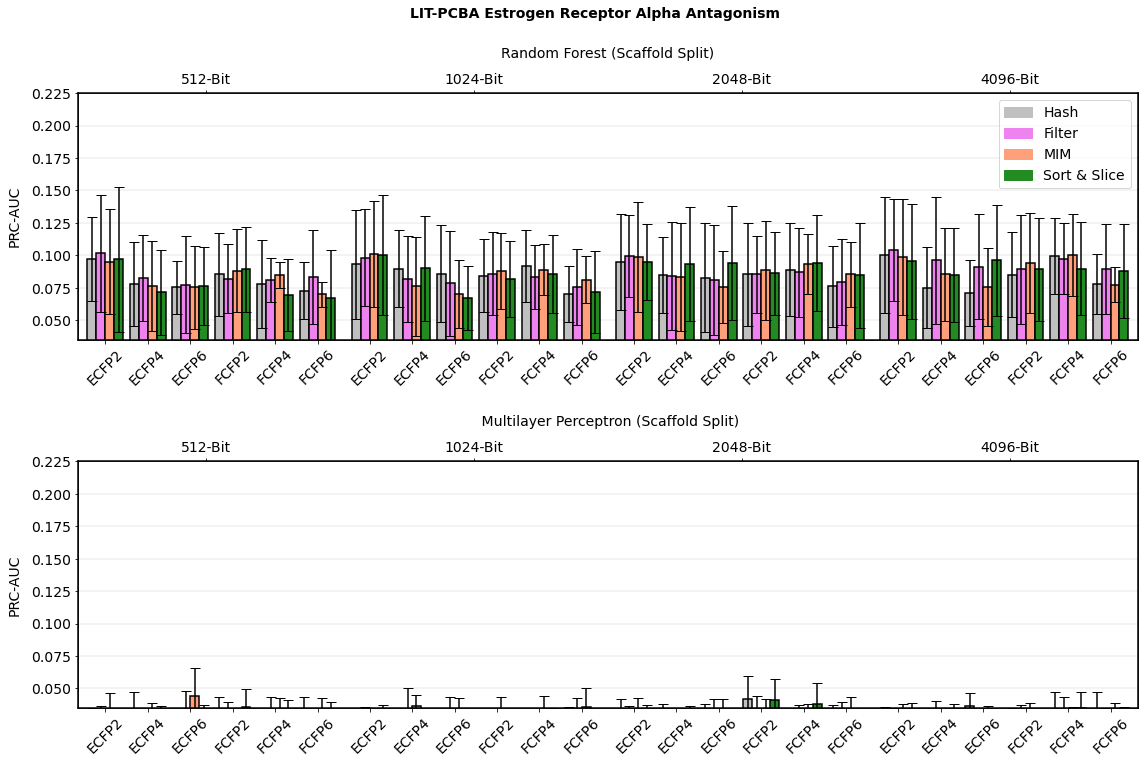

In [17]:
visualise_bar_charts(dataset_name = "lit_pcba_esr_ant", # specify dataset name
                     split_type = "scaff", # specify split type "rand" or "scaff" (for random or scaffold split)
                     metric = "PRC-AUC", # specify performance metric,
                     y_lims = (0.04, 0.22),
                     y_unit = "") # specify unit for y-axis (if applicable)

[0.6943113  0.67127701 0.67619072 0.66443731]
[0.02756505 0.00957752 0.0105218  0.0079305 ] 

[0.62236537 0.61955433 0.63387084 0.58571558]
[0.0307138  0.04259825 0.04632885 0.01755706] 

[0.78911411 0.76399427 0.76716133 0.75921402]
[0.03025863 0.01033125 0.01113869 0.00998105] 

[0.72976848 0.7176687  0.73152845 0.68644593]
[0.03540535 0.04543928 0.04920788 0.0162422 ] 



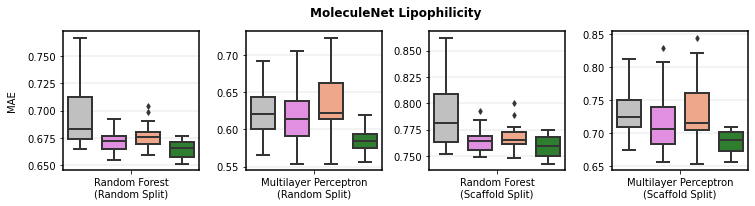

In [2]:
visualise_box_plots(dataset_name = "moleculenet_lipophilicity", # specify dataset name
                    metric = "MAE", # specify performance metric
                    y_unit = "", # specify unit for y-axis if applicable
                    show_legend = False, # show legend or not
                    show_x_ticks = True) # show text below subplots or not

[0.6943113  0.67171897 0.67569696 0.66476926]
[0.02756505 0.00926471 0.01096943 0.00771454] 

[2.28511014 2.28737216 2.28701298 2.28273226]
[0.0086654  0.01033132 0.01092114 0.00941229] 

[0.78911411 0.76399427 0.76716133 0.75921402]
[0.03025863 0.01033125 0.01113869 0.00998105] 

[0.72976848 0.7176687  0.73152845 0.68644593]
[0.03540535 0.04543928 0.04920788 0.0162422 ] 



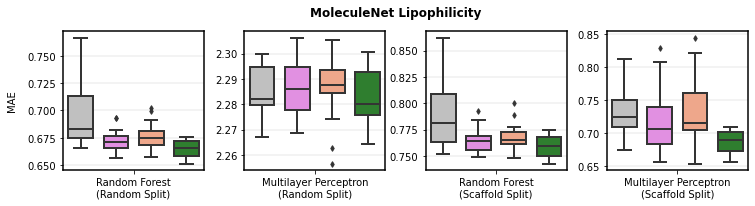

In [3]:
visualise_box_plots(dataset_name = "moleculenet_lipophilicity", # specify dataset name
                    metric = "MAE", # specify performance metric
                    y_unit = "", # specify unit for y-axis if applicable
                    show_legend = False, # show legend or not
                    show_x_ticks = True) # show text below subplots or not

[0.16213318 0.16731419 0.16099734 0.17300149]
[0.02875682 0.03017713 0.03149355 0.02832959]
[0.08423569 0.0872649  0.08544375 0.0856765 ]
[0.02888124 0.02829232 0.03005119 0.02882925]


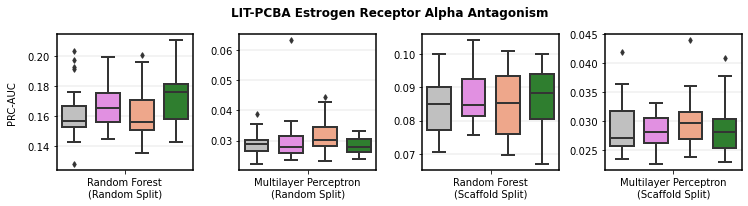

In [4]:
visualise_box_plots(dataset_name = "lit_pcba_esr_ant", # specify dataset name
                    metric = "PRC-AUC", # specify performance metric
                    y_unit = "", # specify unit for y-axis if applicable
                    show_legend = False, # show legend or not
                    show_x_ticks = True) # show text below subplots or not

[0.16213318 0.16825282 0.15891891 0.17237188]
[0.1262524  0.13054084 0.12201661 0.13828093]
[0.08423569 0.0858784  0.08317475 0.08674594]
[0.05868495 0.05990317 0.05691309 0.06029368]


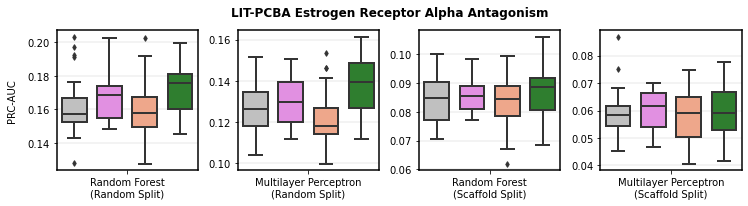

In [5]:
visualise_box_plots(dataset_name = "lit_pcba_esr_ant", # specify dataset name
                    metric = "PRC-AUC", # specify performance metric
                    y_unit = "", # specify unit for y-axis if applicable
                    show_legend = False, # show legend or not
                    show_x_ticks = True) # show text below subplots or not